Muon constants <br>
https://pdglive.lbl.gov/Particle.action?node=S004&init=0

# PHYSICS OF MUONS AND EXPERIMENT

## Experimental Setup

**Components:**
- **Cosmic Ray Muons:** Source particles from atmospheric interactions
- **Scintillator:** Identifies muon arrival and electron/positron
- **Solenoid:** Generates uniform magnetic field (B ≈ 5.6 mT)
- **Absorber:** Copper block where muons decay


## Physics Principles

### Decay Process
$$\mu^+ \rightarrow e^+ + \nu_e + \bar{\nu}_\mu$$
$$\mu^- \rightarrow e^- + \bar{\nu}_e + \nu_\mu$$

### Without Magnetic Field
Simple exponential decay:
$$N(t) = N_0 e^{-t/\tau_\mu}$$

Muon lifetime: $\tau_\mu = 2.1969811 \pm 0.0000022$ μs

### With Magnetic Field
Muon spin precesses with frequency:
$$\omega = g_\mu \frac{eB}{2m_\mu c}$$

Time-dependent signal with oscillation:
$$N(t) = N_0 e^{-t/\tau_\mu}[1 + A \cos(\omega t + \phi)]$$


## Analysis Method
**MCMC fitting:**
- **B = 0:** Extract $\tau_\mu$ from exponential decay
- **B ≠ 0:** Extract $\omega$ from oscillating signal, so find $g_\mu$ from measured precession frequency

# STATISTICAL CHECK EXPERIMENTAL SET UP

In [1]:
flux <- 1/60 # muon / cm^2 / s
scintillator <- 50*50 # cm^2
lambda <- flux * scintillator # muon / s
tau.ideal <- 2.2e-6 # s
cat("Lambda, i.e. rate of",lambda,"muons/s")

Lambda, i.e. rate of 41.66667 muons/s

Warning message in mtext("Time [μs]", side = 1, line = 2, cex = 1.25):
“conversione fallita da 'Time [μs]' in 'mbcsToSbcs': punto sostituito per <ce>”
Warning message in mtext("Time [μs]", side = 1, line = 2, cex = 1.25):
“conversione fallita da 'Time [μs]' in 'mbcsToSbcs': punto sostituito per <bc>”
Warning message in text.default(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"), :
“conversione fallita da 'P(2 muons <= 15μs)' in 'mbcsToSbcs': punto sostituito per <ce>”
Warning message in text.default(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"), :
“conversione fallita da 'P(2 muons <= 15μs)' in 'mbcsToSbcs': punto sostituito per <bc>”
Warning message in text.default(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"), :
“metrica font sconosciuta per carattere Unicode U+03bc”


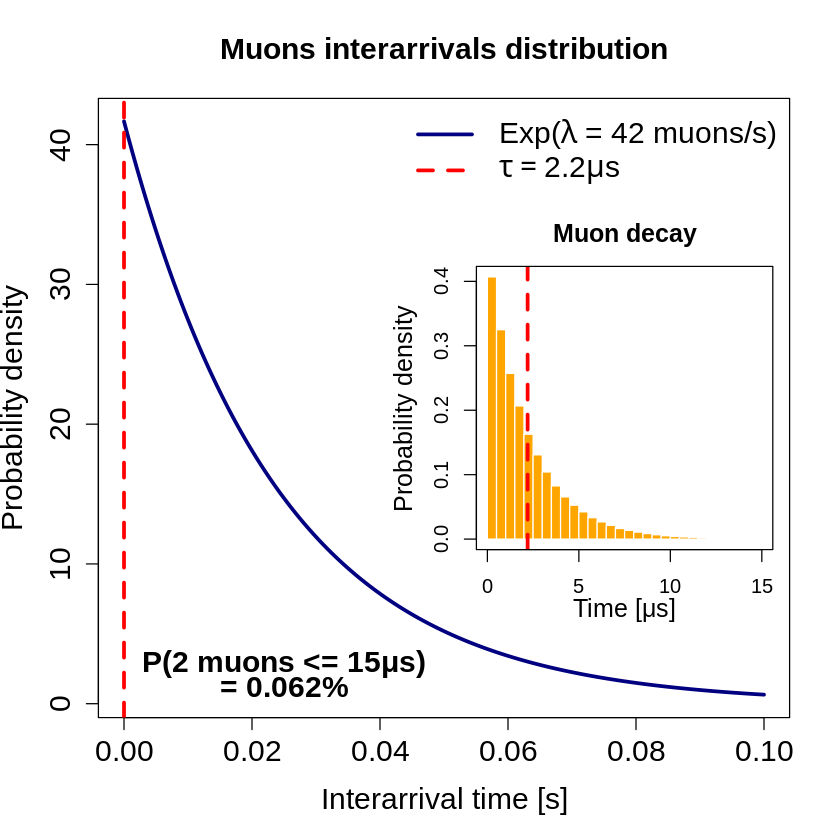

In [2]:
# cat( "Time at which 99% decay has occured",qexp(0.99,1/tau.ideal),"second" )

flux <- 1/60 # muon / cm^2 / s
scintillator <- 50*50 # cm^2
lambda <- flux * scintillator # muon / s
tau.ideal <- 2.2e-6 # s

# to save image
# png("2MuonsCoincidence.png", width = 7, height = 8, units = "in", res = 300)

# exponential of 2 muons arrival

t.range <- seq(0, 0.1, length.out = 1e4)

plot(t.range, dexp(t.range, lambda), type='l', lwd=3, lty=1, xlim=c(0, 0.1),
     xlab = "Interarrival time [s]", ylab = "Probability density", 
     main = "Muons interarrivals distribution",
     cex.main=1.5, cex.lab=1.5, cex.axis=1.5, col = "navy")

abline(v = tau.ideal, col = "red", lwd = 3, lty = 2)

t.area <- seq(0, tau.ideal, length.out = 1000)
y.area <- dexp(t.area, lambda)
polygon(c(0, t.area, tau.ideal), c(0, y.area, 0), col = "purple", border = NA)

legend("topright", legend = c(expression(paste("Exp(", lambda, " = 42 muons/s)")), expression(tau == 2.2*mu*s)),
       col=c("navy", "red"), pch=c(NA, NA), lty=c(1, 2), lwd=3, cex=1.5, bty='n', pt.cex=c(1, 1))


# internal plot of muon decay
par(fig = c(0.45, 0.98, 0.2, 0.8), new = TRUE)
hist_data <- rexp(1e6, rate = 1/tau.ideal) * 1e6  # microseconds
hist(hist_data, breaks=50, col="orange", border="white", main="", xlab="", ylab="", prob=TRUE, axes = FALSE, xlim=c(0,15) )

abline(v=tau.ideal* 1e6, col="red", lwd=3, lty=2)

title(main="Muon decay", line=1, cex.main=1.25)
mtext("Time [μs]", side=1, line=2, cex=1.25)
mtext("Probability density", side=2, line=2.5, cex=1.25)

axis(1, cex.axis=1)
axis(2, cex.axis=1)
box()


# empty pannnel just for the write
par(fig=c(0, 1, 0, 0.5), new=TRUE)
plot(1, type="n", axes=FALSE, xlab="", ylab="", main="")

P.mistake <- pexp(15e-6, lambda) * 100  # in %
text(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"),cex=1.5, font=2)

text(0.8, 0.7, labels = paste( "= ",round(P.mistake,3),"%",sep=''), cex=1.5, font=2)

# to save image
#dev.off()

# SIMULATED DATA

In [3]:
G.mean  <- 2.00233184123 # pure number
G.sigma <- 0.00000000014 # pure number

TAU.mean  <- 2.1969811  # microseconds
TAU.sigma <- 0.0000022  # microseconds

B.mean  <- 5.6e-3  # Tesla
B.sigma <- 0.1e-3  # Tesla

MASS.mean  <- 105.6583755e6 # MeV/c^2
MASS.sigma <-   0.0000023e6 # MeV/c^2

c <- 299792458 # m/s
e <- 1.60217663e-19 # Coulomb

MASS.kg <- MASS.mean*e / c^2  # kg
MASS.kg.sigma <- e/c^2



OMEGA <- ((G.mean*e*B.mean) / (2*MASS.kg)) / 1e6  # MHz
#Error of omega:
#sigmaO <- sqrt((e*B.mean/(2*MASS.mean) * G.sigma)^2 + (G.mean*e/(2*MASS.mean) * B.sigma)^2 + (G.mean*e*B.mean/(2*MASS.mean)^2 * MASS.sigma)^2)
sigmaO <- sqrt(
  (e * B.mean / (2 * MASS.kg) * G.sigma)^2 +
  (G.mean * e / (2 * MASS.kg) * B.sigma)^2 +
  (G.mean * e * B.mean / (2 * MASS.kg^2) * MASS.kg.sigma)^2
)


cat("Omega is: ",OMEGA, "+-", sigmaO/1e6, "MHz. \n")

Omega is:  4.769047 +- 0.08516155 MHz. 


In [4]:
N0  <- 2e3 # number initial muons
A   <- 0.06 # linked to % polarized muons
phi <- -0.5   # initial phase

In [5]:
dt <- 0.05
t <- seq(dt/2, 8, dt) # microseconds
#Effeciency.Detector <- 0.8 # to introduce randomness even in the time component
#mask <- sample(c(TRUE, FALSE), size=length(t), replace=TRUE, prob=c(Effeciency.Detector,1-Effeciency.Detector))
#t <- t[mask]

Exp.decay <- function(t, N0, TAU) { return(N0 * exp(-t/TAU)) }
Exp.decay.oscill <- function(t, N0, TAU, OMEGA, A, phi) { return( N0 * exp(-t/TAU) * (1 + A*cos(OMEGA*t+phi)) ) }

N.noB.ideal <- Exp.decay(t, N0, TAU.mean)

N.withB.ideal <- Exp.decay.oscill(t, N0, TAU.mean, OMEGA, A, phi)

GenerateData <- function(t, N.ideal, show=FALSE) {

    set.seed(as.integer((as.numeric(Sys.time()) %% 1) * 1e8)) #uso il tempo del pc per generare un numero casuale

    sigma <- sqrt( N.ideal * ( 1-N.ideal/sum(N.ideal) ) ) |> round(10)
    sigma <- pmax(sigma,1) |> as.integer()

    # VARI TENTATIVI
    #N <- rpois(length(t), N.ideal) # simulated measurements
    #noise <- rnorm( length(t), mean=0, sd=sqrt(N.ideal) ) # simulated background noise
    #N <- (N + noise)
    #N <- N * runif(length(t),0.8,1.2) |> round(,0) |> as.integer()

    N <- rnorm( length(t),N.ideal, sigma ) |> round(10)
    N <- pmax( N,0 ) |> as.integer()
        
    data <- data.frame(t=t, y=N, s=sigma)
    if (show) { print( head(data,5) ); cat("\n") ; print( tail(data,5) ) ; cat("\n") }

    return(data)
    }

In [6]:
plot.data <- function(data, title, fit=NULL) {
    options(repr.plot.width=16,repr.plot.heigth=8)
    
    par(mfrow=c(1,2))
    
    # normal scale
     plot(data$t, data$y, type="n",
          xlab=expression("Time ["*mu*"s]"), ylab="Counts", main=title,
          cex.main=1.2, cex.axis=0.8, cex.lab=1)

     arrows(data$t, data$y-data$s, data$t, data$y+data$s,
               angle=90, code=3, length=0.02, col="lightblue")

     points(data$t, data$y, pch=16, col="red", cex = 0.5)

    if (!is.null(fit)) {
        lines(data$t,fit, col="green", lwd = 3)
        legend(4,1700, legend=c("Data", "Result STAN"), col = c("red","green"), bty="n",
        pch=c(19, NA),lty=c(NA,1),lwd=c(NA,3),cex=1.5,seg.len=0.5,x.intersp=0.2)
        }

    
    # log scale
     plot(data$t, pmax(data$y,1), log="y", yaxt="n", type="n",
          xlab=expression("Time ["*mu*"s]"), ylab="Counts", main=title,
          cex.main=1.2, cex.axis=0.8, cex.lab=1)
     
     arrows(data$t, data$y-data$s, data$t, data$y+data$s,
               angle=90, code=3, length=0.02, col="lightblue")

     points(data$t, pmax(data$y,1), pch=16, col="blue", cex = 0.5)


    axis(2, at=10^(0:5), labels=parse(text=paste0("10^", 0:5)), las=1)

        if (!is.null(fit)) {
        lines(data$t,fit, col="green", lwd = 3)
        legend(4,1700, legend=c("Data", "Result STAN"), col = c("blue","green"), bty="n",
        pch=c(19, NA),lty=c(NA,1),lwd=c(NA,3),cex=1.5,seg.len=0.5,x.intersp=0.2)
        }

    }

In [7]:
data.noB   <- GenerateData(t, N.noB.ideal, show=TRUE)

      t    y  s
1 0.025 2051 43
2 0.075 2048 43
3 0.125 1964 42
4 0.175 1781 42
5 0.225 1728 42

        t  y s
156 7.775 61 7
157 7.825 68 7
158 7.875 64 7
159 7.925 45 7
160 7.975 56 7



In [8]:
data.withB <- GenerateData(t, N.withB.ideal, show=TRUE)

      t    y  s
1 0.025 2073 45
2 0.075 2023 44
3 0.125 1934 44
4 0.175 1959 43
5 0.225 1972 43

        t  y s
156 7.775 64 7
157 7.825 66 7
158 7.875 56 7
159 7.925 55 7
160 7.975 69 7



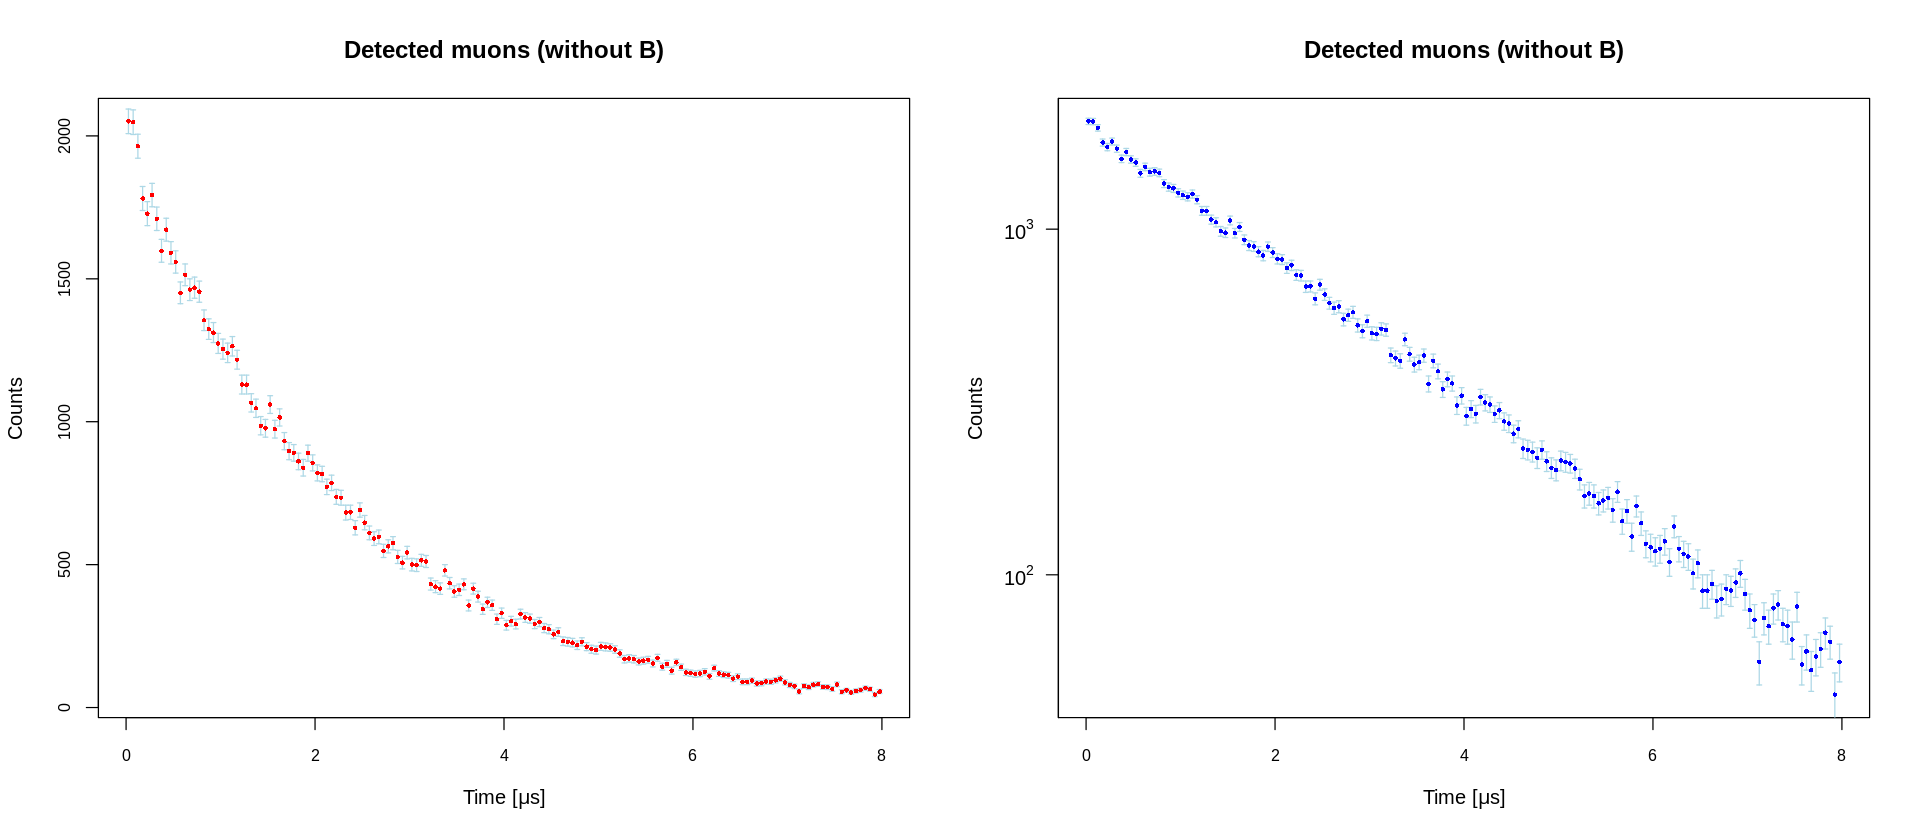

In [9]:
data <- list(data.noB, data.withB)

#png("SimDataNoB.png", width = 8, height = 4, units = "in", res = 300)
plot.data(data.noB,"Detected muons (without B)")
#dev.off()

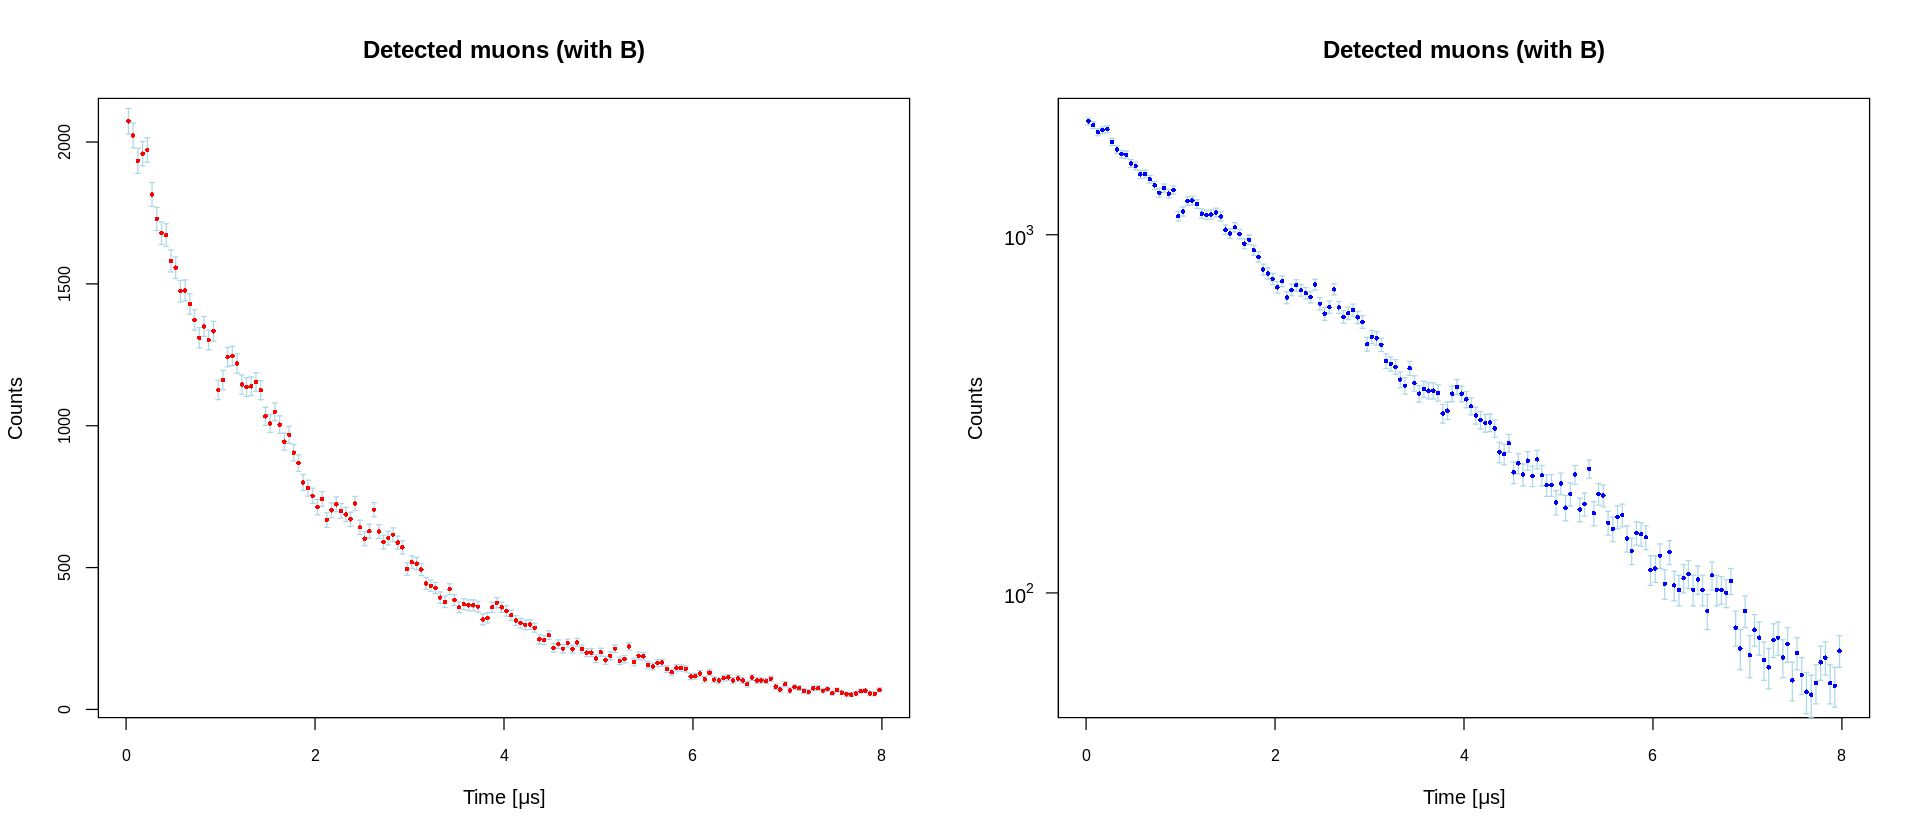

In [10]:
#png("SimDataWithB.png", width = 8, height = 4, units = "in", res = 300)
plot.data(data.withB, "Detected muons (with B)")
#-1 dev.off()

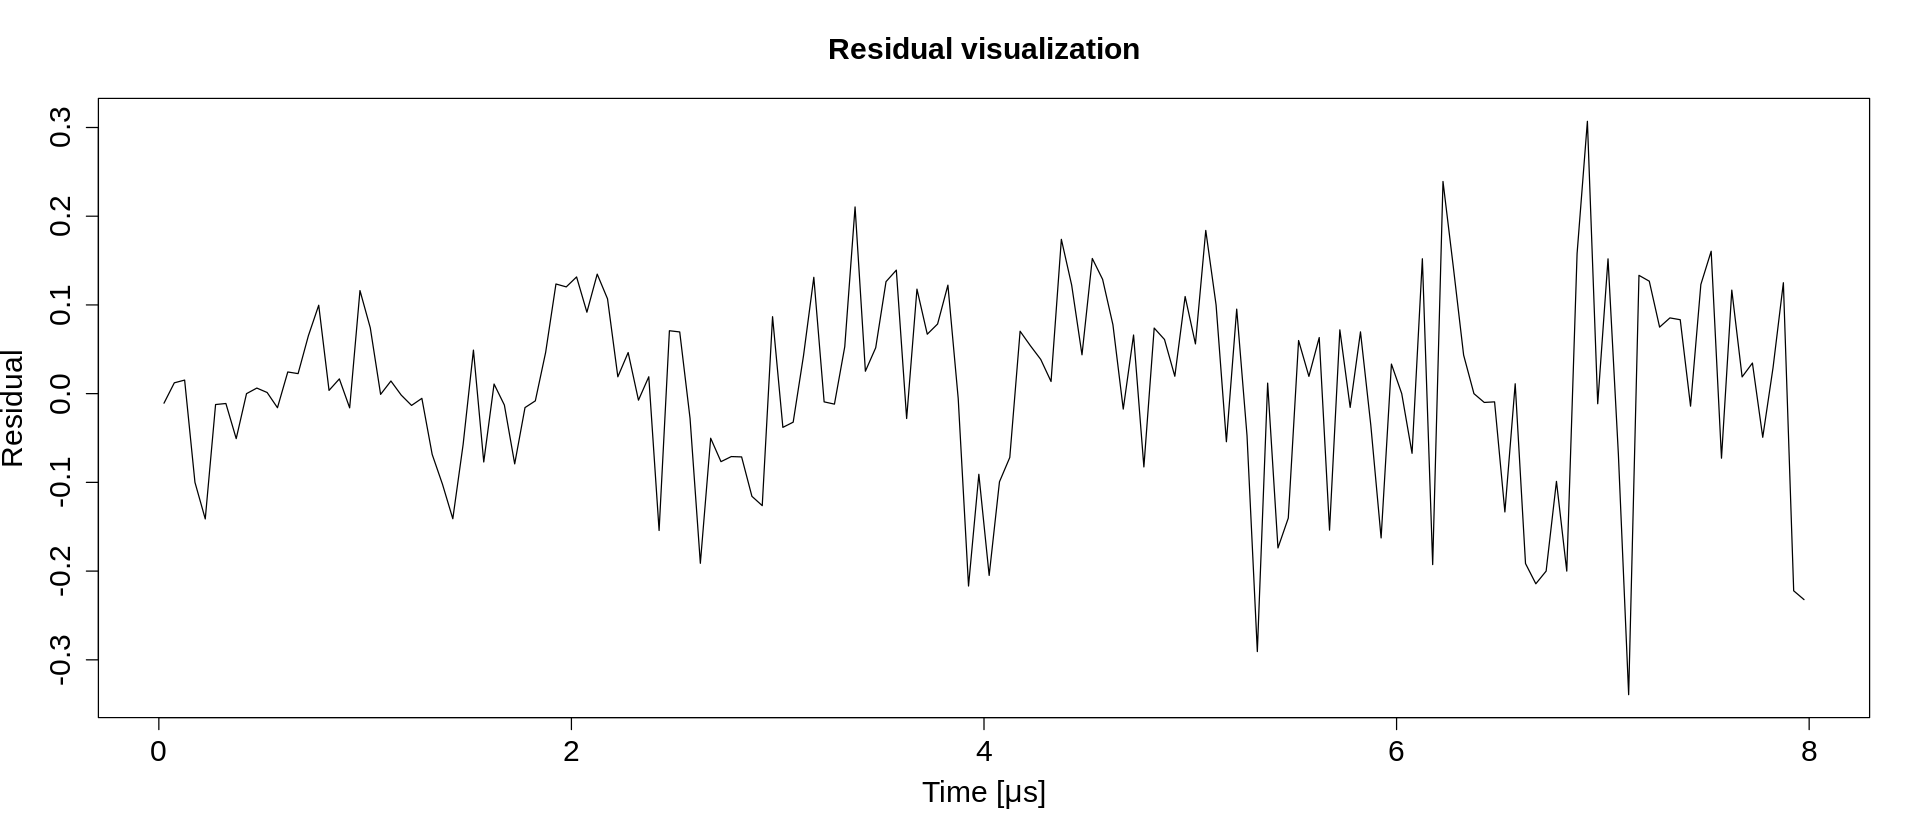

In [11]:
#Plotting the residuals to show the presence of the oscillation:
#Using a different time scale to have a better visualization:

Res <- (data.noB$y - data.withB$y) / data.noB$y

plot(t, Res, type='l', xlab=expression("Time ["*mu*"s]"), ylab="Residual", main='Residual visualization',
         cex.main=1.5, cex.axis=1.5, cex.lab=1.5)

# MCMC ANALYSIS: STAN

In [12]:
library("rstan")
options (mc.cores=parallel::detectCores())
rstan_options (auto_write=TRUE)
library("coda")

Warning message:
“il pacchetto ‘rstan’ è stato creato con R versione 4.3.3”
Caricamento del pacchetto richiesto: StanHeaders

Warning message:
“il pacchetto ‘StanHeaders’ è stato creato con R versione 4.3.3”

rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Warning message:
“il pacchetto ‘coda’ è stato creato con R versione 4.3.3”

Caricamento pacchetto: ‘coda’


Il seguente oggetto è mascherato da ‘package:rstan’:

    traceplot




In [30]:
# varsatile way, so we can change model since evry time copy & paste

data.model.stan <- "data {
        int<lower=0> n;
        vector[n] t;
        vector<lower=0>[n] y;
        vector<lower=0>[n] s;
}\n"

parameters <- c(
    noB = "parameters {
        real<lower=0> N0;
        real<lower=0> tau;
    }\n",
    withB = "parameters {
        real<lower=0> N0;
        real<lower=0> tau;
        real<lower=0, upper=0.2> A;
        real<lower=4, upper=5> omega;
        real<lower=-1*pi(), upper=pi()> phi;
        real<lower=0> B;

        
    }\n"   
)

TransfParam <- 
    'transformed parameters {
        real gmu;
        real e_charge = 1.602e-19;       // C
        real muon_mass = 1.8835e-28;     // kg
        gmu = (2 * muon_mass * omega*1e6) / (e_charge * B /1e3); // B in mT
    } \n'

model <- c(
    noB = "model {
        N0 ~ normal(y[1],sqrt(y[1])) ;
        tau ~ normal(2.2,0.1) ;
        for (i in 1:n) { y[i] ~ normal( N0*exp(-t[i]/tau), s[i] ); }
    }\n",
    withB = "model {
        N0 ~ normal(y[1],sqrt(y[1])) ;
        tau ~ normal(2.15,0.1) ;
        A ~ uniform(0,0.2) ;
        omega ~ normal(4.75, 0.1) ; 
        phi ~ uniform(-1*pi(), pi()) ;
        
        B ~ normal(5.6, 0.3);

        for (i in 1:n) { y[i] ~ normal( N0*exp(-t[i]/tau)*(1+A*cos(2*pi()*omega*t[i]+ phi)), s[i] ); }
    }\n"
)


stan.string <- c(noB = paste0(data.model.stan,parameters[1], model[1]), withB = paste0(data.model.stan, parameters[2], TransfParam, model[2]))
#cat( stan.string[[2]] )

#data.stan = c( list( n=length(t), t=data[1]$t, y=data[1]$y, s=data[1]$s ) , list( n=length(t), t=data[2]$t, y=data[2]$y, s=data[2]$s )  )
data.stan = lapply( 1:2, function(i) { list( n=length(t), t=data[[i]]$t, y=data[[i]]$y, s=data[[i]]$s ) } )

In [27]:
analysis.bayes <- function(stan.string, data.stan, which.model, nIter=5000, nChains=2, thin=1, warmup=200) {

   stan <- stan.string[ which.model ]
   data <- data.stan[[which.model]]
   params <- switch( which.model, c("N0","tau") , c("N0","tau","A","omega","phi", 'gmu') )
   stan.model <- stan_model( model_code = stan )

   stan.fit <- sampling(stan.model, data, pars=params, iter=nIter, chains=nChains, warmup=warmup, thin=thin, control = list(adapt_delta = 0.99))

   cat( switch( which.model, "WITHOUT B\n" , "WITH B\n" ) )
   print(summary(stan.fit))
   array <- as.array(stan.fit)
   return(array)
}

In [15]:
PlotPosteriorParam <- function(array.mcmc, which.model, save.to.file = FALSE, filename = 'None.png'){

    if (save.to.file) {
        png(file = filename, width = 1400, height = 1200)
    }
    n.chains <- ncol(array.mcmc)
    all.mcmc.coda <- mcmc.list( lapply (1:n.chains, function (x) { mcmc(array.mcmc[,x,]) })) # is a list of mcmc

    
    params <- switch( which.model, c("N0","tau") , c("N0","tau","A","omega","phi",'gmu') )
    means <- numeric(length(params))

    colors <- c("orange", "lightgreen", "pink", "lightblue", "yellow", 'plum')

    options(repr.plot.width=10, repr.plot.height=10)

    # for cycle on all parameters
    for(i in 1:length(params)) {

        par(mfrow=c(1, 1),oma=c(0,0,3,0))
        layout.matrix <- matrix(c(1, 2, 1, 3), nrow = 2, ncol = 2)
        layout(mat = layout.matrix,
        heights = c(1, 1), # Heights of the two rows
        widths = c(2.5, 1.5)) # Widths of the two columns
        
        # the chain interations
        for(j in 1:n.chains) {
            iteration.chain <- array.mcmc[,j,params[i]]
            max <- sapply( 1:n.chains, function(k) { max( array.mcmc[,k,params[i]] ) } ) |> max()
            min <- sapply( 1:n.chains, function(k) { min( array.mcmc[,k,params[i]] ) } ) |> min()
            
            if (j == 1) { plot( iteration.chain,type="l",col=j,cex.axis=1.5,cex.main=1.5,cex.lab=1.5,
                        main="MCMCs",ylab = params[i],xlab="# Interactions",ylim=c(min,max) ) }
            else {  lines(iteration.chain, col = j) }
        }
        
        mtext(params[i], outer=TRUE, cex=2, font=2)

        #autocorrelation
        my.lags <- 0:80
        for(j in 1:n.chains) {
            mcmc.coda <- all.mcmc.coda[[j]] # j-th chain
            acf <- autocorr(mcmc.coda[ ,params[i] ],lags=my.lags)
            if (j == 1) {
                plot(my.lags,acf,ylim=c(-0.2,1),type="b",pch=16,col=j,main="MCMCs autocorrelation",
                xlab="lag",ylab="ACF",cex.axis=1.5,cex.main=1.5,cex.lab=1.5)
            }
            else {
                lines(my.lags,acf,type="b", pch=16,col=j)
            }
        }
        text(20,0.6,paste( "Effective Size:",round(effectiveSize(mcmc.coda[,params[i]]),2)),pos=4,cex=1.5)

        all.data.param <- array.mcmc[,,params[i]]
        mean <- mean(all.data.param)
        means[i] <- mean
        CI <- quantile(all.data.param, c(0.025, 0.975))
        
        # density distribution
        for(j in 1:n.chains) {
            dens <- array.mcmc[,,params[i]]
            if (n.chains > 1){
                max <- sapply( 1:n.chains, function(k) { max(density(dens[,k])$y) } ) |> max()
                min <- sapply( 1:n.chains, function(k) { min(density(dens[,k])$y) } ) |> min()

                if (j == 1) { plot( density( dens[, j] ),main="Density distribution",
                            col=j,cex.axis=1.5,cex.main=1.5,cex.lab=1.5,xlab=params[i],
                            ylim=c(min,max) )
                                lines(c(CI[1],CI[2]),c(0,0),lwd=4)
                                text(mean, (max-min)*0.1, "95% CI",cex=1.5)
                            }   
                else { lines( density(dens[,j]),col=j ) }
            }
            else{
                max <- sapply( 1:n.chains, function(k) { max(density(dens)$y) } ) |> max()
                min <- sapply( 1:n.chains, function(k) { min(density(dens)$y) } ) |> min()

                plot( density( dens ),main="Density distribution",
                            col=j,cex.axis=1.5,cex.main=1.5,cex.lab=1.5,xlab=params[i],
                            ylim=c(min,max) )
                                lines(c(CI[1],CI[2]),c(0,0),lwd=4)
                                text(mean, (max-min)*0.1, "95% CI",cex=1.5)
                }
        }
    
        
        layout.matrix <- matrix(c(1,0), nrow=2, ncol=1)
        layout(mat = layout.matrix,
        heights = c(3,0.5),
        widths = c(2))
        
        # histrogram of distribution
        h <- hist(all.data.param, breaks=50, probability=TRUE, main=paste("Posterior distribution of", params[i]),
        xlab=params[i],ylab="Probability density",col=colors[i],border="darkgrey",xaxs="i",cex.axis=1.5,cex.main=1.5,cex.lab=1.5)    
        abline( v=mean, col="red", lwd=2, lty=2)

        h$density
        y_pos <- 0.6 * max(h$density)
        text(0.9*mean+0.1*CI[2],y_pos, paste("mean: ",round(mean,3)), srt=90,cex=1.5)
        
        # 95% CI
        abline(v=CI, col="red", lwd=1, lty=3)
        text(0.9*CI[1]+0.1*mean,y_pos,paste("lower 95% CI: ",round(CI[1],3)),cex=1.5,srt=90)
        text(0.9*CI[2]+0.1*mean,y_pos,paste("upper 95% CI: ",round(CI[2],3)),cex=1.5,srt=90)
    }

    if (save.to.file) {
        dev.off()
    }

    names(means) <- params
    return(means)
}

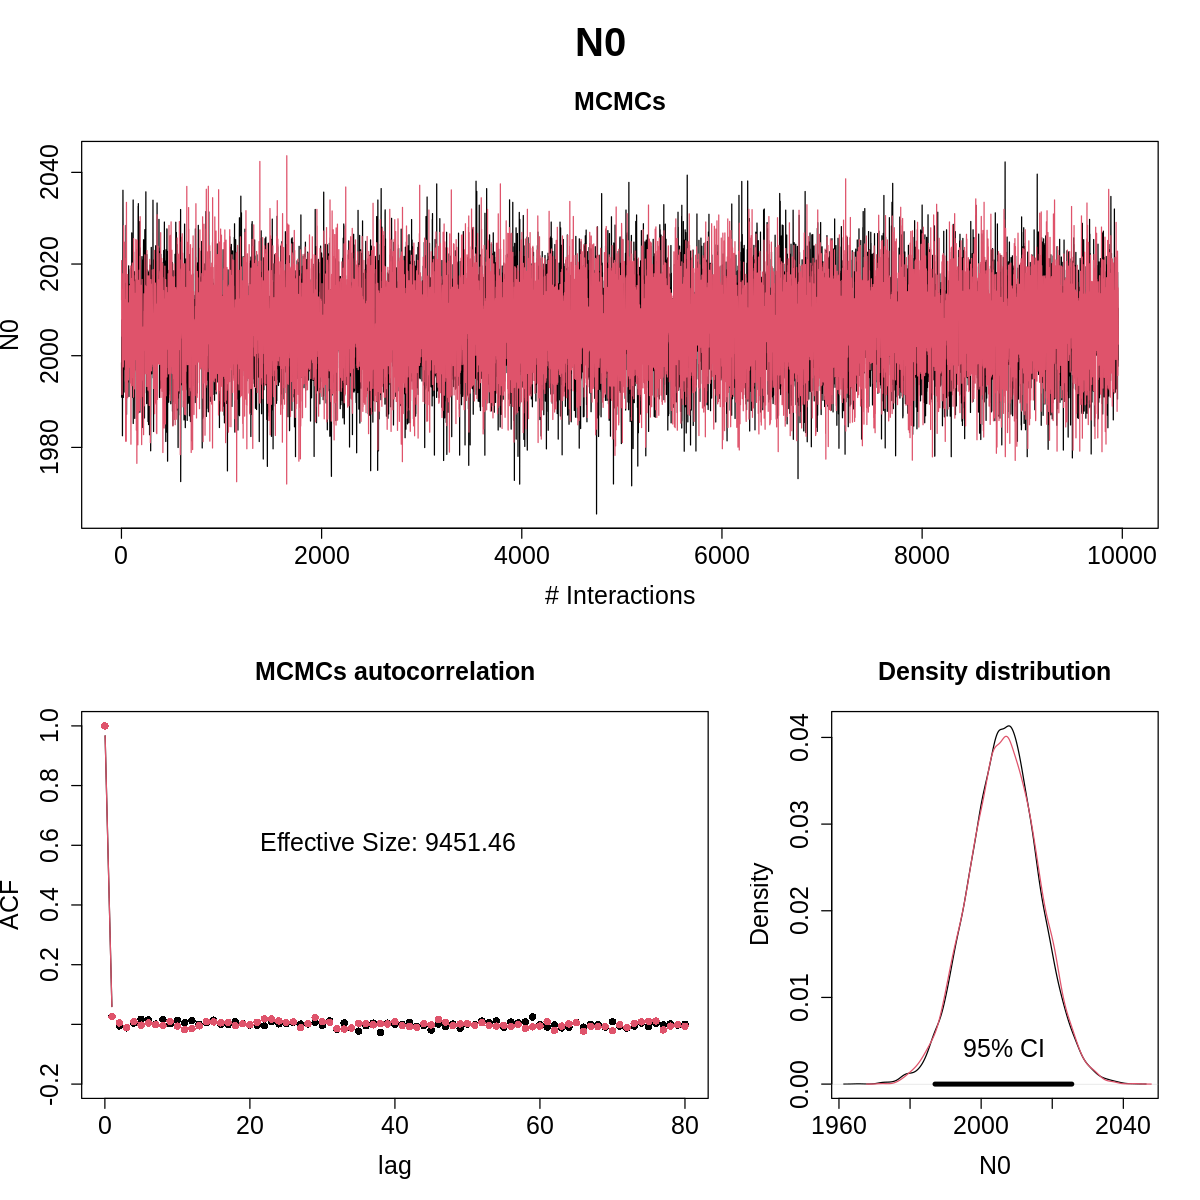

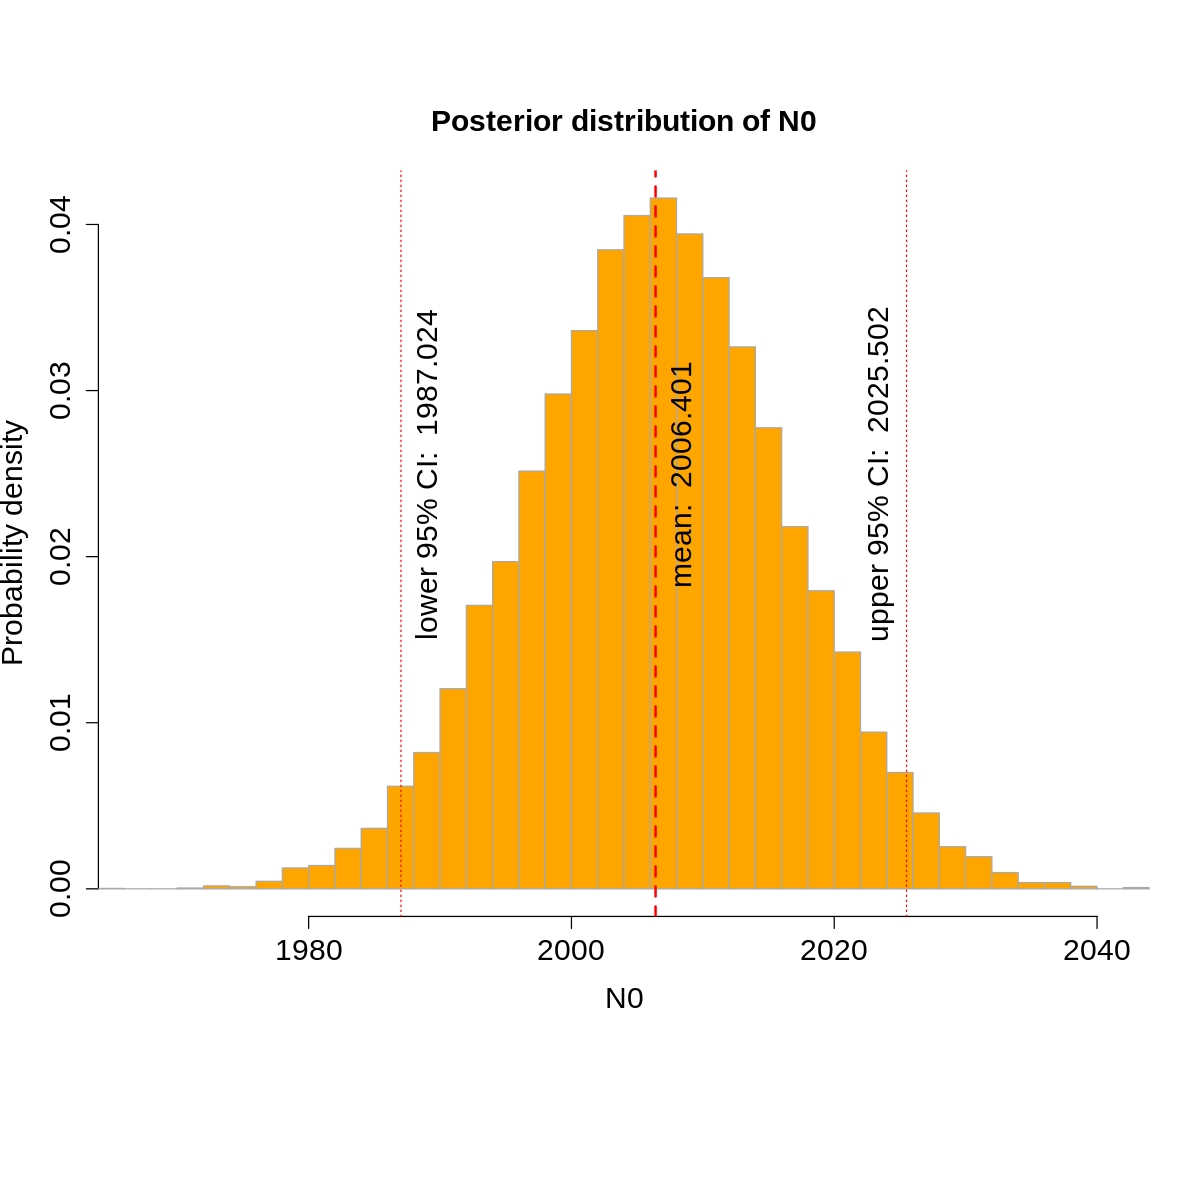

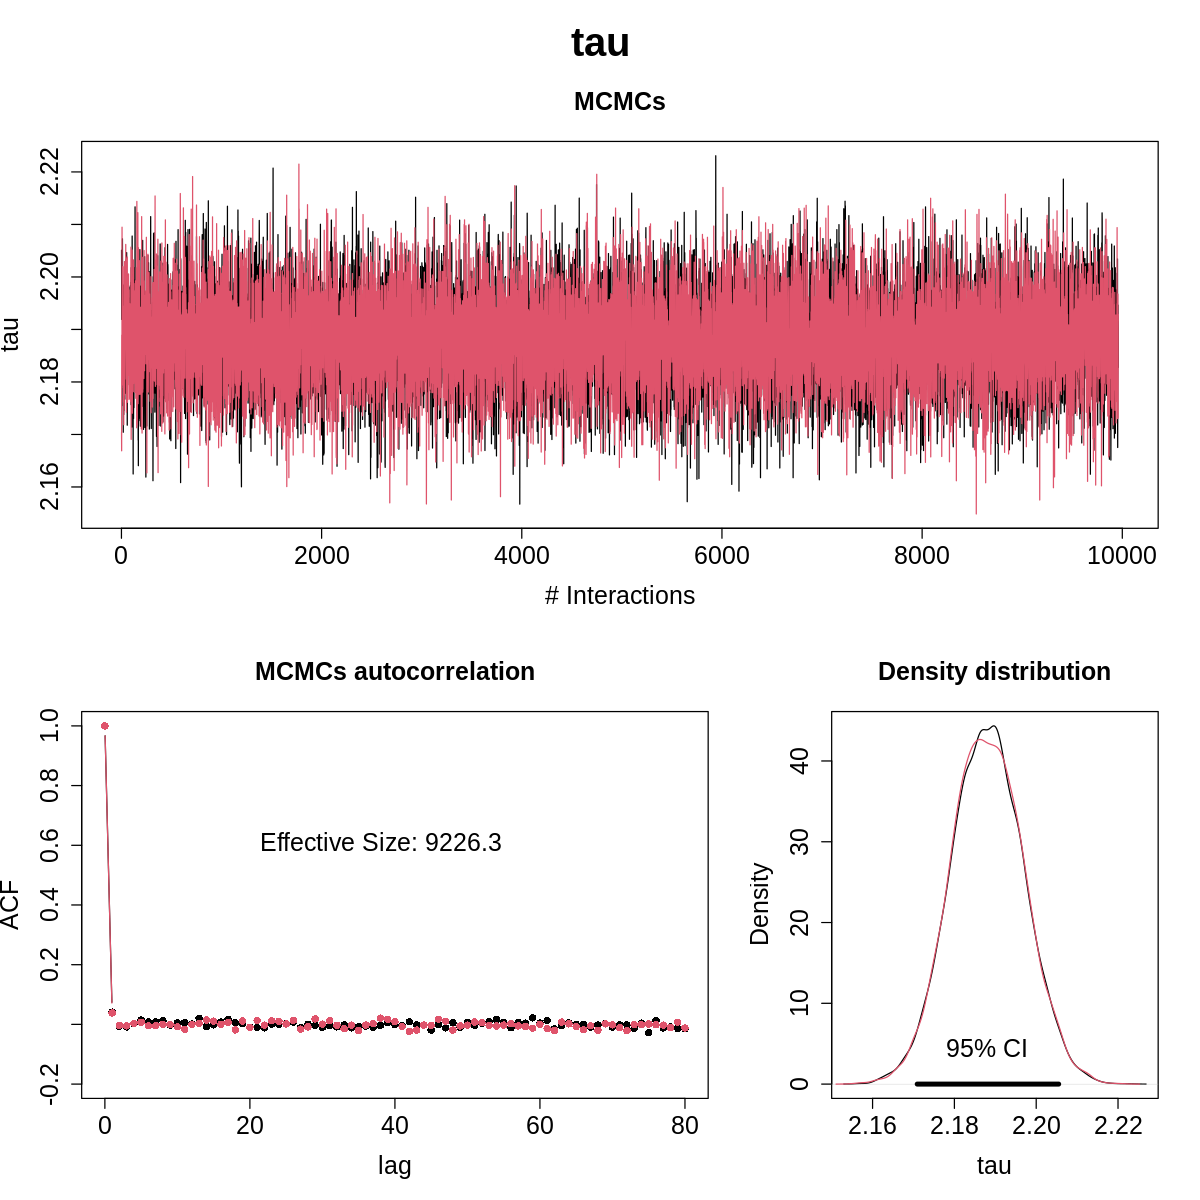

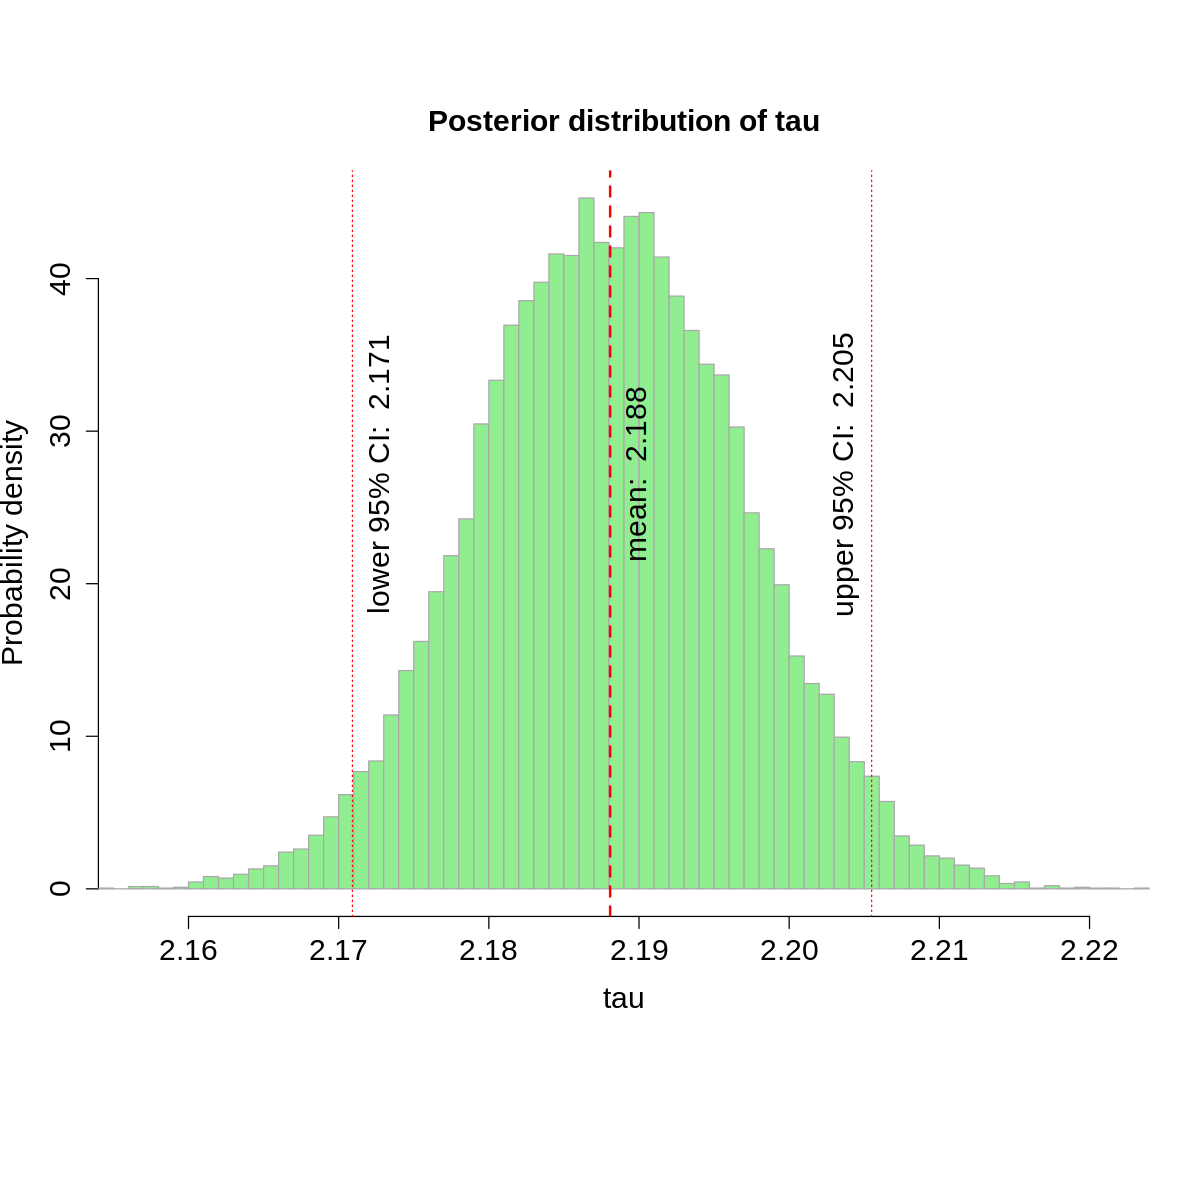

In [53]:
which.model <- 1
n.chains <- 2
STAN_NoB_array.mcmc <- analysis.bayes(stan.string, data.stan, which.model, nIter = 50000, nChains = n.chains, thin = 5)

result.STAN.noB <- PlotPosteriorParam(STAN_NoB_array.mcmc, which.model)

 -161.99899637 -160.62220804
         stats
parameter           75%         97.5%
    N0    2022.80789391 2036.03306750
    tau      2.18053560    2.19181668
    A        0.02167648    0.02833583
    omega    4.65479204    4.70843515
    phi     -0.74982184   -0.08494235
    gmu      2.02087294    2.19119332
    lp__  -159.53697482 -158.25229893

, , chains = chain:2

         stats
parameter          mean          sd          2.5%           25%           50%
    N0    2016.62659453 9.806461105  1.997099e+03 2010.07042358 2016.37195541
    tau      2.17450123 0.008742708  2.157324e+00    2.16851890    2.17437992
    A        0.01864553 0.005045643  8.465335e-03    0.01525759    0.01864021
    omega    4.63669122 0.037245165  4.557621e+00    4.61812079    4.63897883
    phi     -1.05451006 0.468962562 -1.970177e+00   -1.33039881   -1.05995388
    gmu      1.95318541 0.106313095  1.751598e+00    1.88053606    1.94886843
    lp__  -161.06164859 2.074484403 -1.663082e+02 -162.02556631 -160

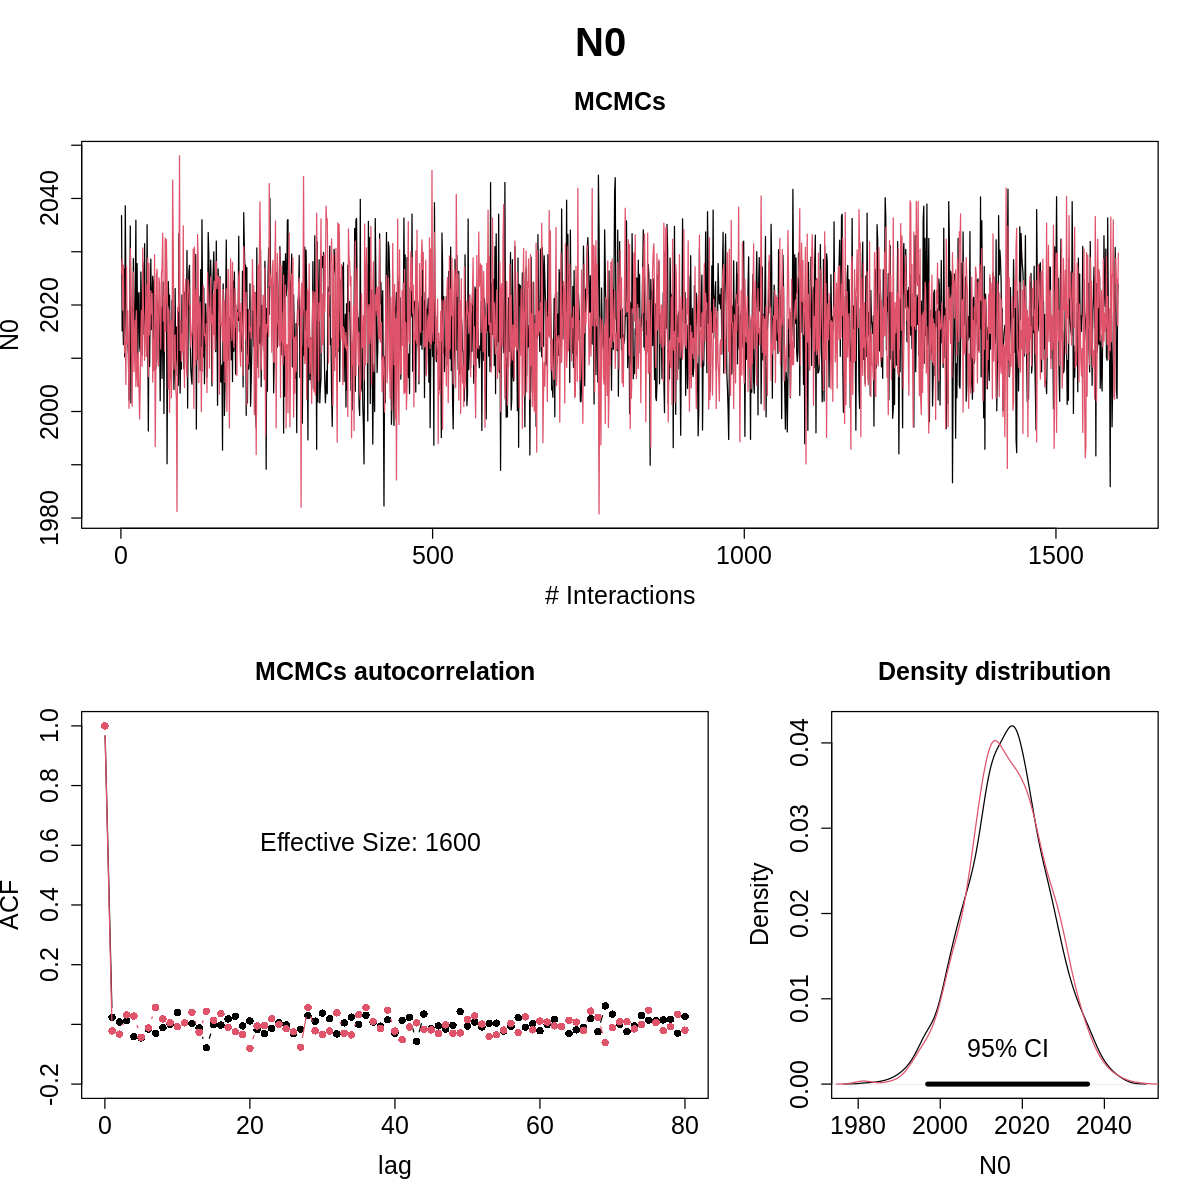

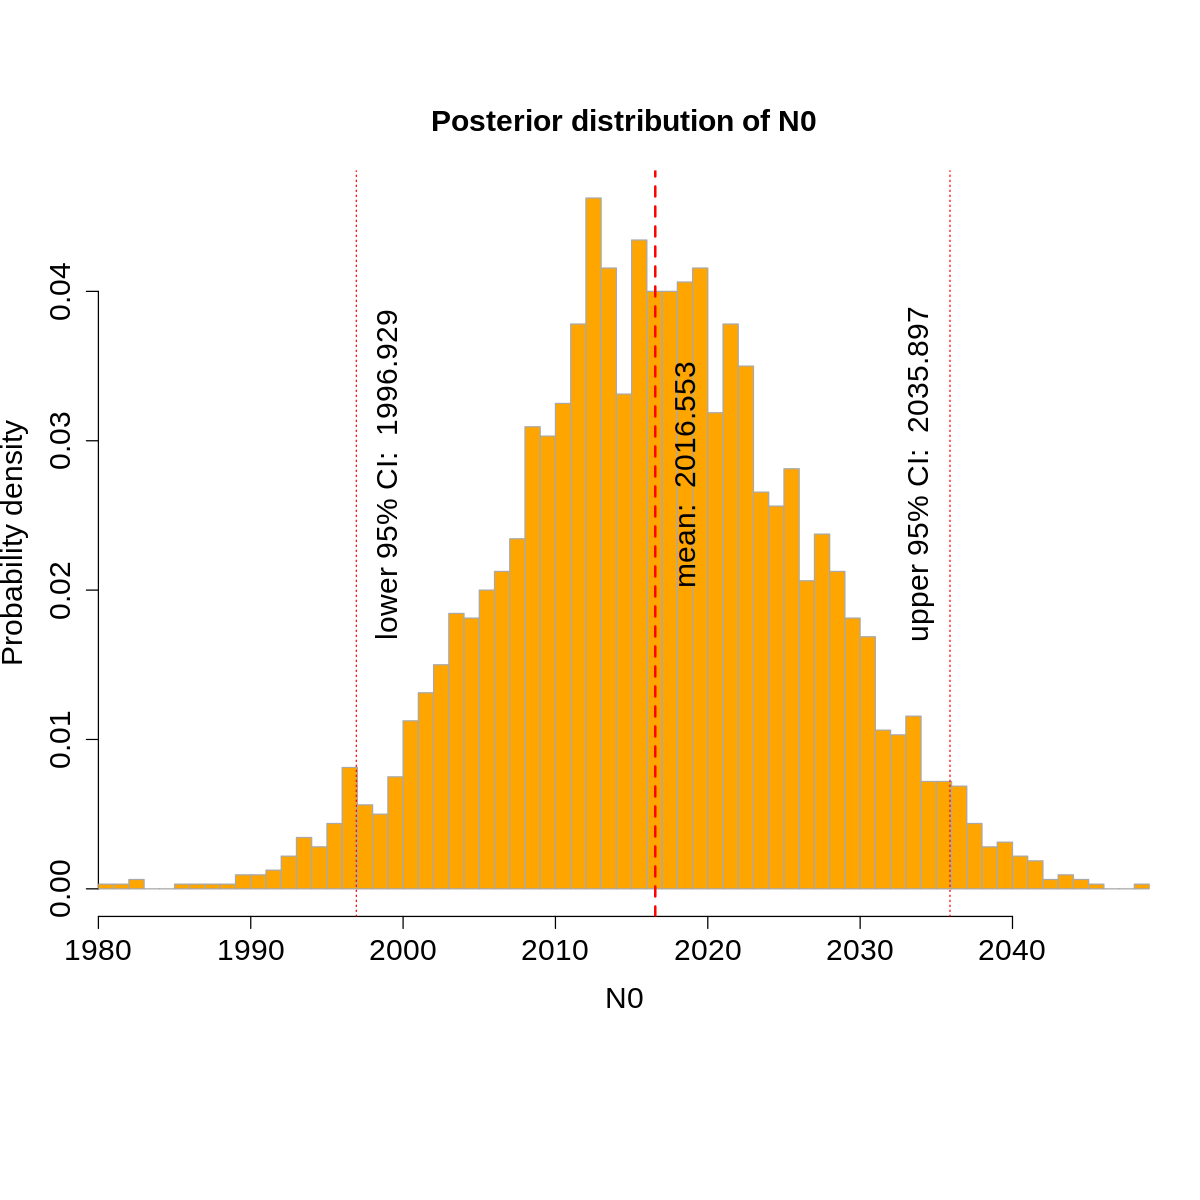

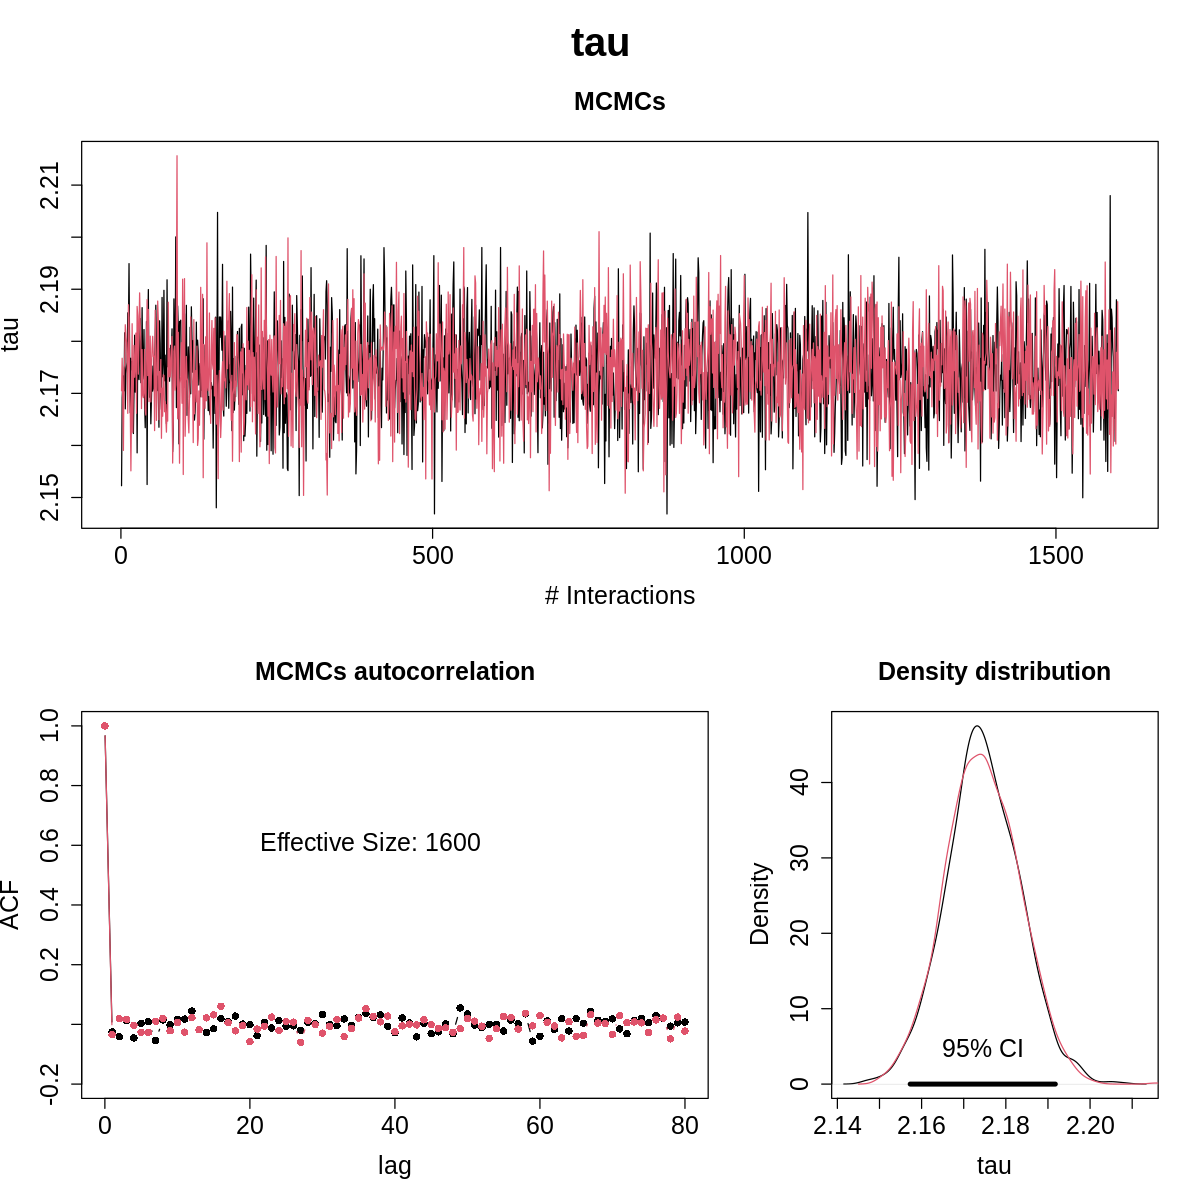

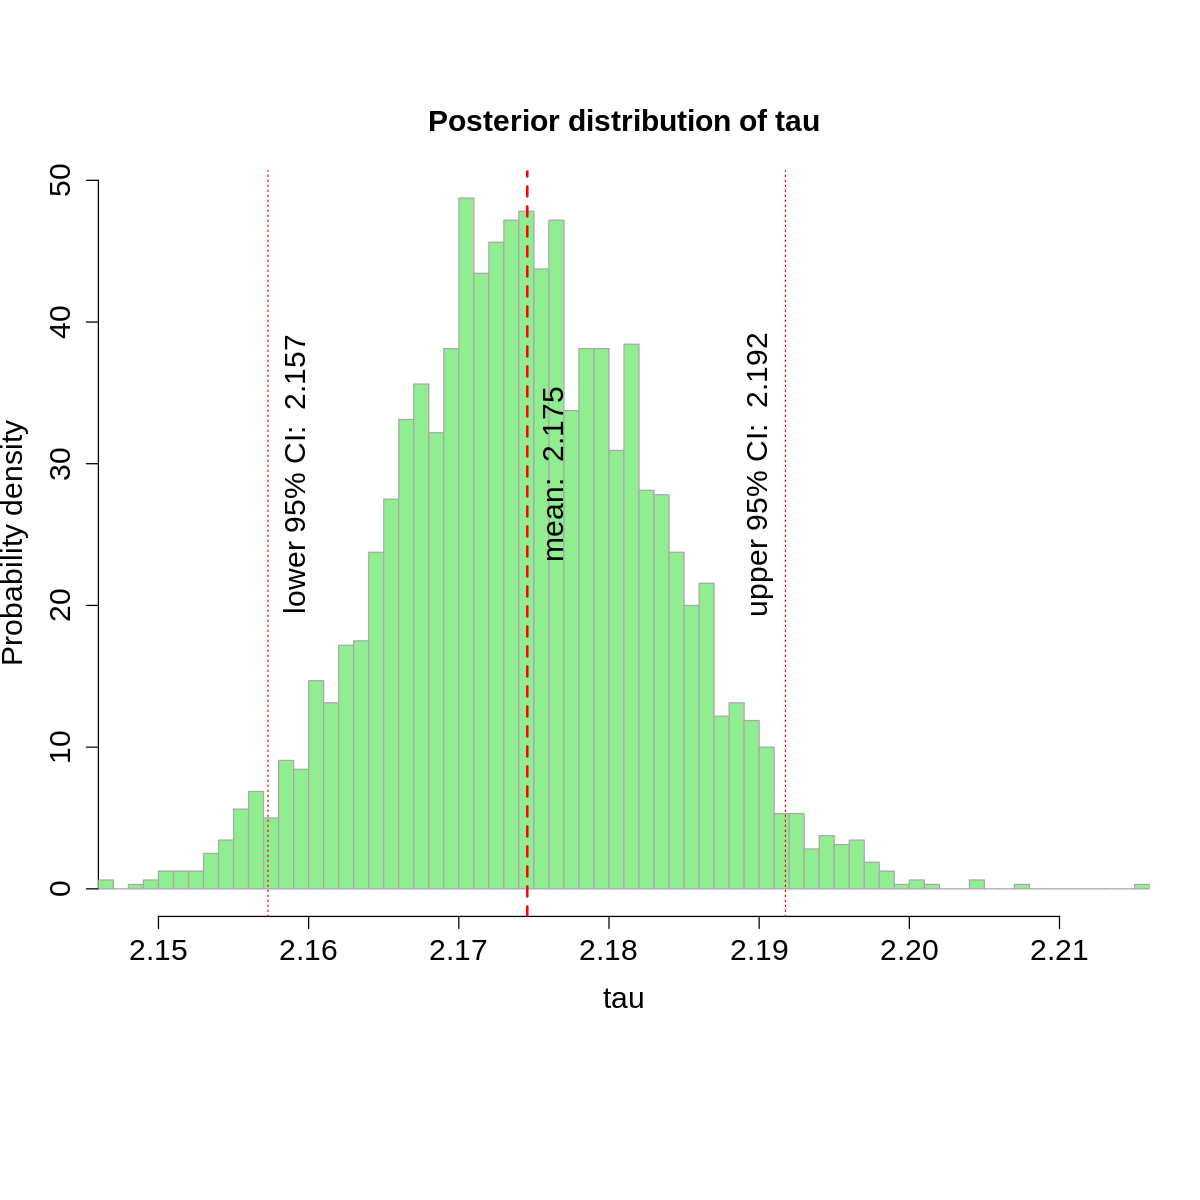

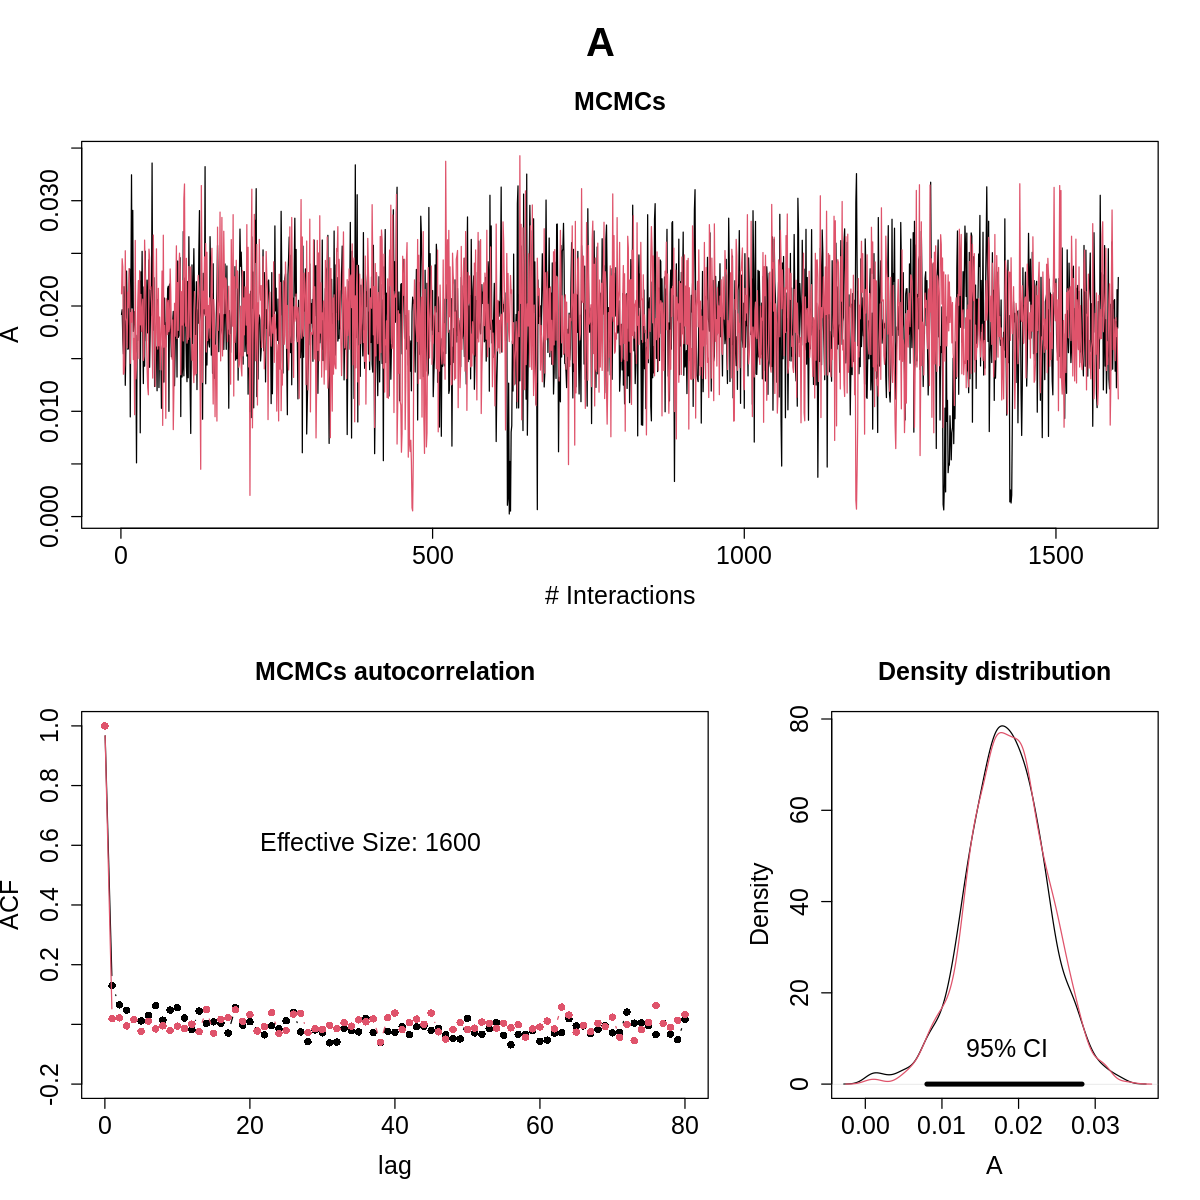

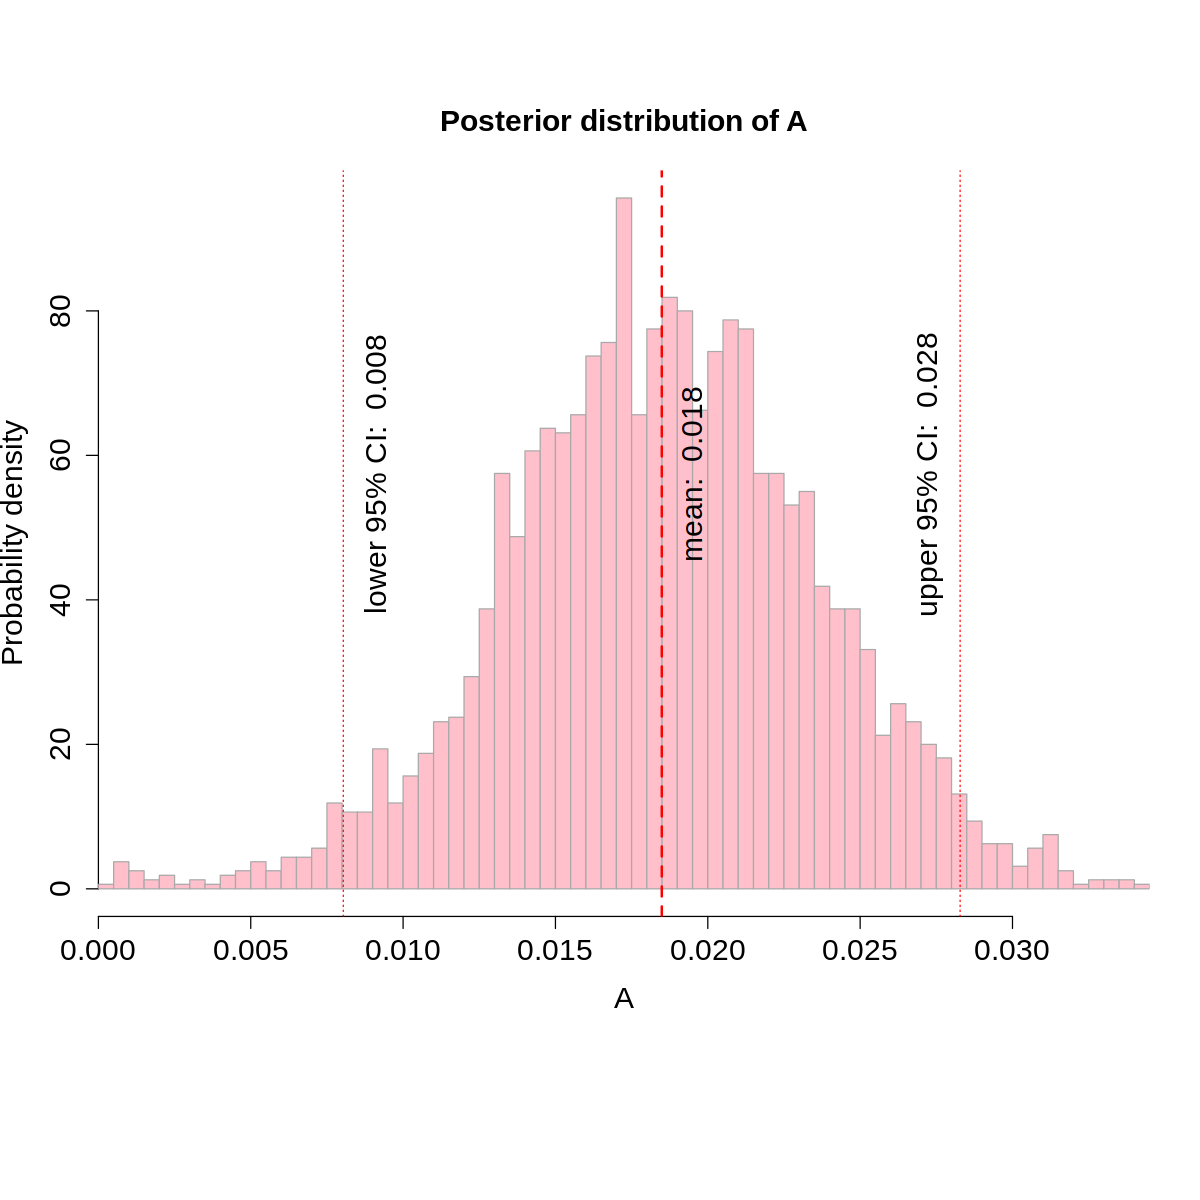

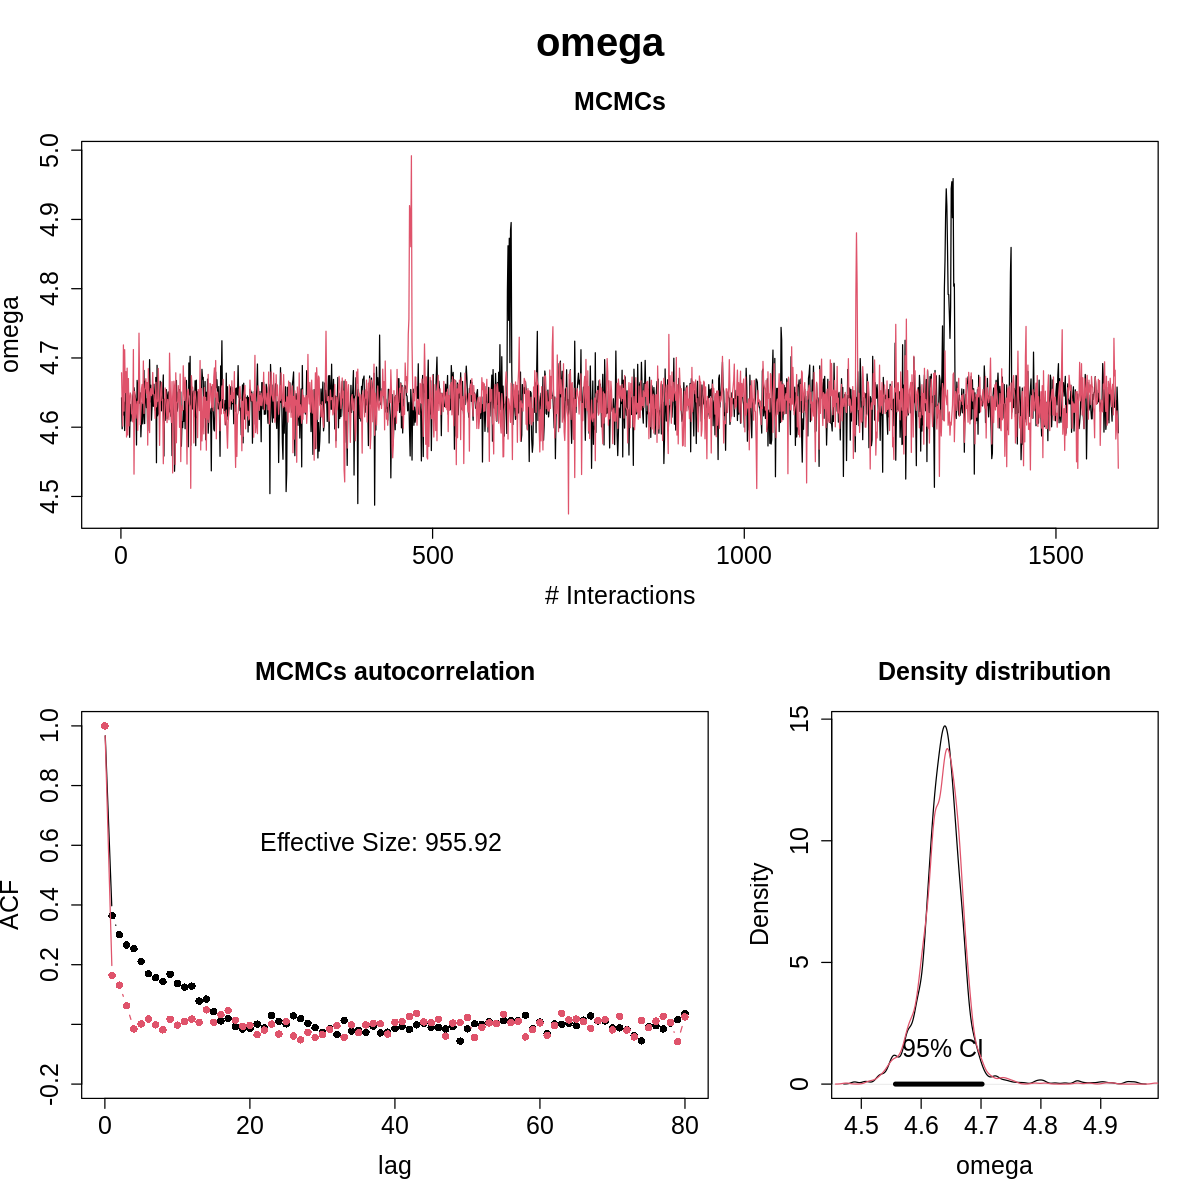

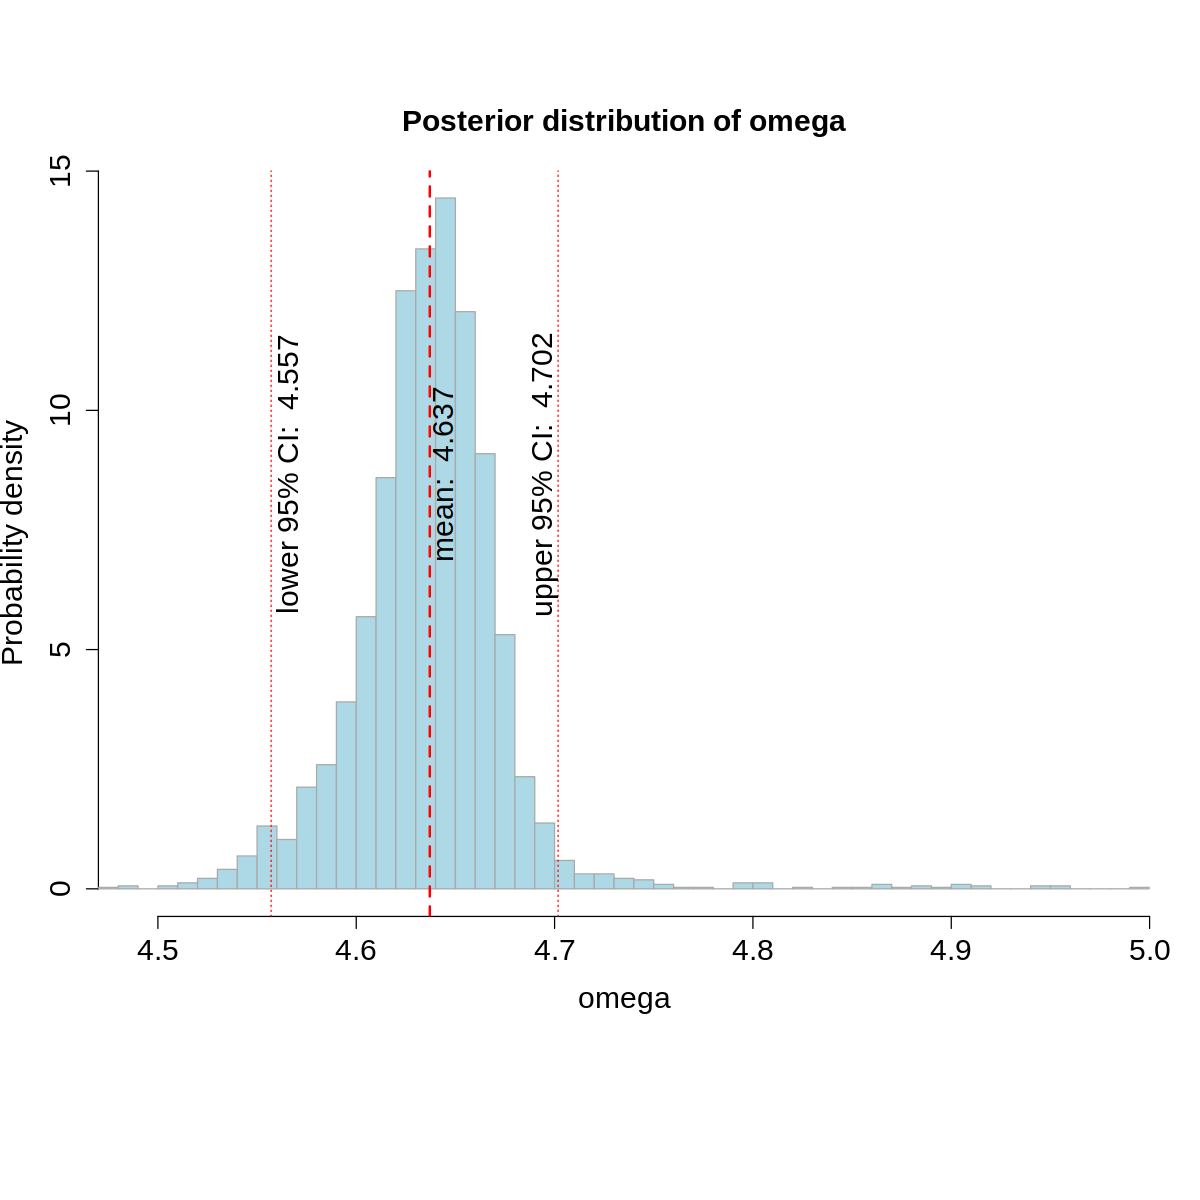

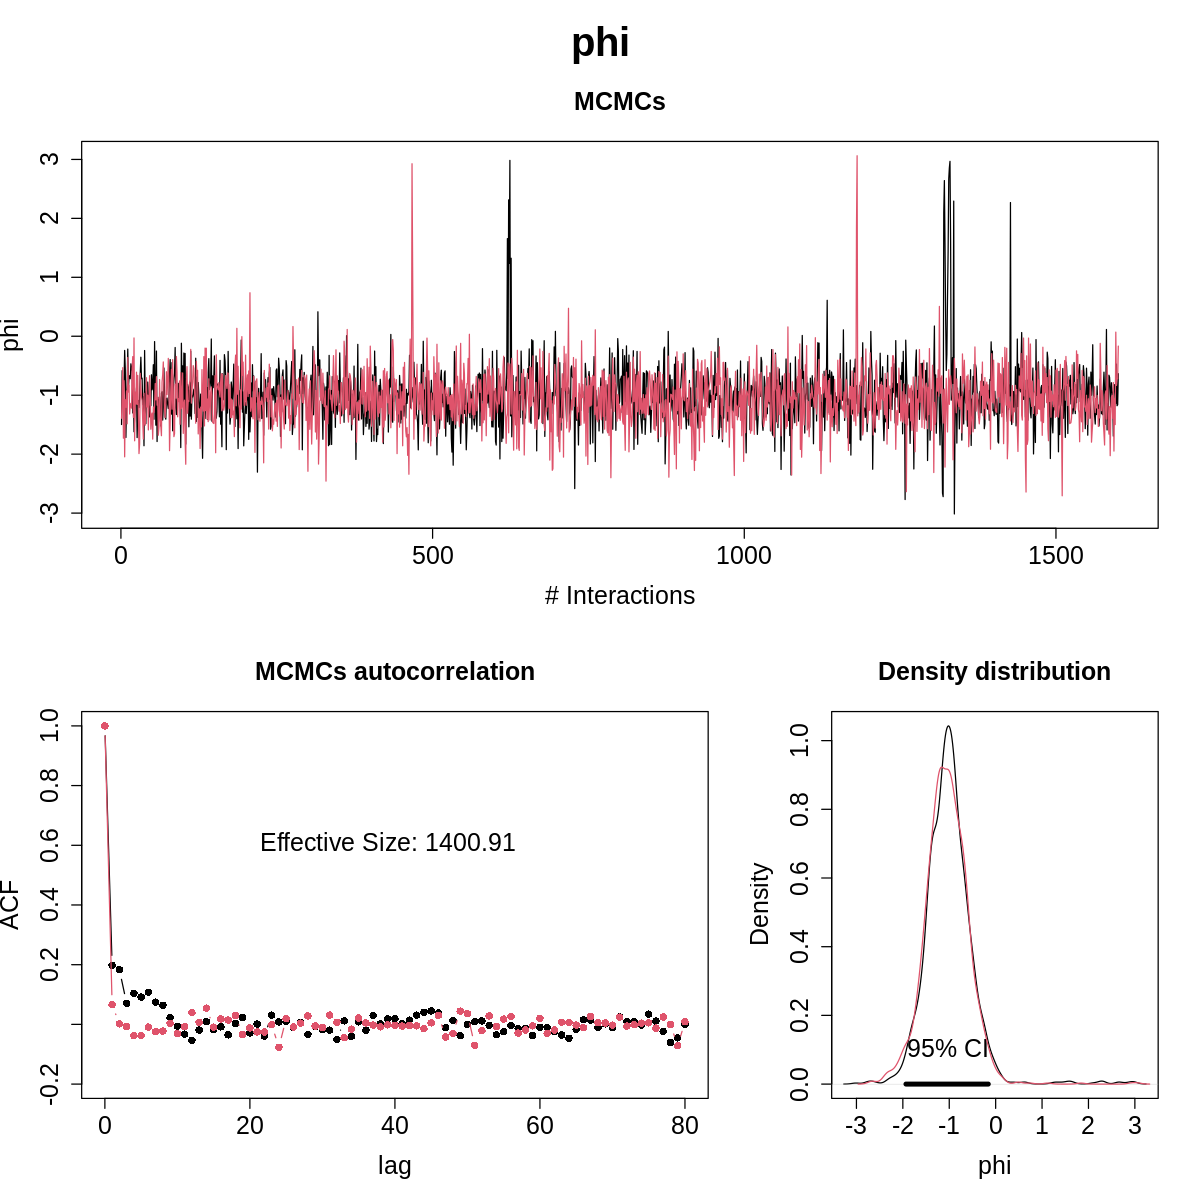

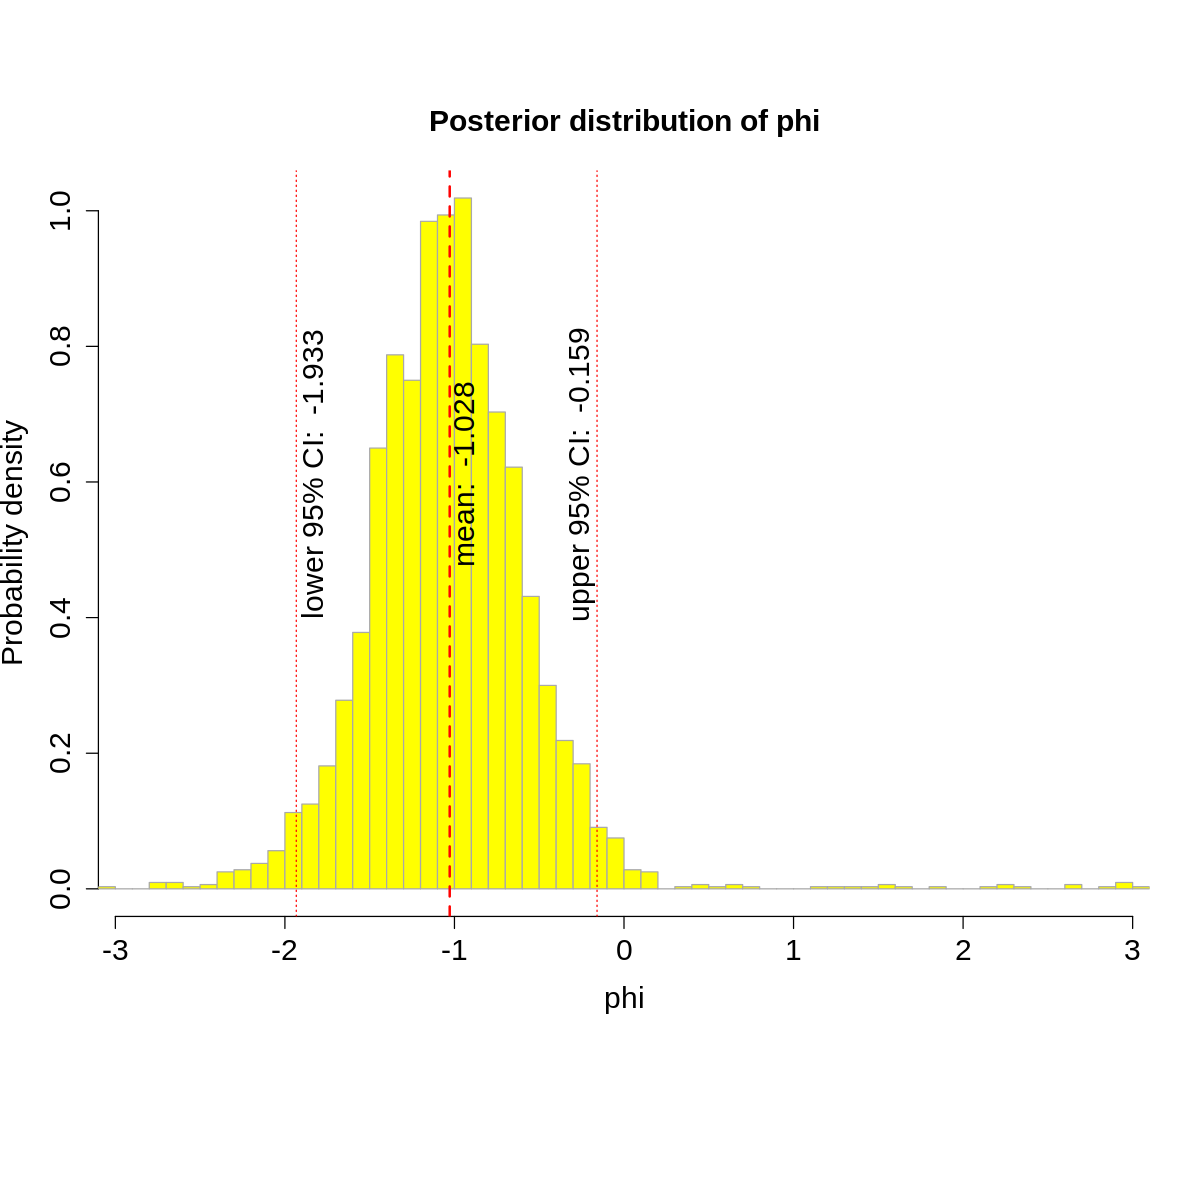

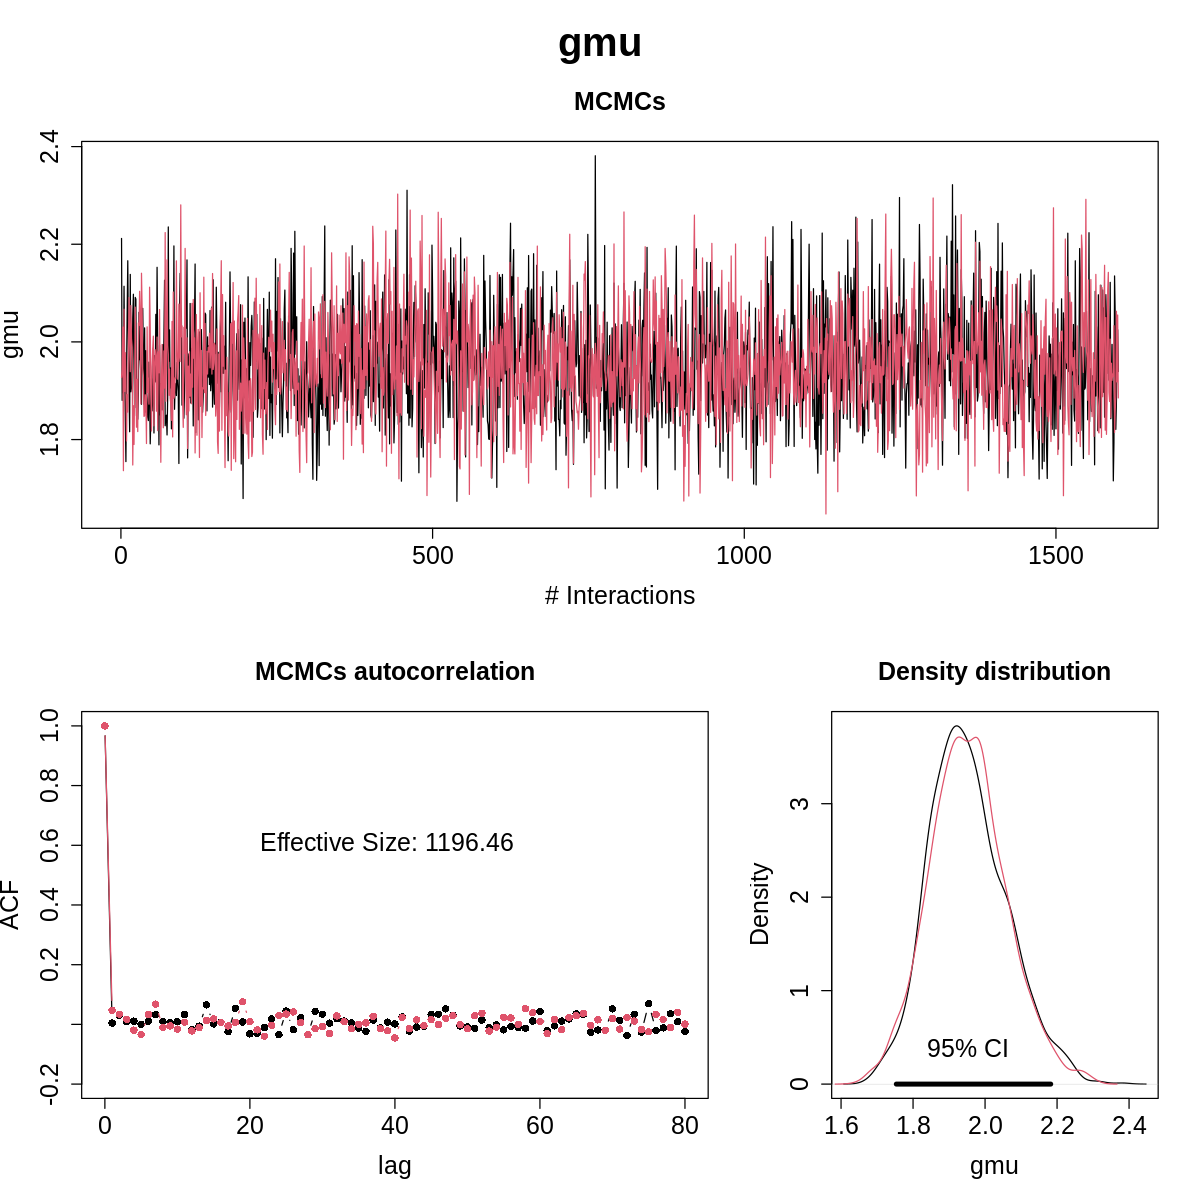

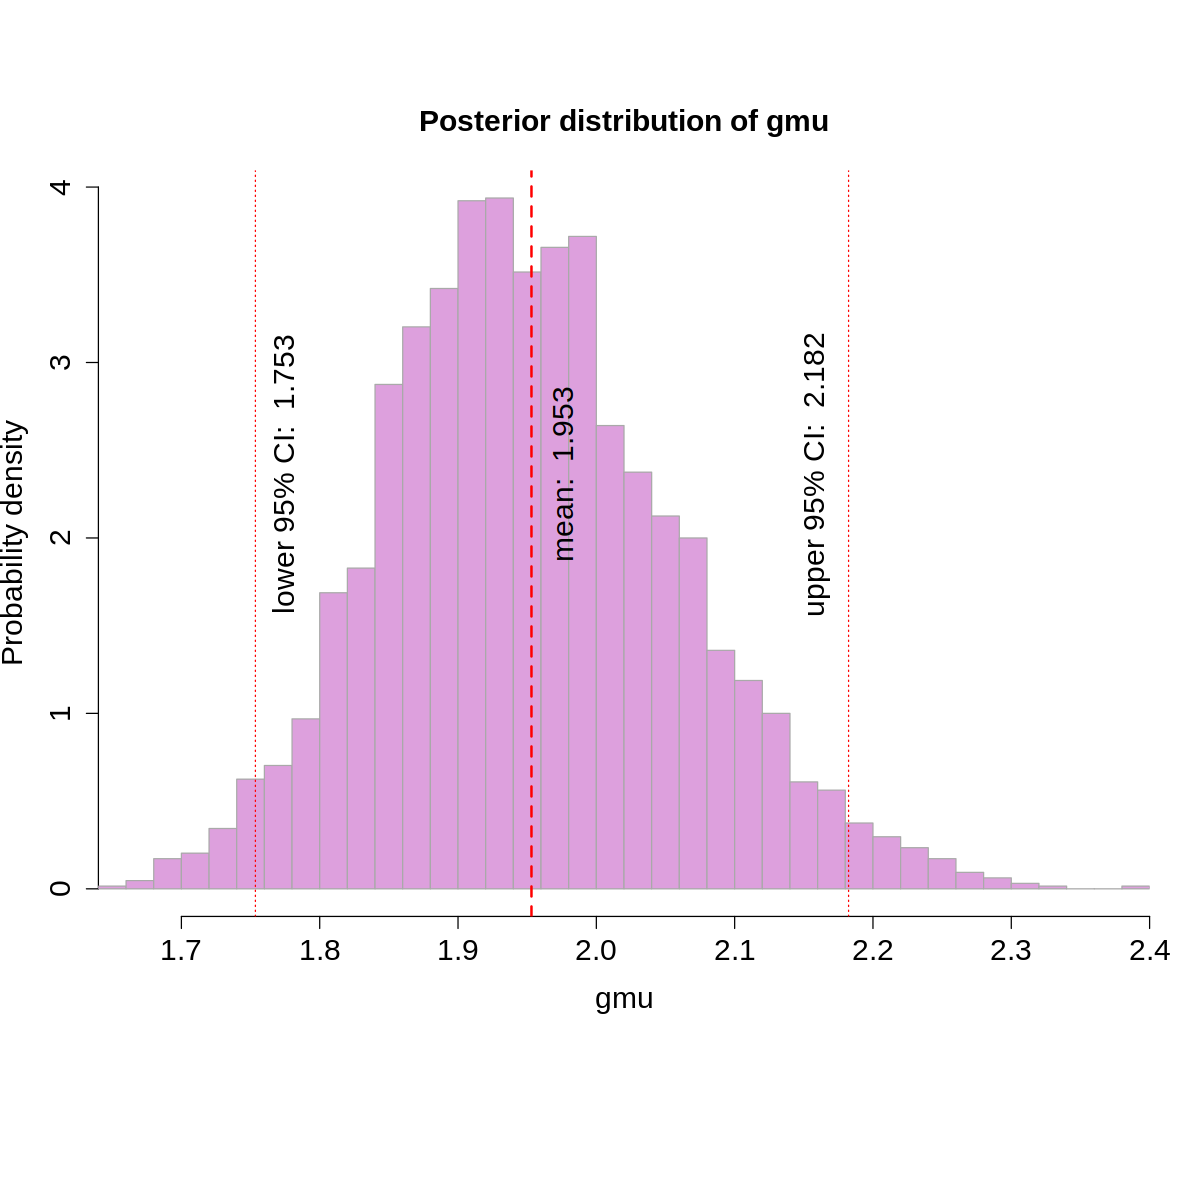

In [31]:
which.model <- 2
n.chains <- 2
STAN_B_array.mcmc <- analysis.bayes(stan.string, data.stan, which.model, nIter = 10000, nChains = n.chains, thin = 5, warmup=2000)

result.STAN.withB <- PlotPosteriorParam(STAN_B_array.mcmc, which.model)

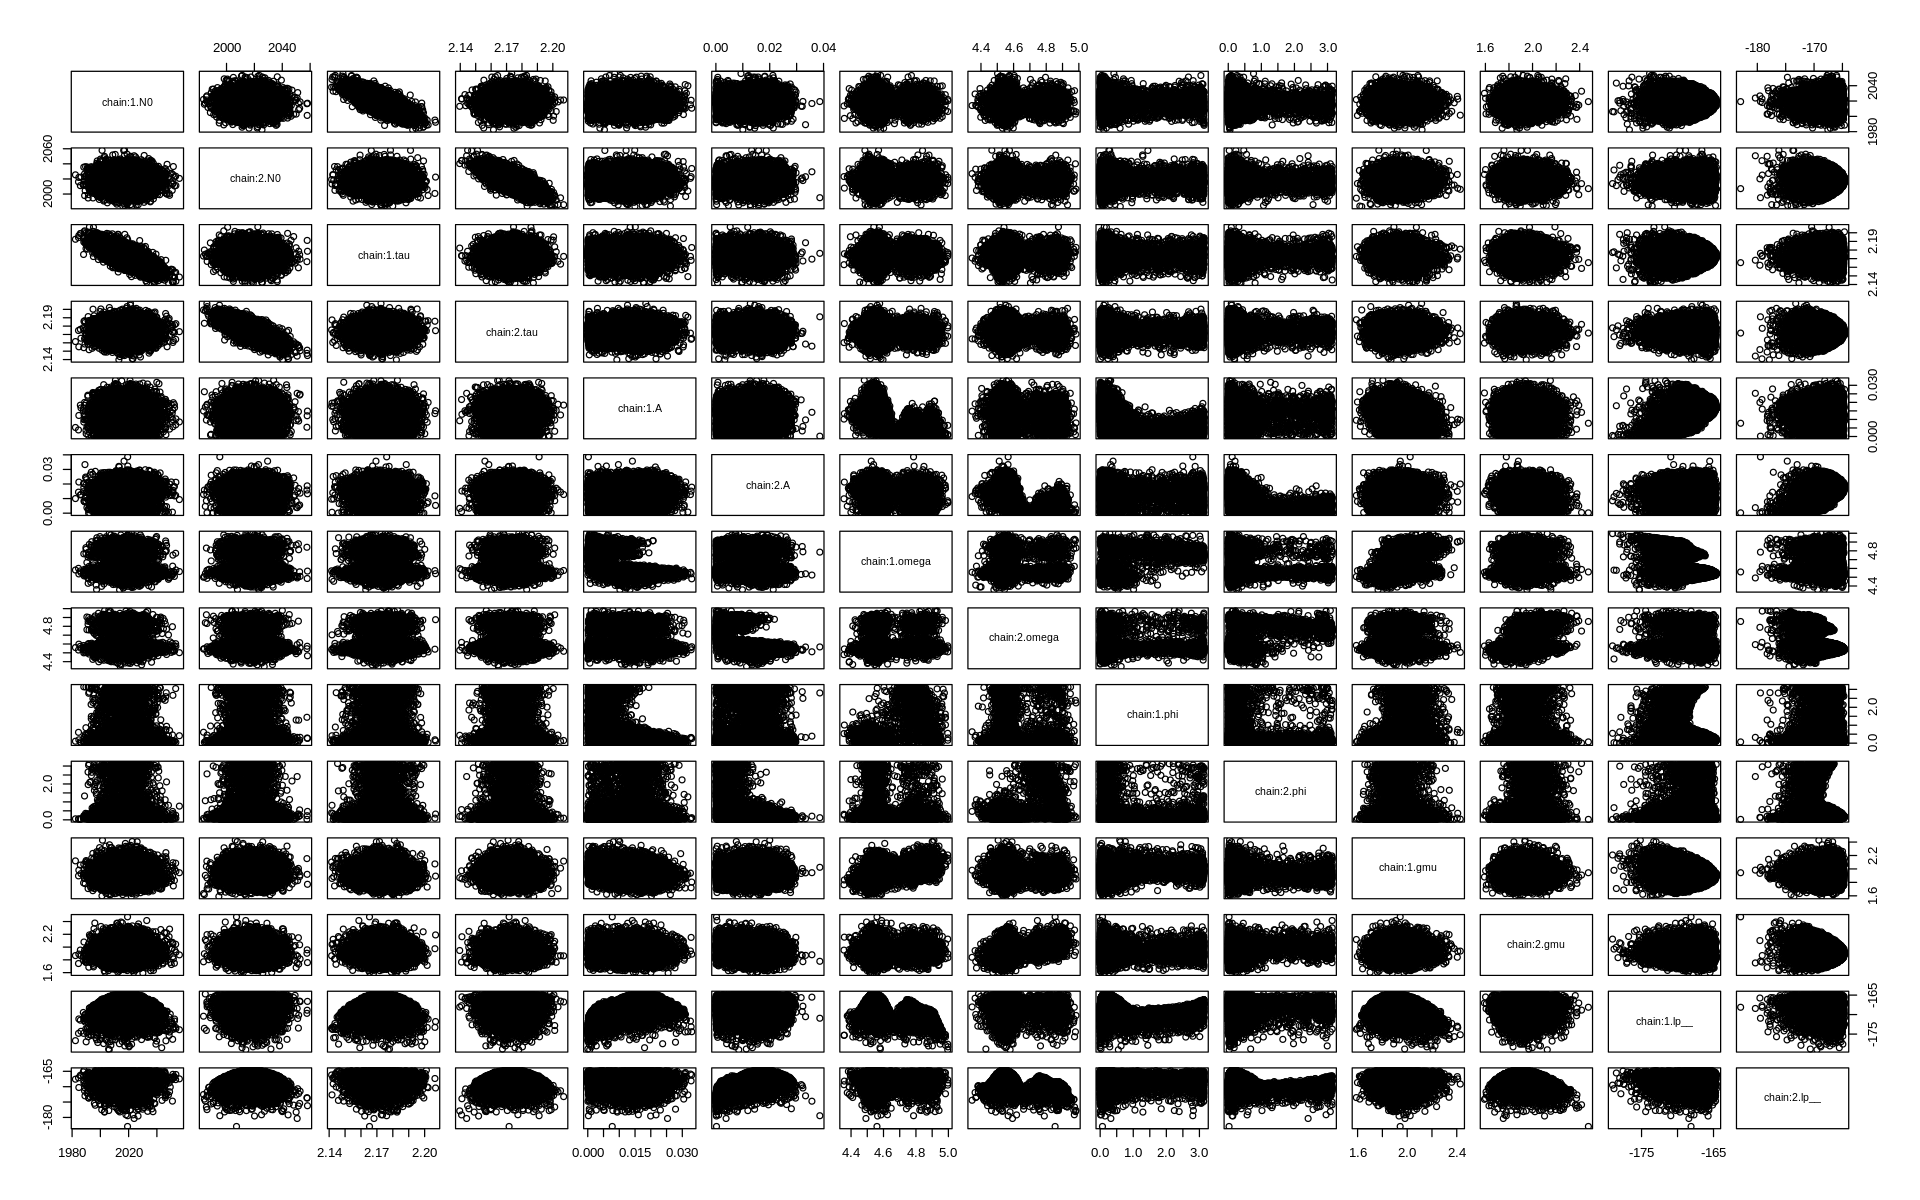

In [24]:
pairs(STAN_B_array.mcmc)

## PARAMETERS CORRELATION IN STAN

In [19]:
# combine sequentially all chains to get get one single dataframe for collelations
which.model <- 2 # with B
n.chains <- 3
params <- switch( which.model, c("N0","tau") , c("N0","tau","A","omega","phi",'gmu') )
df <- lapply( params, function(p) { sapply(1:n.chains, function(j) array.mcmc[, j, p]) |> as.vector() } ) |> as.data.frame()
names(df) <- params
cat("Correlation matrix \n")
cor(df)

ERROR: Error in FUN(X[[i]], ...): oggetto 'array.mcmc' non trovato


In [ ]:
options(repr.plot.width = 22, repr.plot.height = 22)

params <- names(df)
pairs <- combn(params, 2, simplify = FALSE)

n <- length(pairs)
ncol <- ceiling(sqrt(n))
nrow <- ceiling(n / ncol)

layout(matrix(1:(nrow * ncol), nrow = nrow, byrow = TRUE), widths = rep(1.2, ncol), heights = rep(1.2, nrow))
par(mar = c(5, 5, 2, 2), oma = c(2, 2, 2, 2))

for (p in pairs) {
  plot(df[[p[1]]], df[[p[2]]],
       xlab = p[1], ylab = p[2],
       main = paste(p[1], "vs", p[2]),
       cex.main = 2.5, cex.axis = 1.8, cex.lab = 1.8,
       pch = 16, col = "navy")
}

## RESULT FIT ON DATA

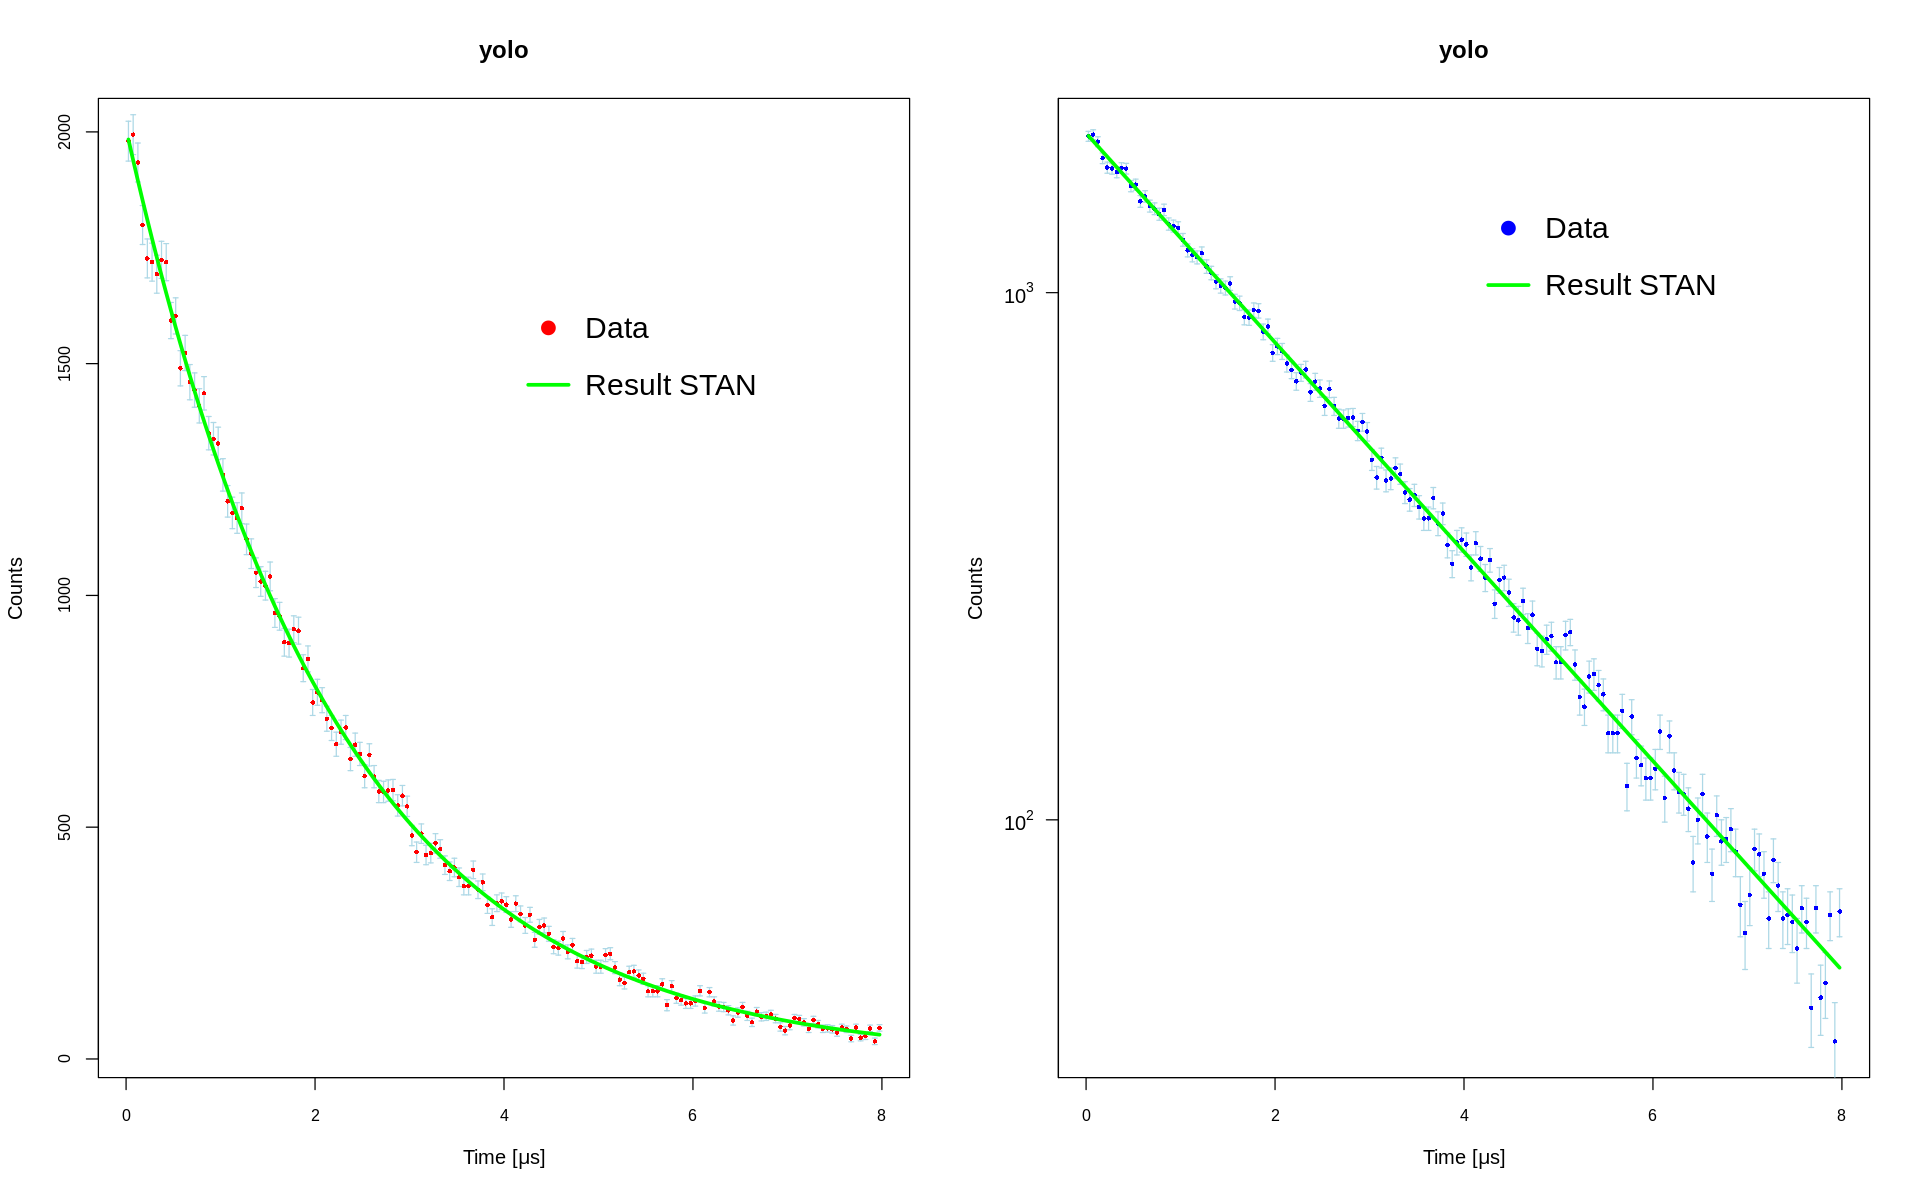

In [94]:
N0 <- result.STAN.noB[["N0"]]
tau <- result.STAN.noB[["tau"]]
STAN.graph.noB <- Exp.decay(data.noB$t, N0, tau)
plot.data(data.noB, "yolo", fit=STAN.graph.noB)

[1] 0.01849008

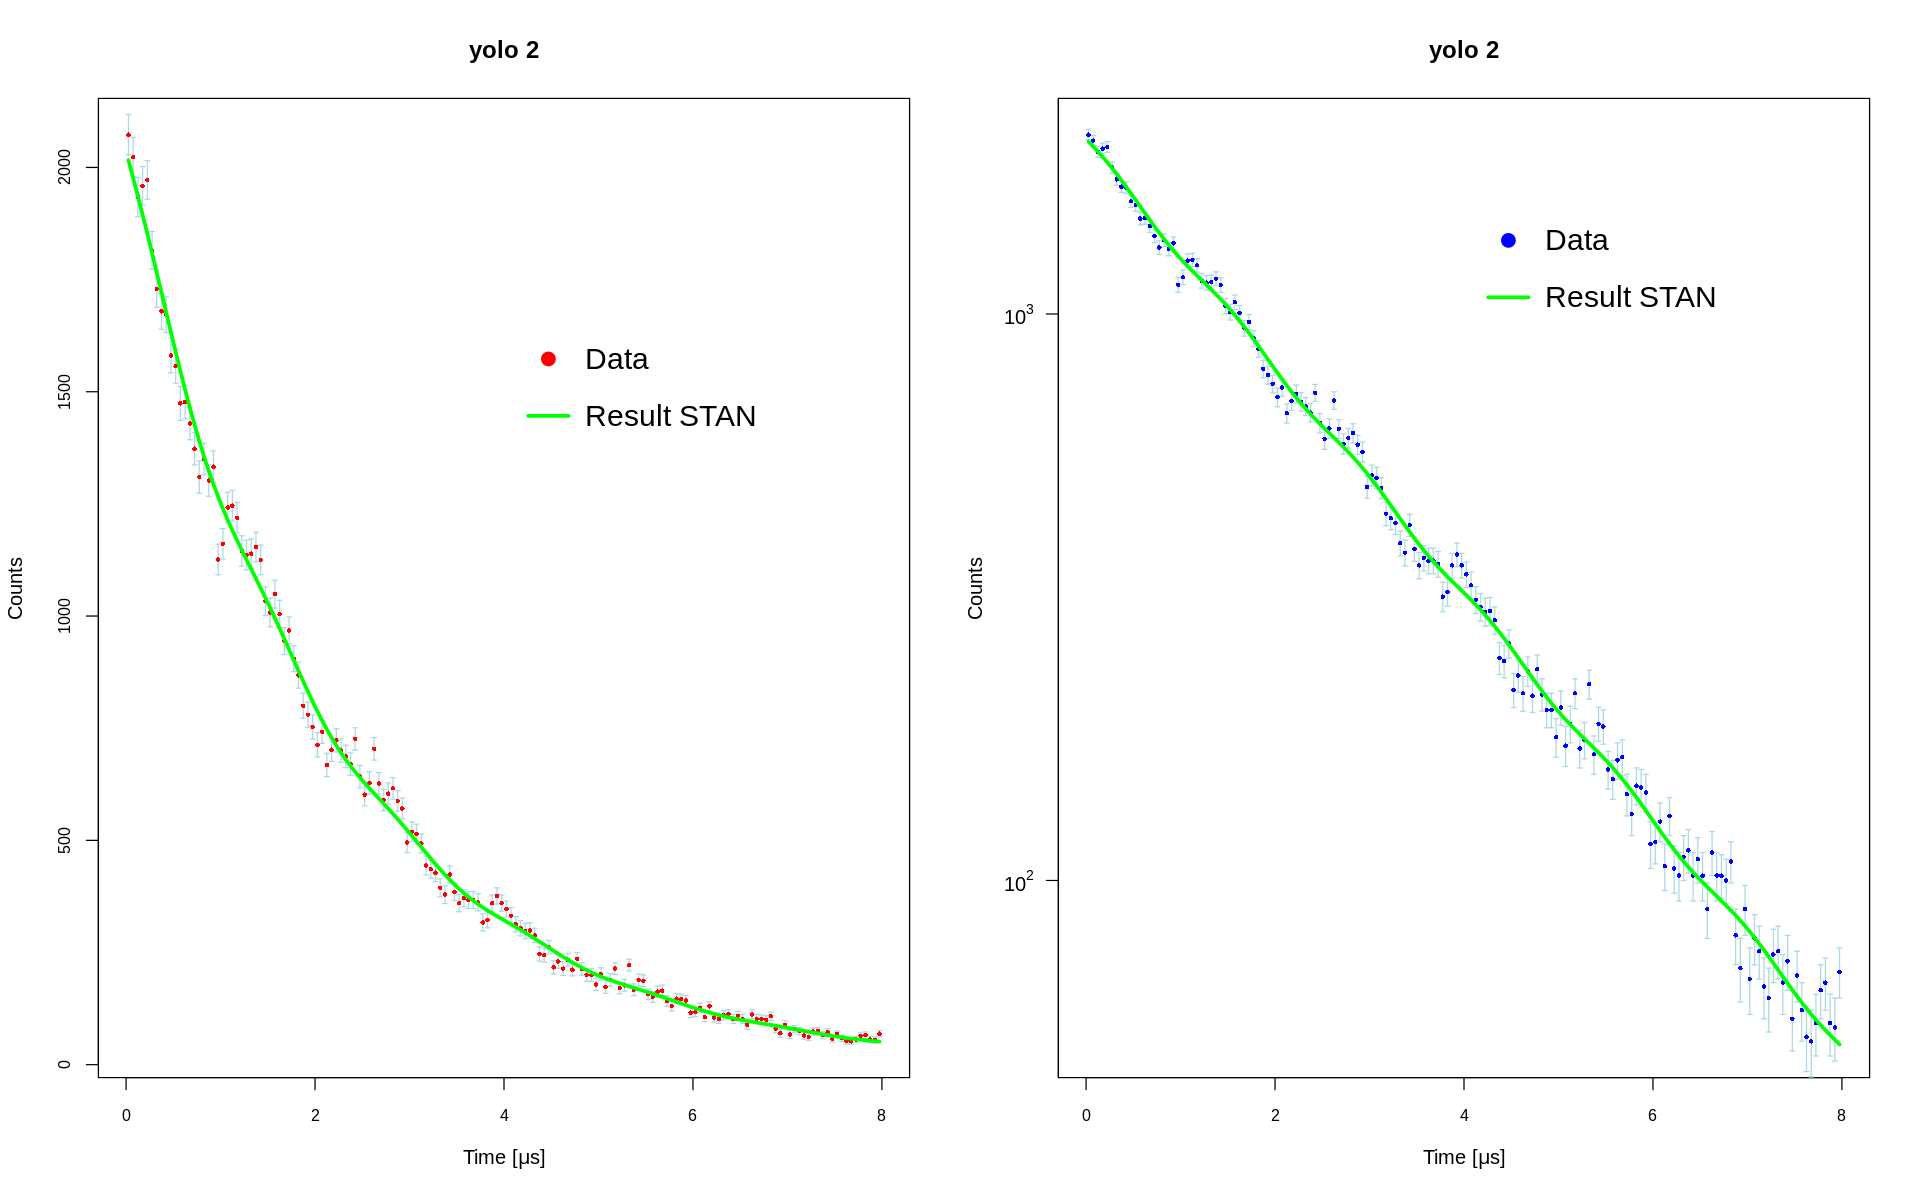

In [32]:
N0 <- result.STAN.withB[["N0"]]
tau <- result.STAN.withB[["tau"]]
A <- result.STAN.withB[["A"]]
omega <- result.STAN.withB[["omega"]]
phi <- result.STAN.withB[["phi"]]
STAN.graph.withB <- Exp.decay.oscill(data.withB$t, N0, tau, omega, A, phi)
plot.data(data.withB, "yolo 2", fit=STAN.graph.withB)

A

# MCMC ANALYSIS: JAGS

In [19]:
library(rjags)

Linked to JAGS 4.3.2

Loaded modules: basemod,bugs



In [20]:
model.noB <- "
model {
  N0 ~ dnorm(500, 1/100^2)
  tau ~ dnorm(2.2, 1/0.1^2)

  for (i in 1:n) {
    mu[i] <- N0 * exp(-t[i]/tau)
    y[i] ~ dnorm(mu[i], 1/s[i]^2)
  }
}
"

model.withB <- "
model {

    N0 ~ dnorm(500, 1/100^2)
    tau ~ dnorm(2.15, 1 / (0.1^2))
    A ~ dunif(0, 0.1)
    omega ~ dnorm(4.75, 1/(0.1)^2)
    phi ~ dunif(-3.14159, 3.14159)

    # Prior for B (if uncertain)
    B ~ dnorm(5.6, 1 / (0.3^2))  # mT

    e <- 1.602e-19     #C
    m <- 1.8835e-28    #kg  

    #G_mu posterior
    gmu <- (2 * m * omega*1e6) / (e * B * 1e-3)

    
    for (i in 1:n) {
    y[i] ~ dnorm(N0 * exp(-t[i] / tau) * (1 + A * cos(6.28318 * omega * t[i] + phi)), 1 / (s[i] * s[i]))
    }
    
}
"

In [21]:
analysis.bayes.rjags <- function(model.string, data.list, which.model, nIter = 5000, nChains = 2, thin = 1) {
  
  model.code <- switch(which.model, model.noB, model.withB)
  jags.model <- jags.model(textConnection(model.code), data = data.list, n.chains = nChains, quiet=TRUE)
  
  update(jags.model, 500)  # burn-in
  
  params <- switch(which.model, c("N0", "tau"), c("N0", "tau", "A", "omega", "phi", 'gmu'))
  samples <- coda.samples(jags.model, variable.names = params, n.iter = nIter, thin = thin)
  
  cat(switch(which.model, "WITHOUT B\n", "WITH B\n"))
  print(summary(samples))
  
  return(samples)
}

In [22]:
data.jags <- lapply(1:2, function(i) {
  list(n = length(t), t = data[[i]]$t, y = data[[i]]$y, s = data[[i]]$s)
})

In [23]:
mcmc.list.to.array <- function(mcmc.list.obj) {
  n.iter <- niter(mcmc.list.obj[[1]])
  n.chain <- length(mcmc.list.obj)
  param.names <- colnames(mcmc.list.obj[[1]])
  n.param <- length(param.names)

  array.mcmc <- array(NA, dim = c(n.iter, n.chain, n.param),
                      dimnames = list(NULL, NULL, param.names))

  for (j in 1:n.chain) {
    array.mcmc[, j, ] <- as.matrix(mcmc.list.obj[[j]])
  }

  return(array.mcmc)
}

WITHOUT B

Iterations = 1505:51500
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean      SD  Naive SE Time-series SE
N0  1008.628 7.08073 5.007e-02      0.0551610
tau    2.185 0.01251 8.849e-05      0.0000998

2. Quantiles for each variable:

       2.5%      25%      50%      75%   97.5%
N0  994.701 1003.867 1008.617 1013.422 1022.62
tau   2.161    2.177    2.185    2.194    2.21



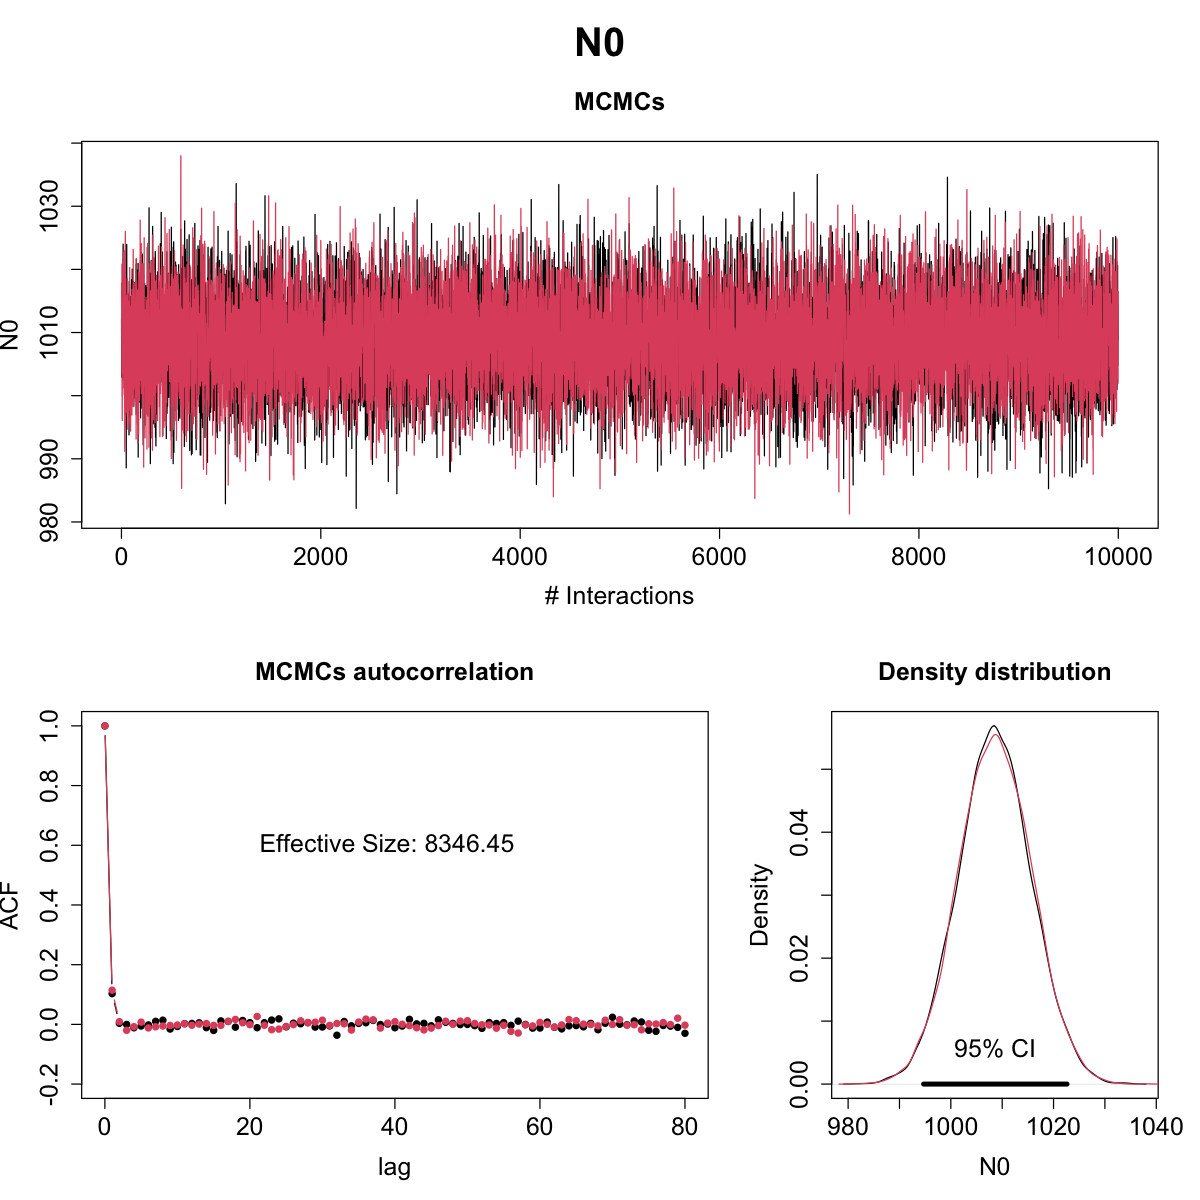

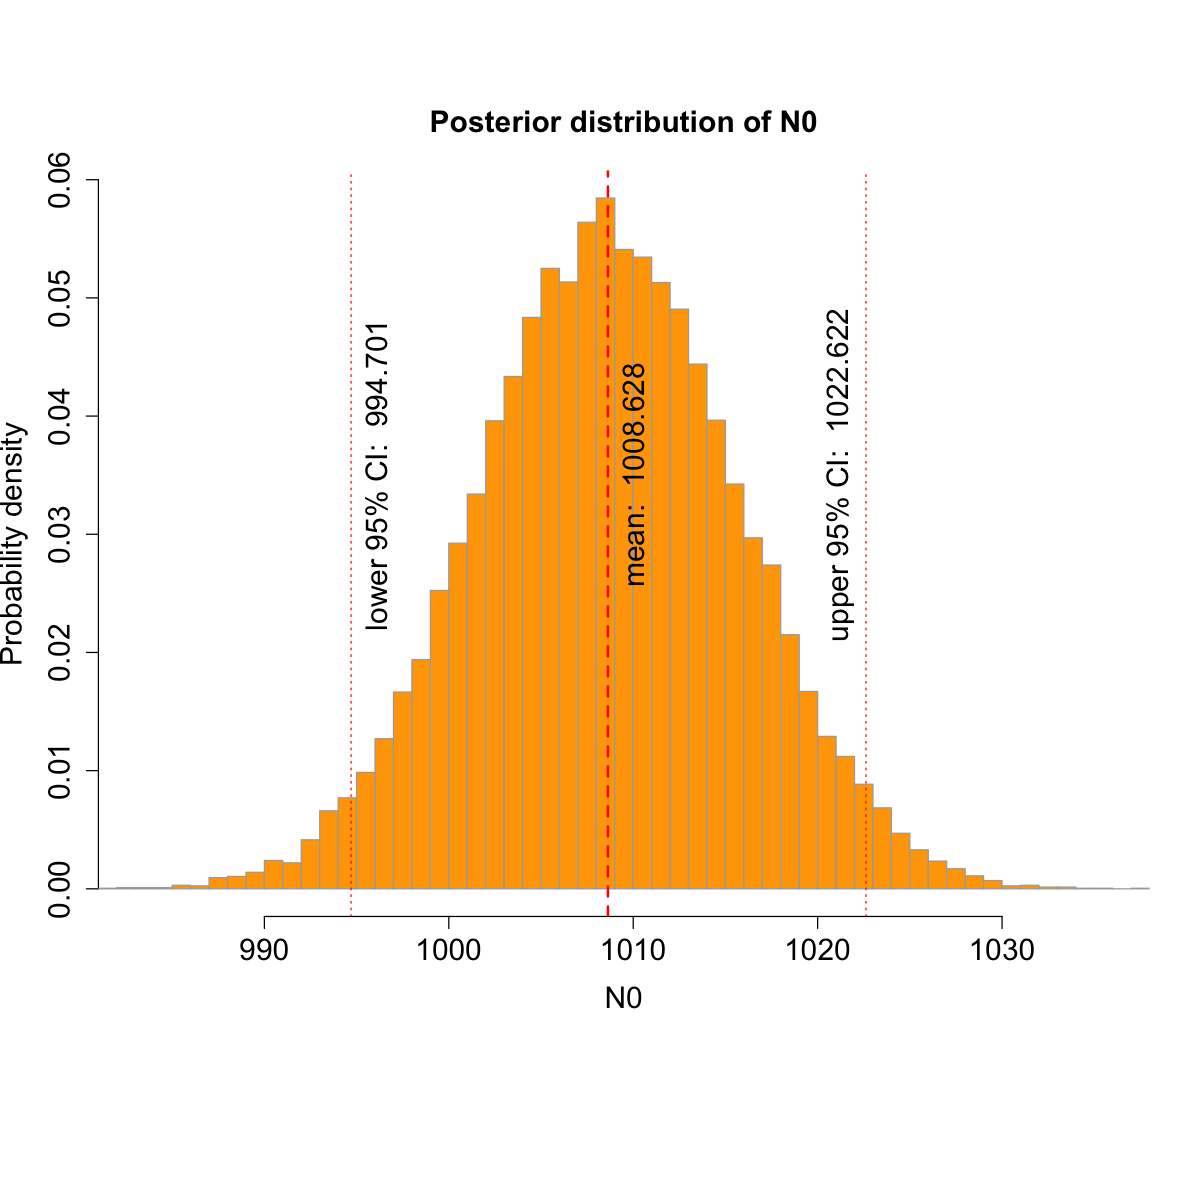

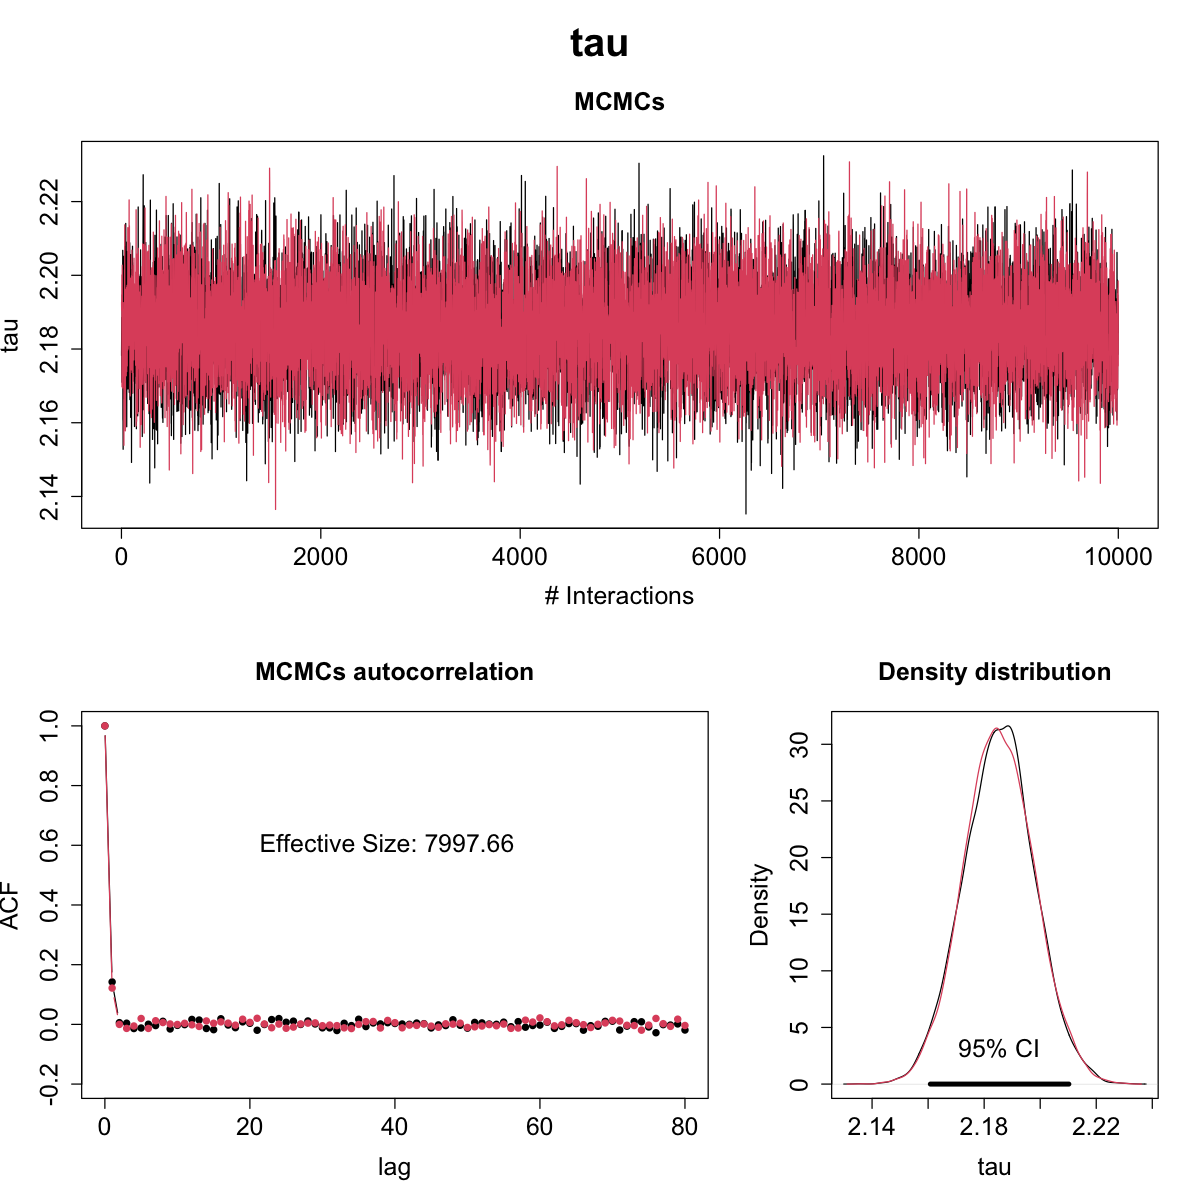

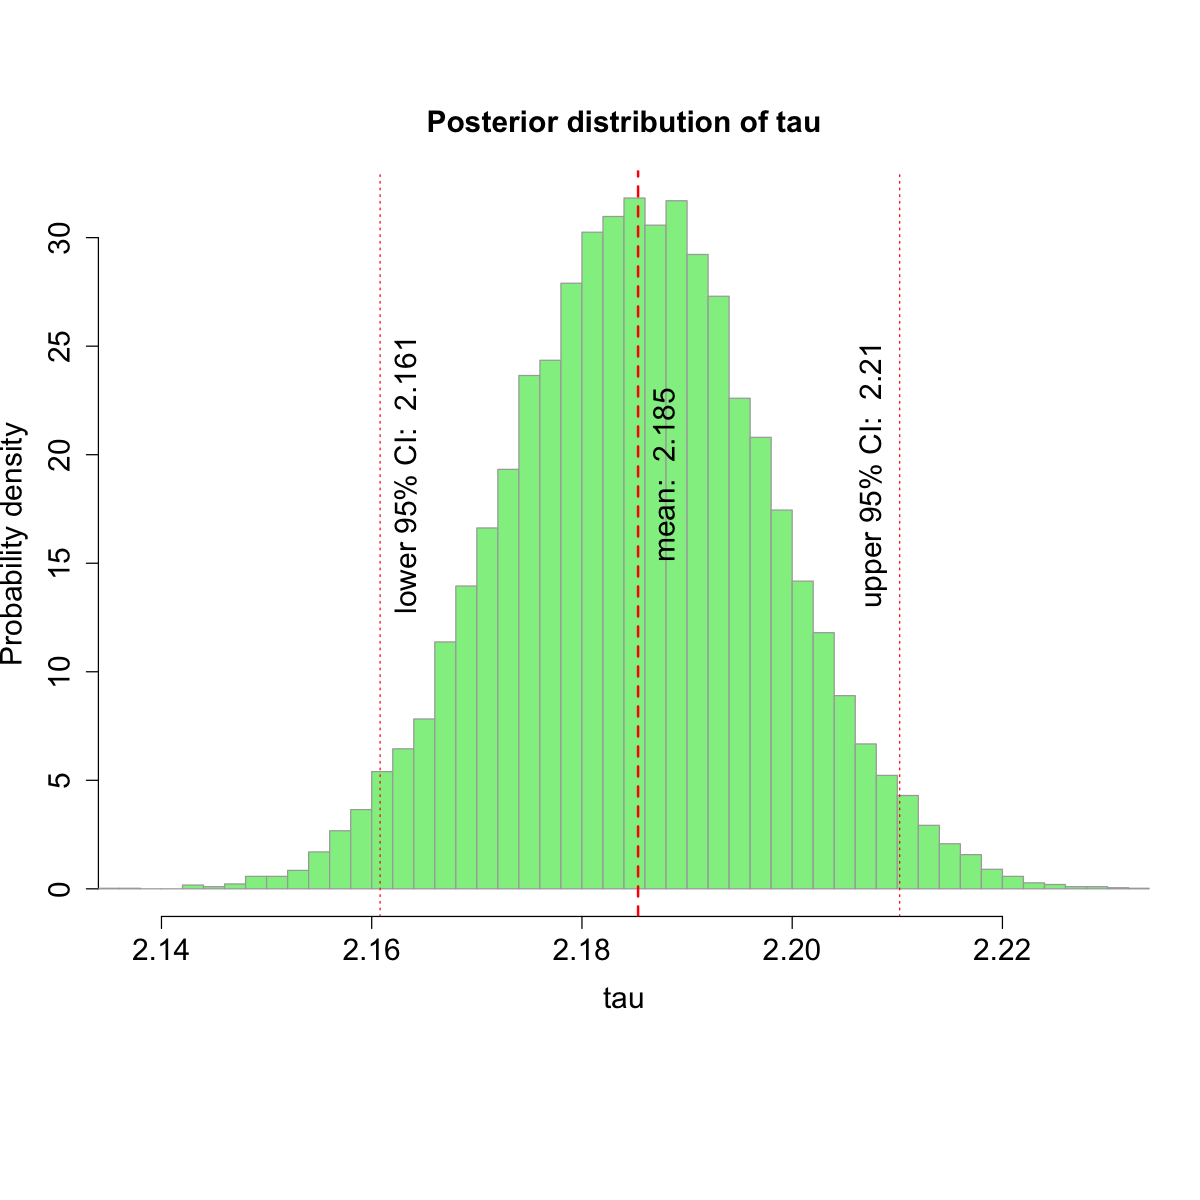

In [24]:
#Sample from jags markov chain
which.model <- 1
samples <- analysis.bayes.rjags(model.string = NULL, data.list = data.jags[[which.model]], which.model = which.model, nIter = 50000,nChains = 2, thin = 5)

#Using the same plotting function as STAN, converting into correct format
JAGS_NoB_array.mcmc <- mcmc.list.to.array(samples)
PlotPosteriorParam(JAGS_NoB_array.mcmc, which.model = which.model)

WITH B

Iterations = 1505:51500
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean       SD  Naive SE Time-series SE
A      8.097e-03 0.006014 4.252e-05      5.572e-05
N0     1.008e+03 7.097818 5.019e-02      5.587e-02
gmu    1.997e+00 0.121409 8.585e-04      9.883e-04
omega  4.743e+00 0.131543 9.302e-04      1.609e-03
phi   -1.589e-01 1.643991 1.162e-02      1.556e-02
tau    2.177e+00 0.012499 8.838e-05      1.010e-04

2. Quantiles for each variable:

            2.5%        25%        50%       75%     97.5%
A      3.106e-04    0.00322  6.963e-03 1.173e-02 2.222e-02
N0     9.942e+02 1003.28755  1.008e+03 1.013e+03 1.022e+03
gmu    1.775e+00    1.91264  1.992e+00 2.075e+00 2.247e+00
omega  4.457e+00    4.65284  4.755e+00 4.849e+00 4.951e+00
phi   -2.925e+00   -1.42999 -3.050e-01 1.075e+00 2.945e+00
tau    2.152e+00    2.16824  2.177e+00 2.185e+00 

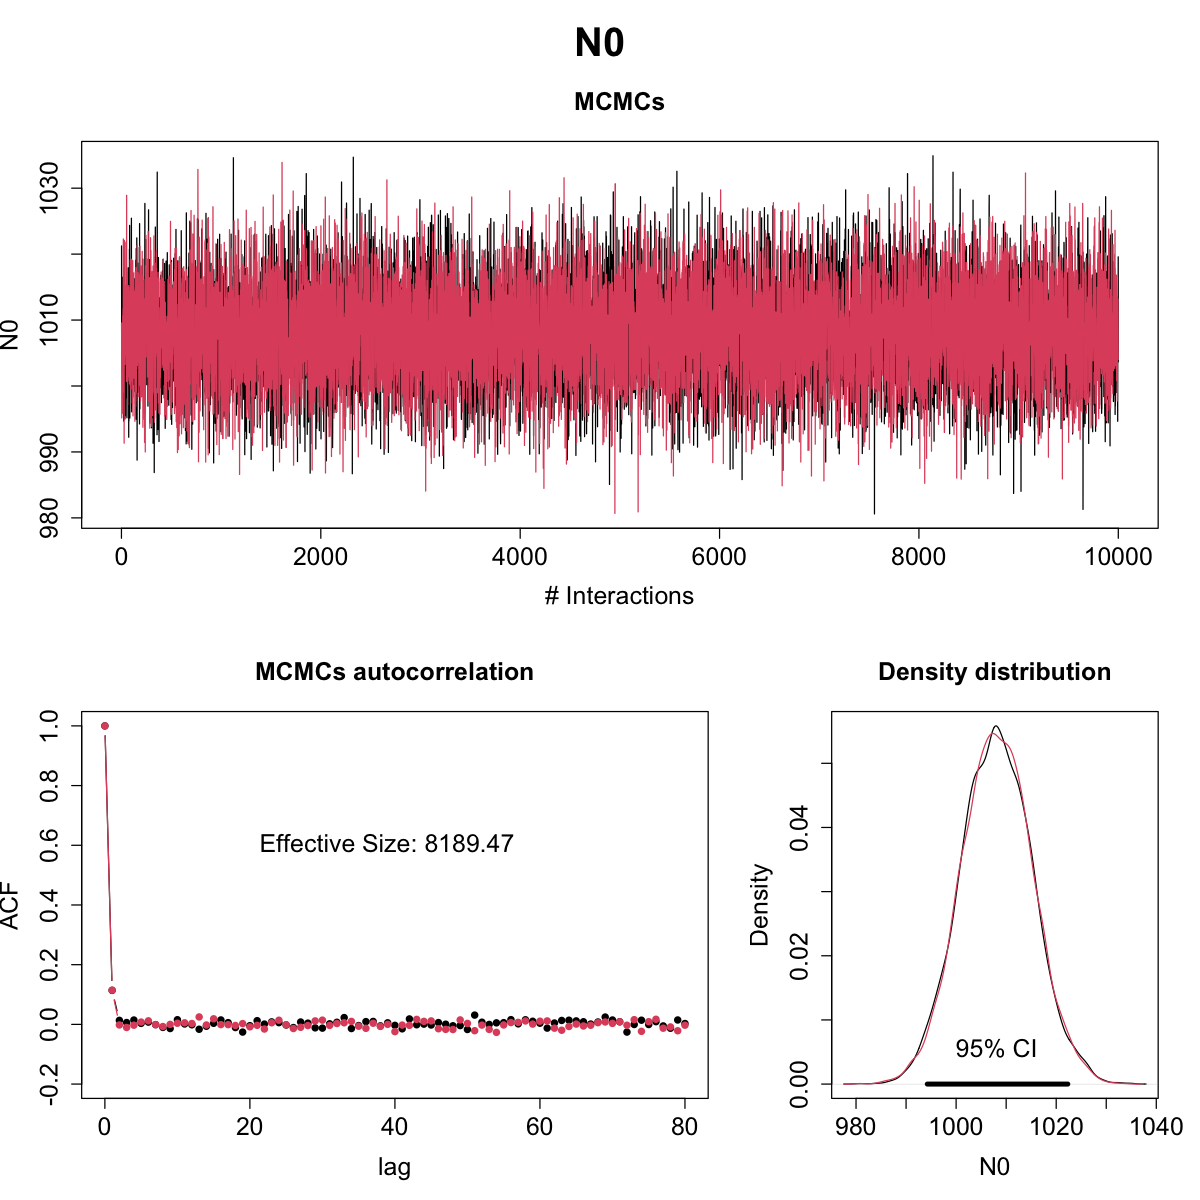

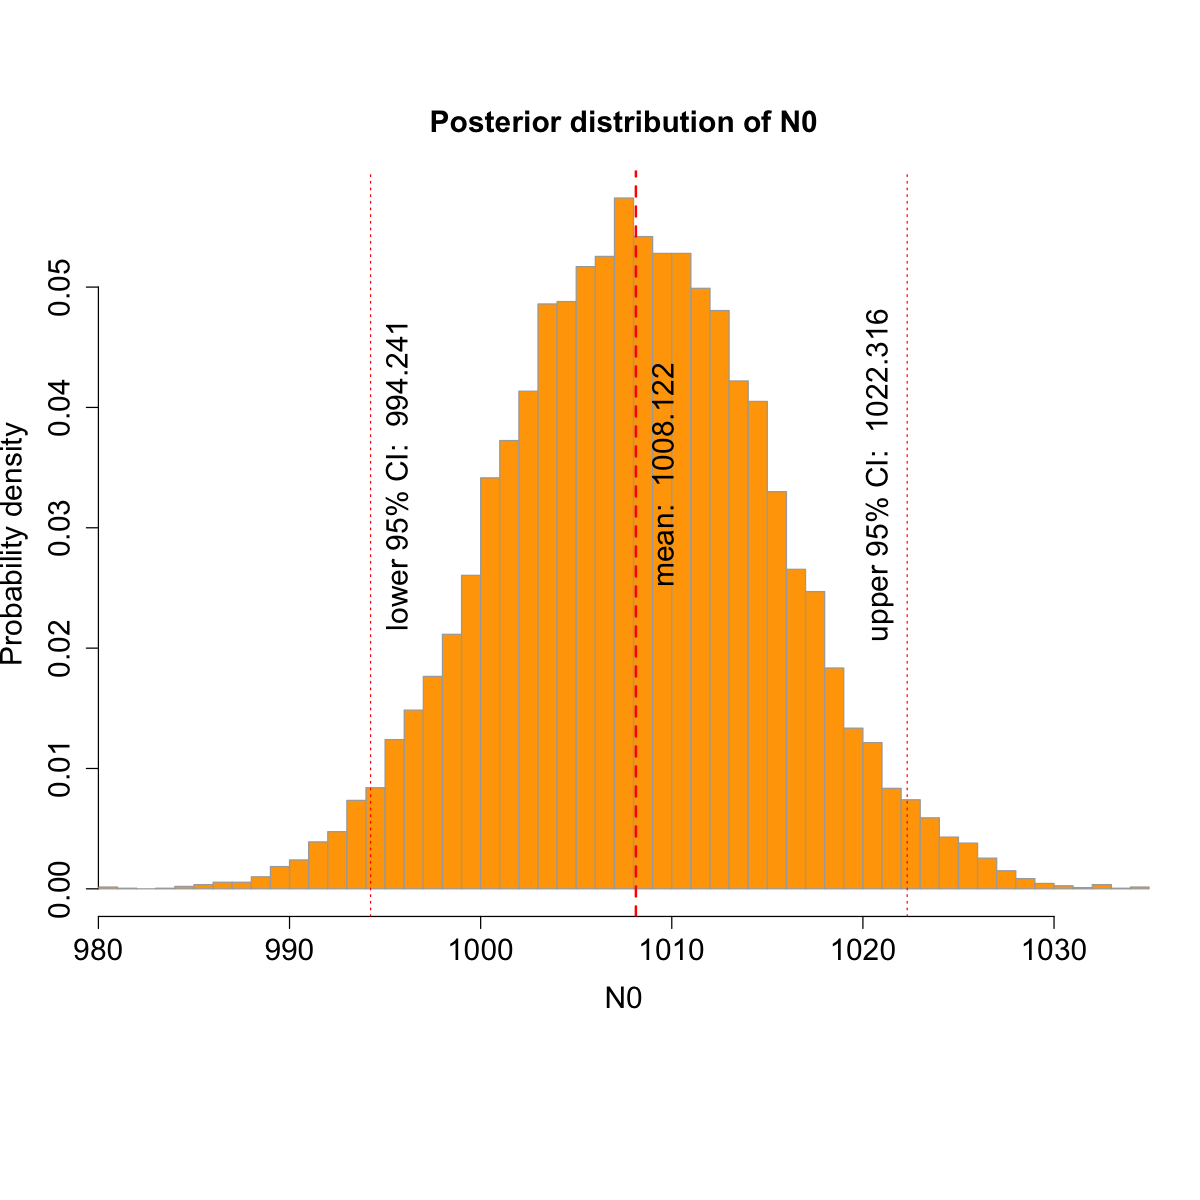

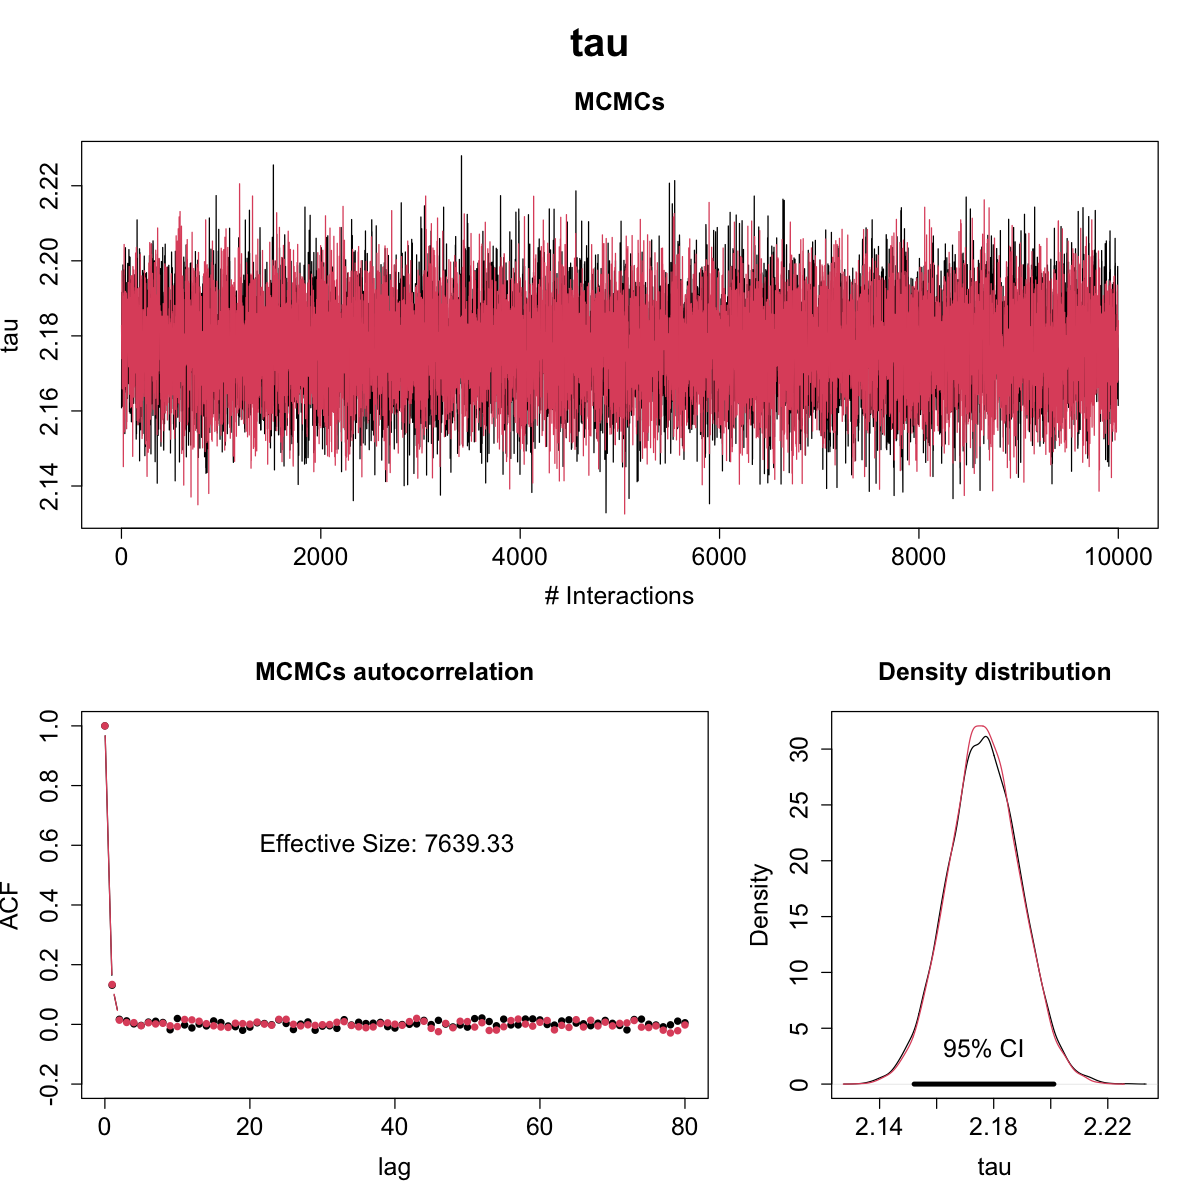

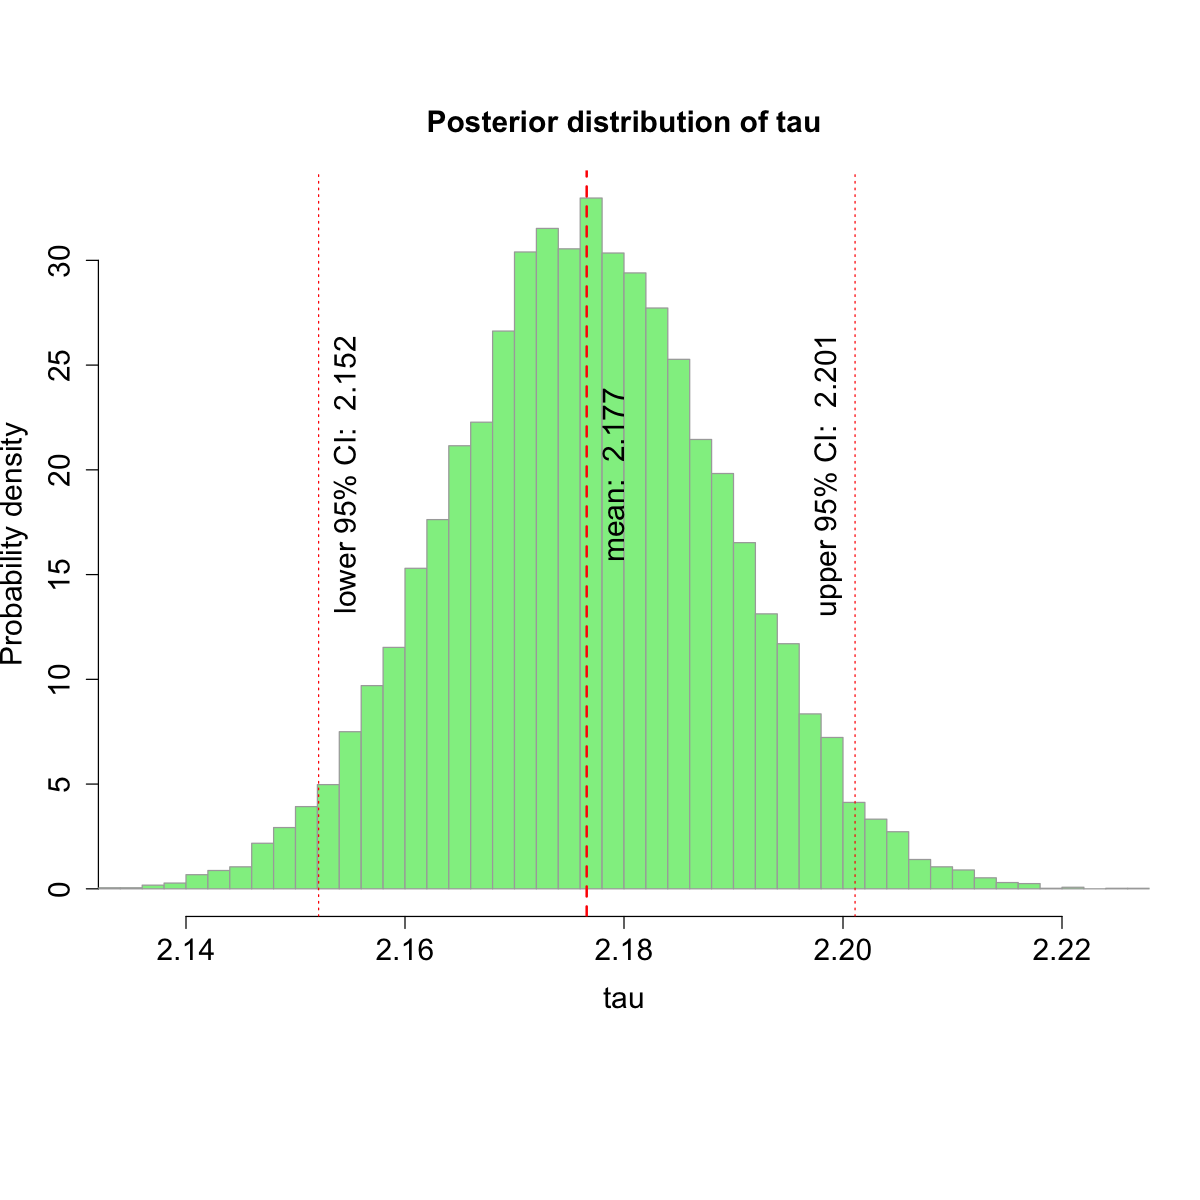

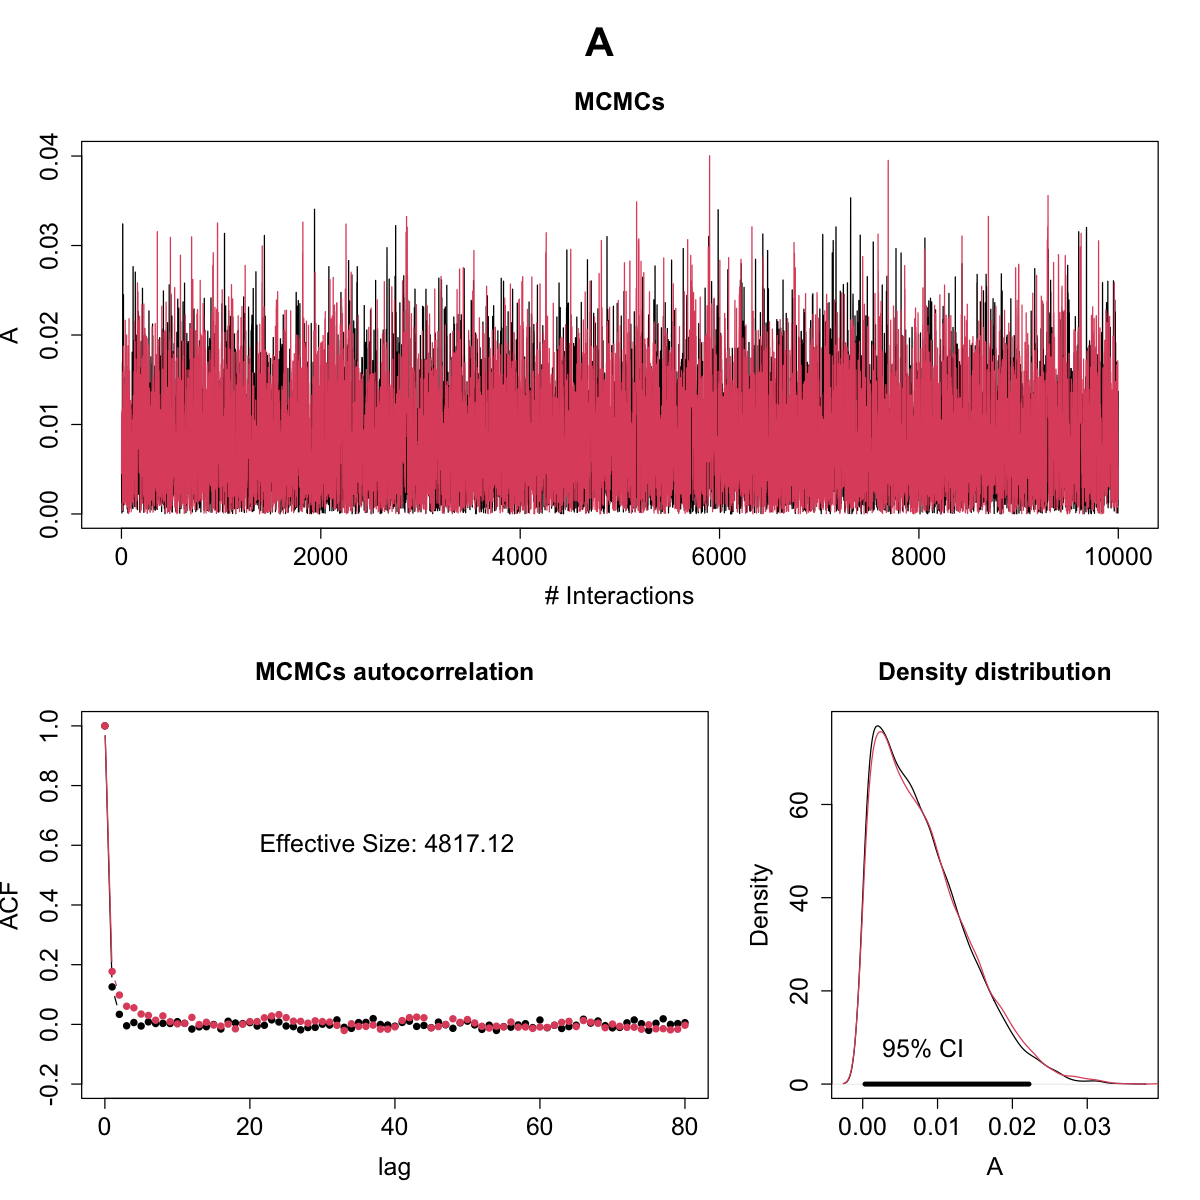

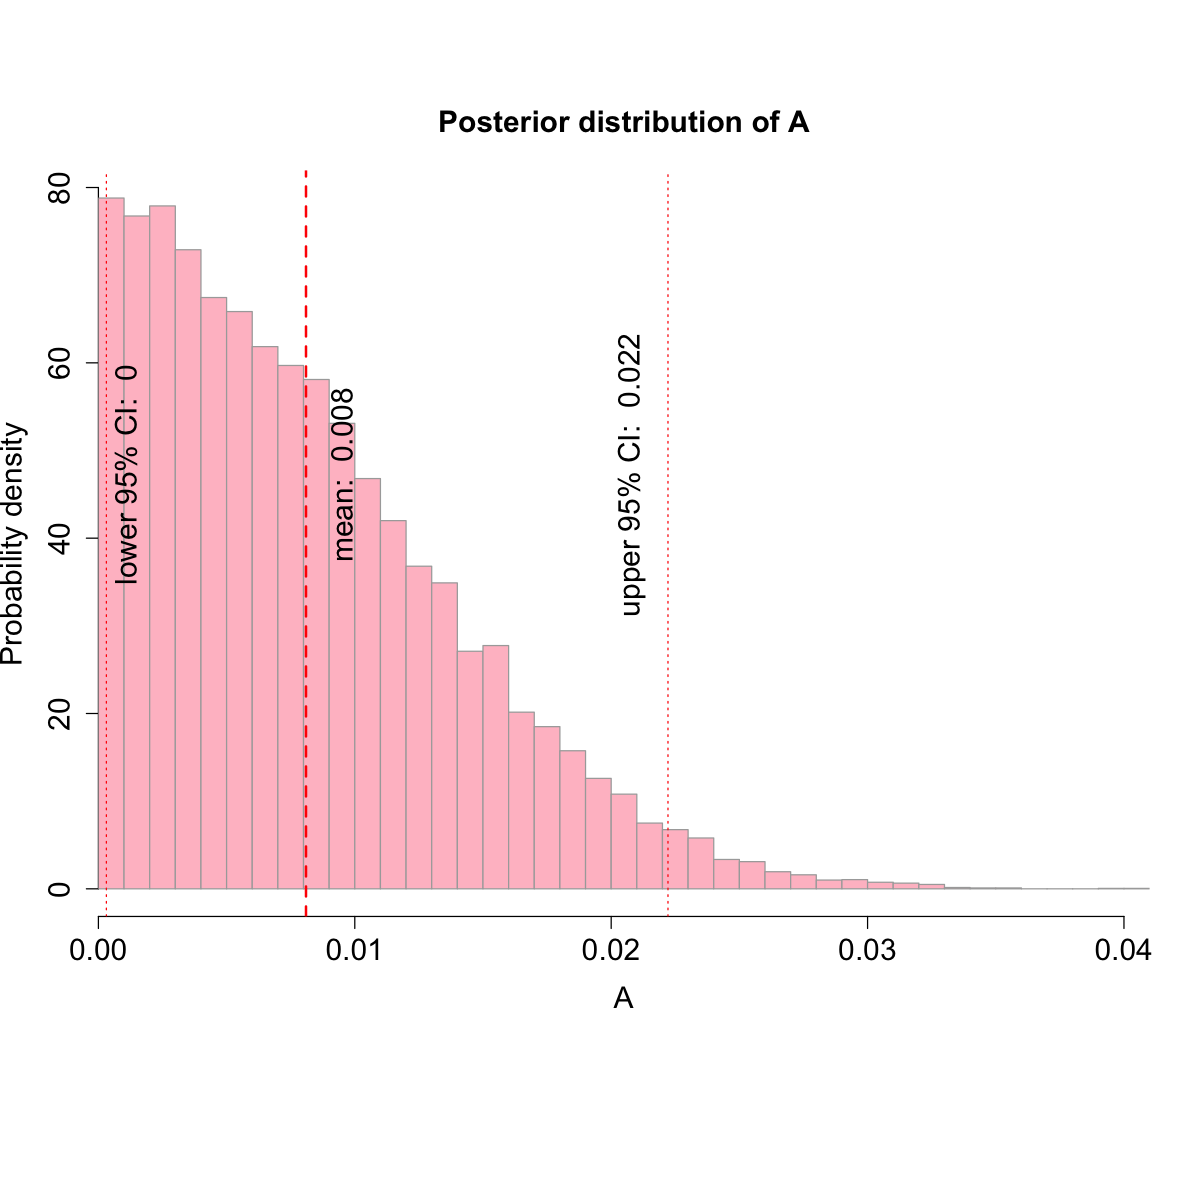

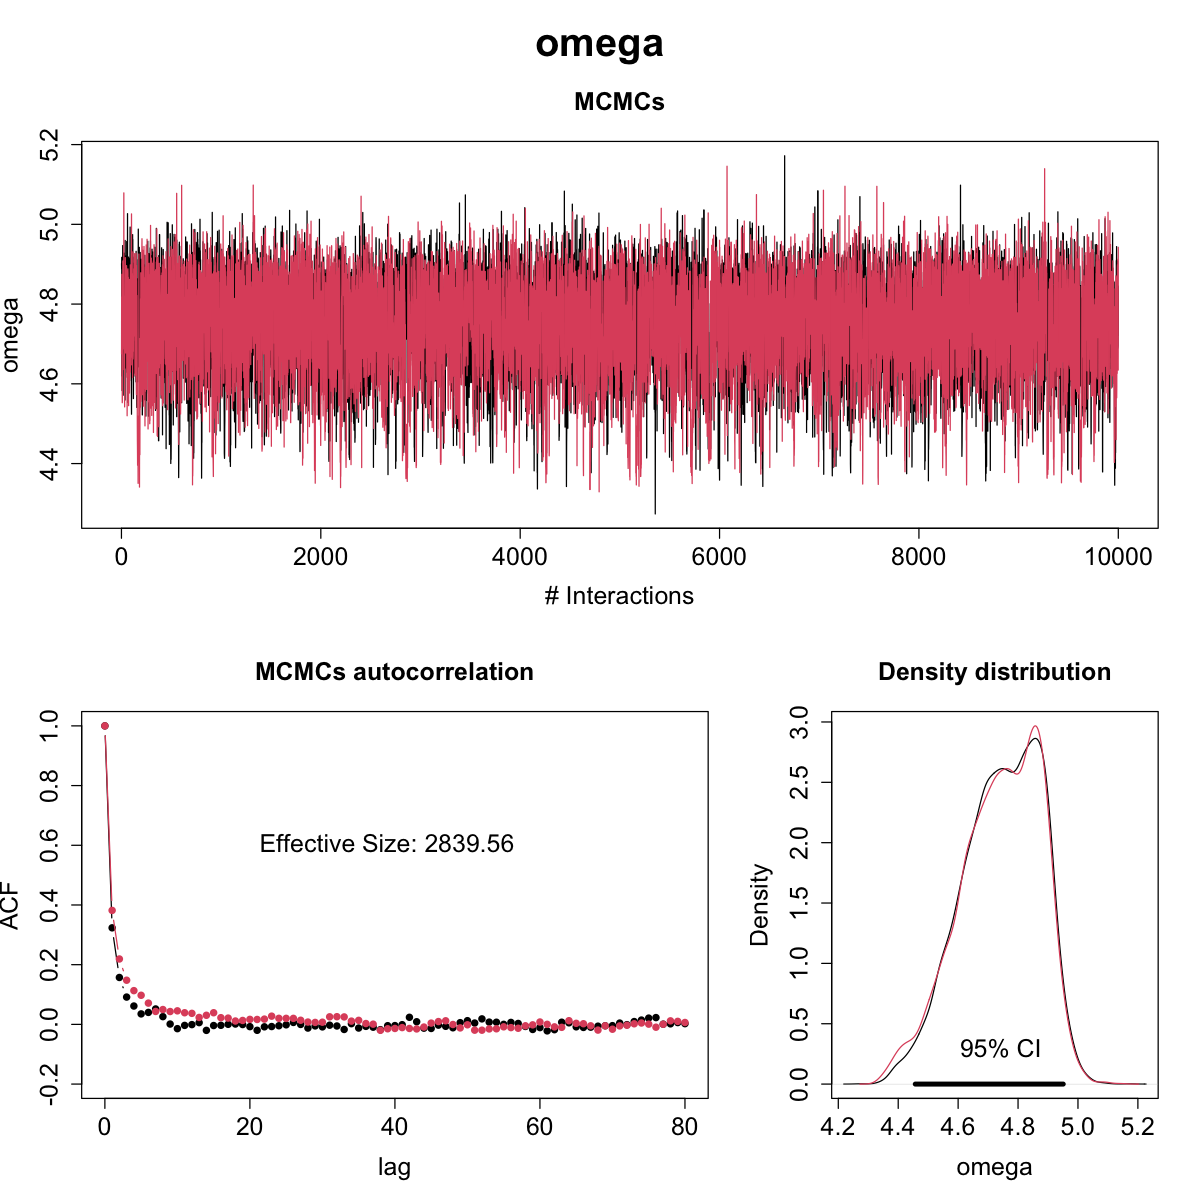

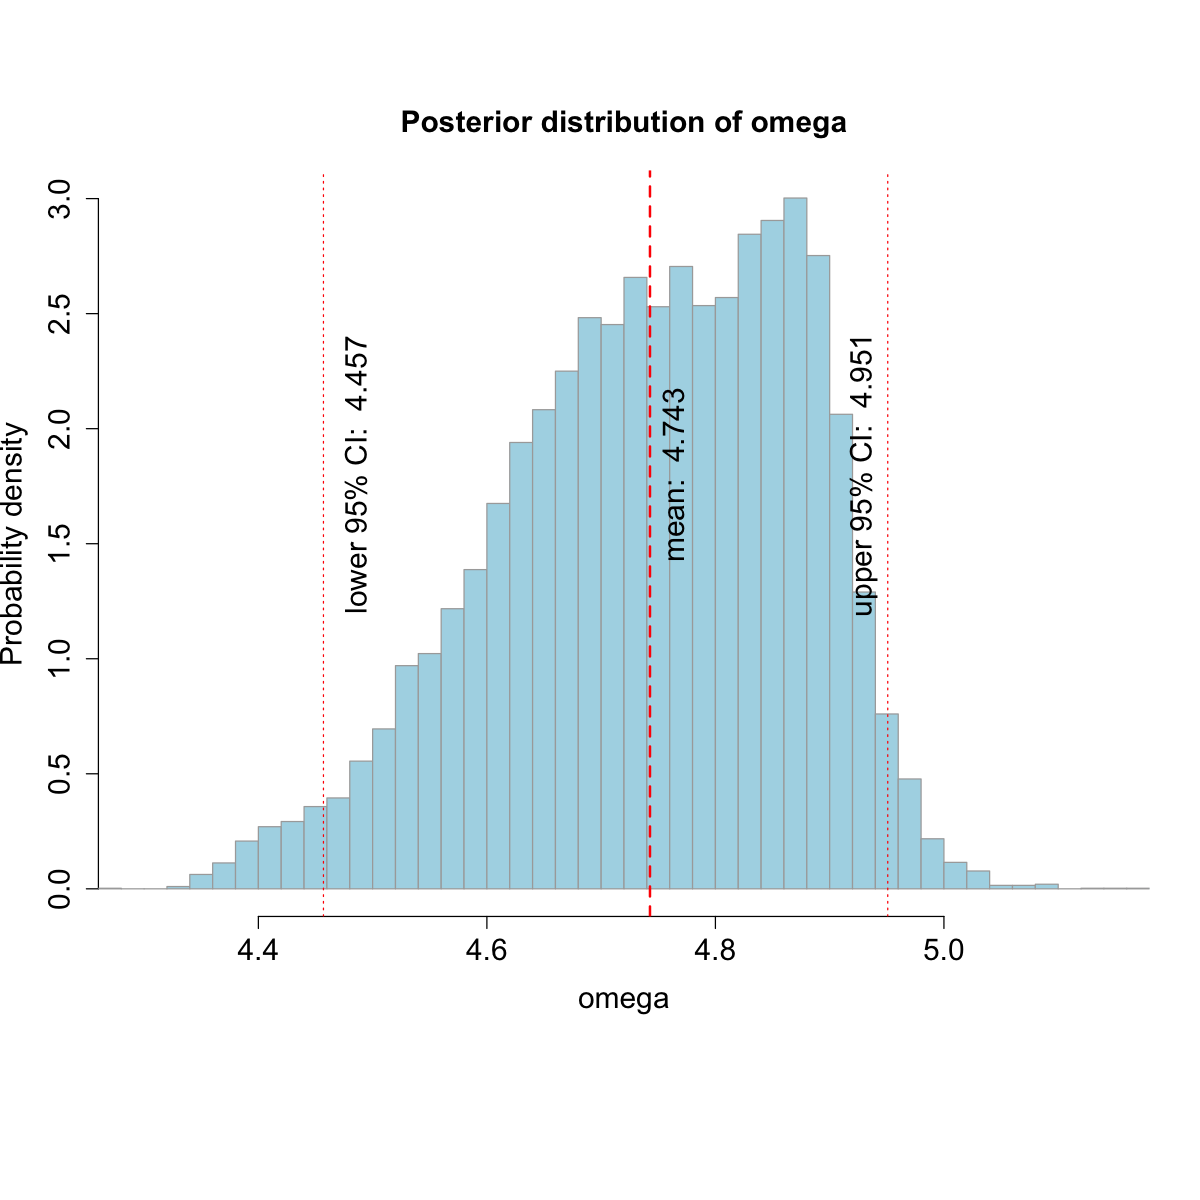

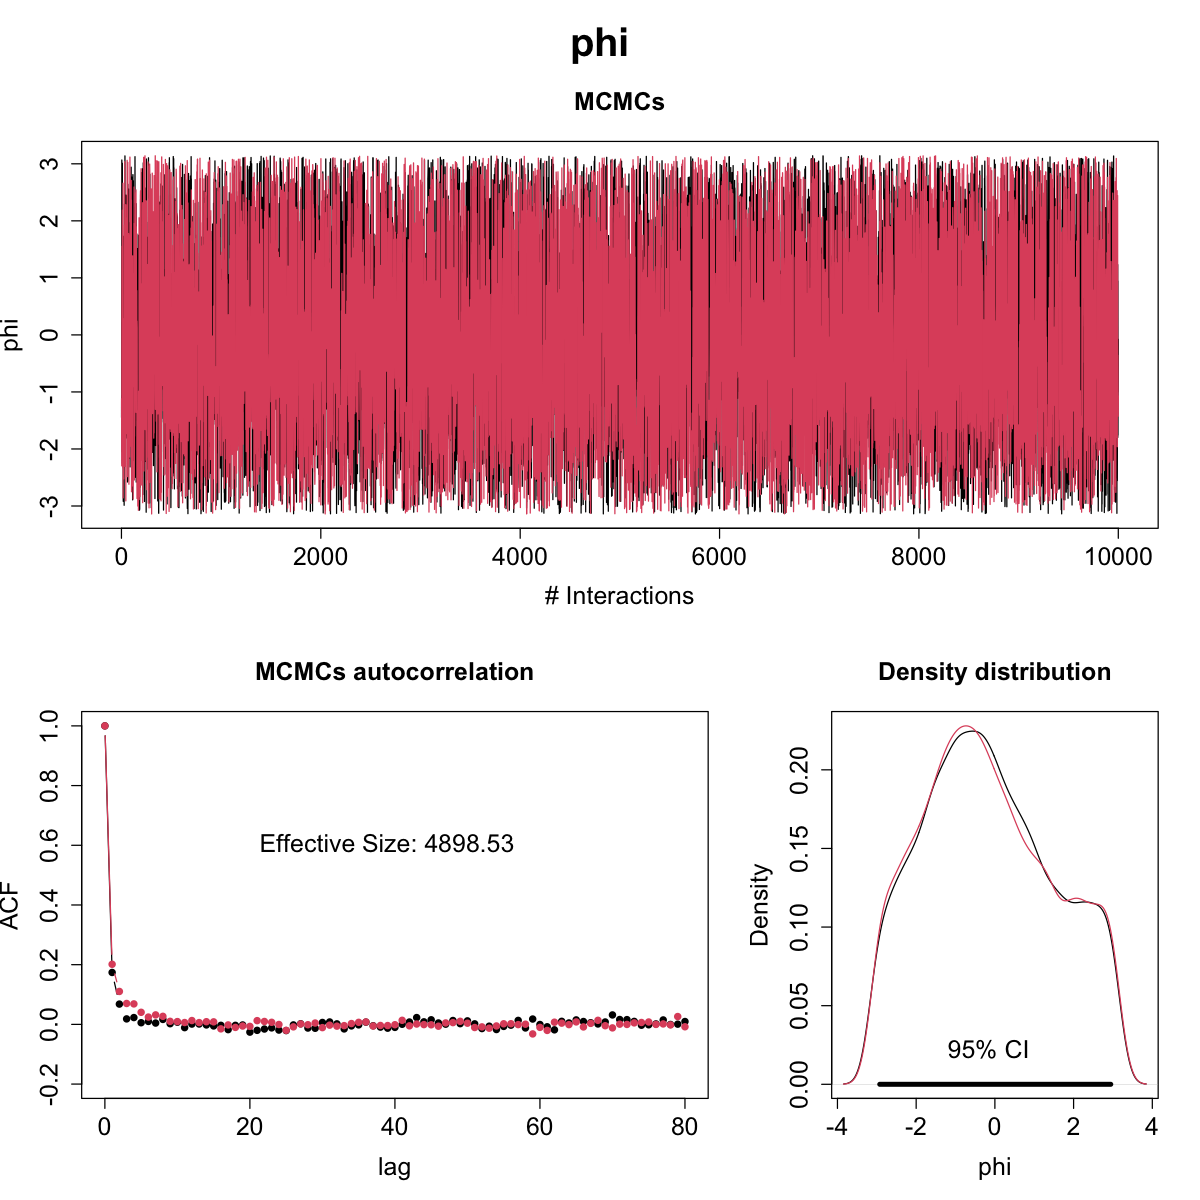

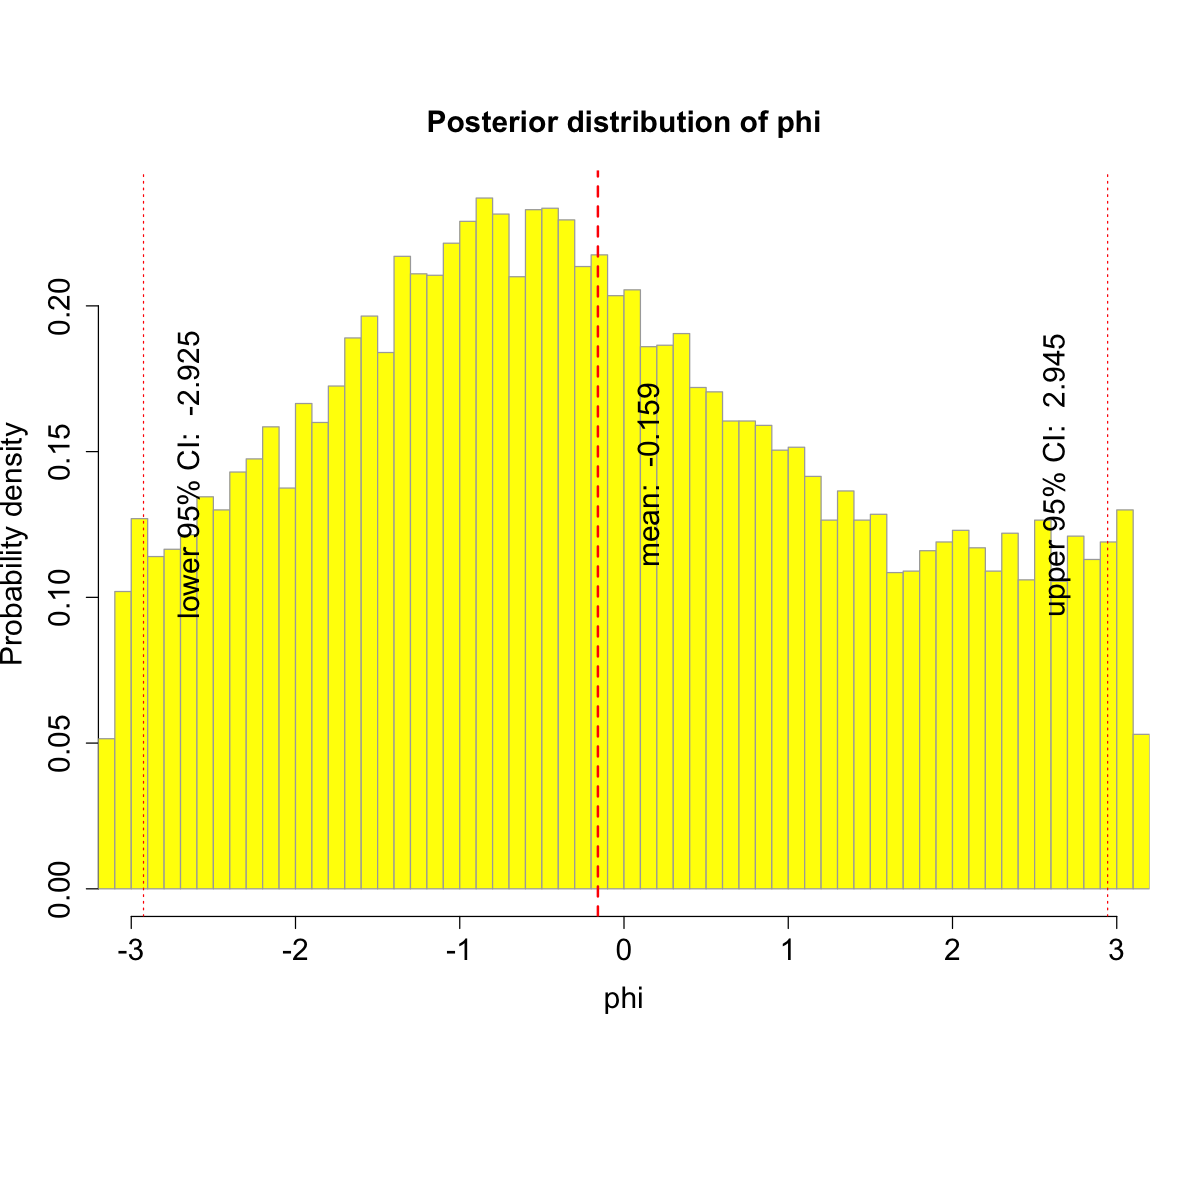

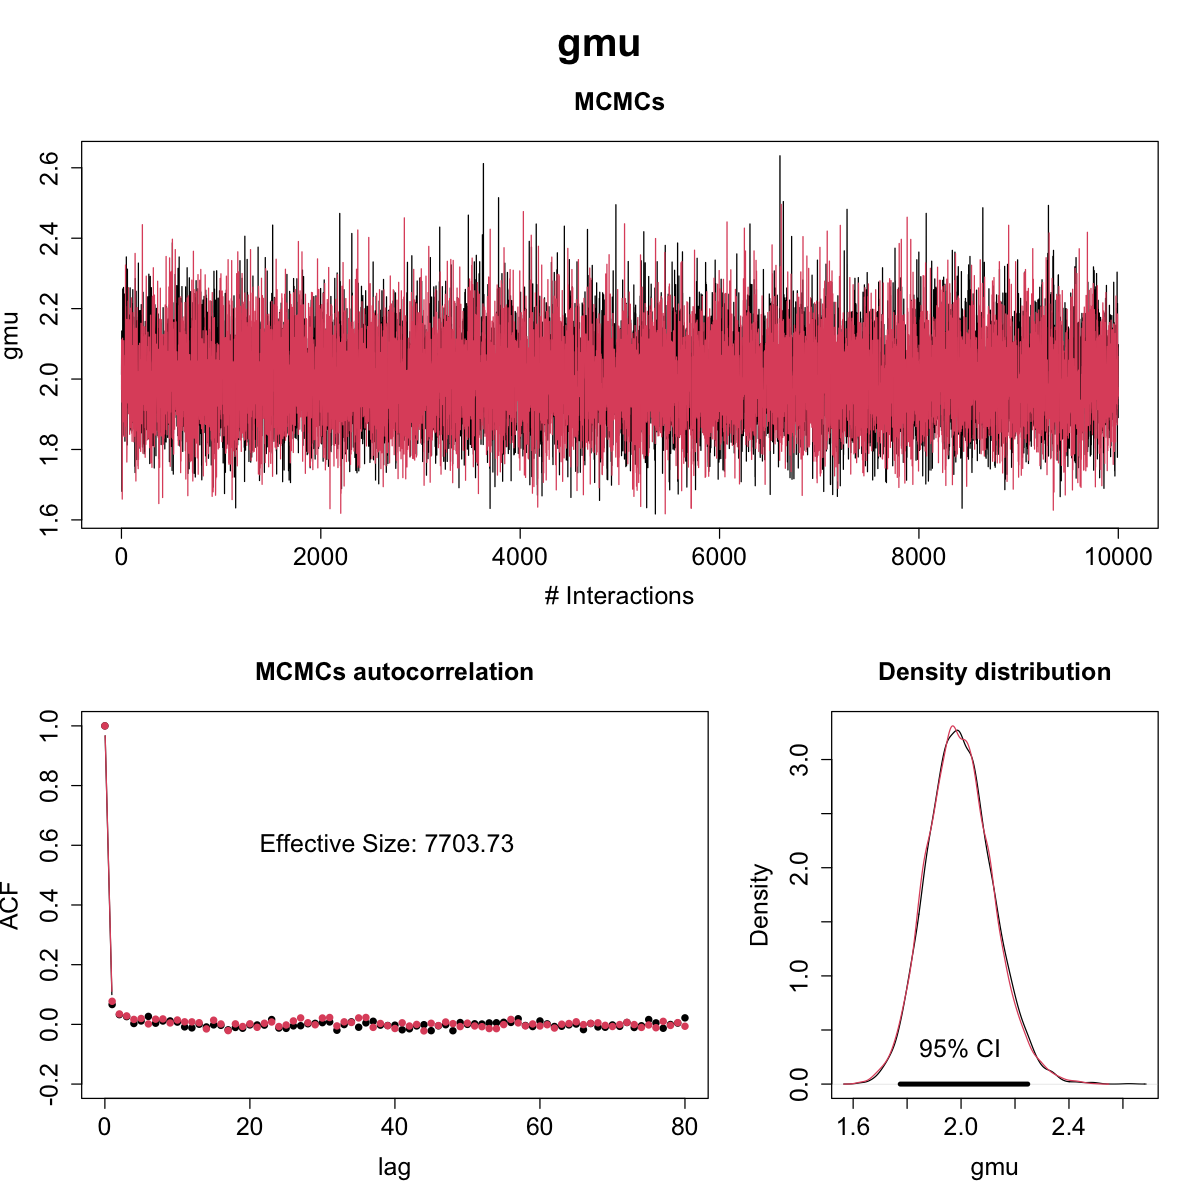

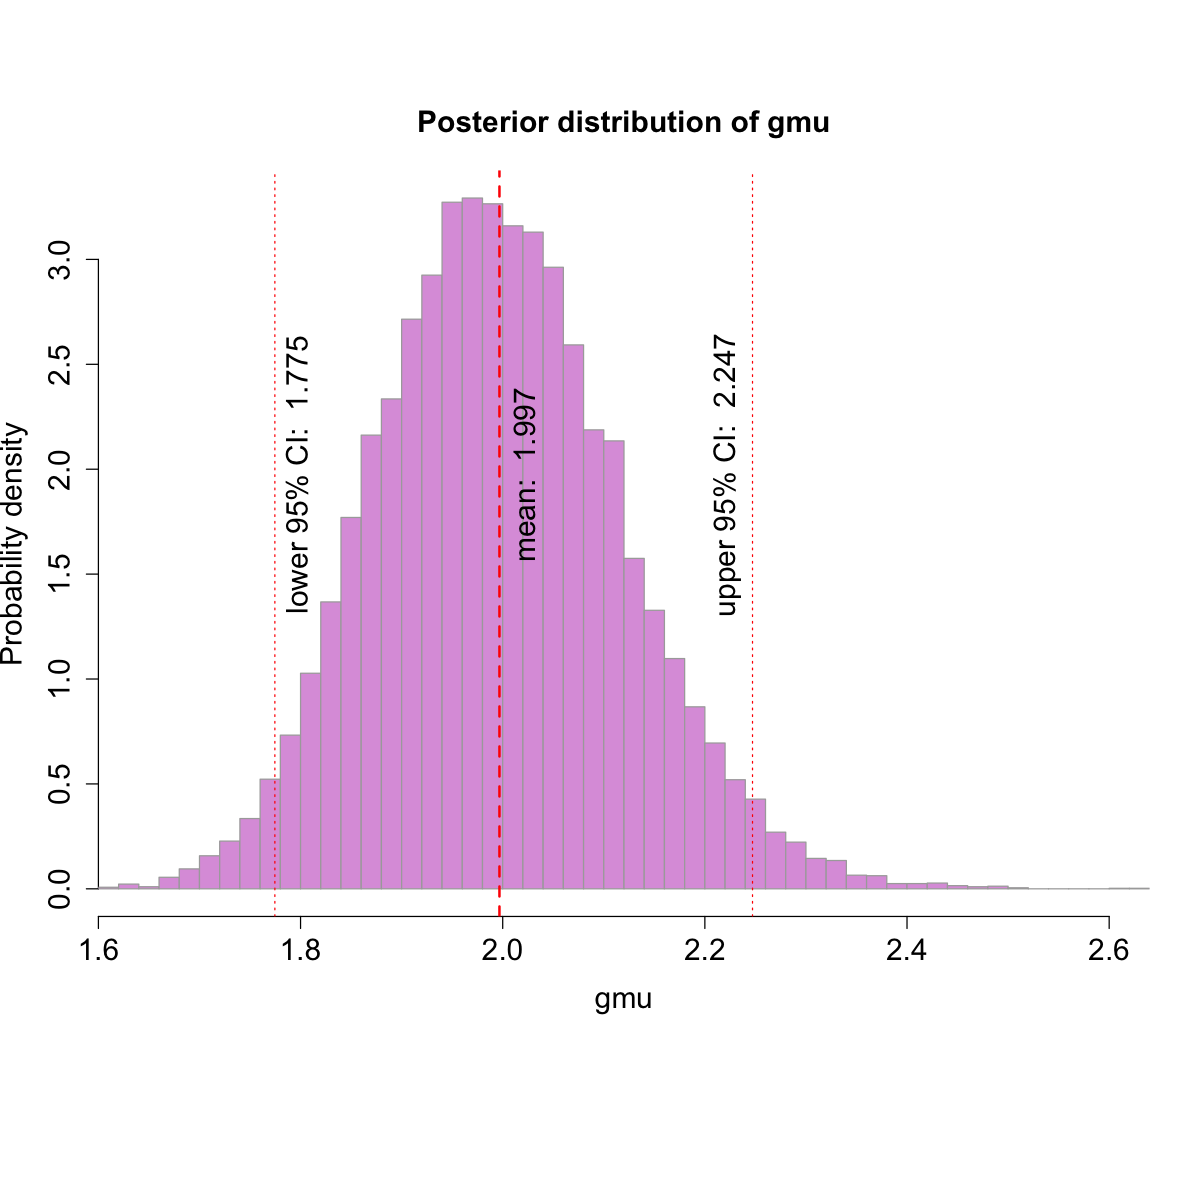

In [25]:
#Sample from jags markov chain
which.model <- 2
samples <- analysis.bayes.rjags(model.string = NULL, data.list = data.jags[[which.model]], which.model = which.model, nIter = 50000, nChains = 2, thin = 5)

#Using the same plotting function as STAN, converting into correct format
JAGS_B_array.mcmc <- mcmc.list.to.array(samples)
PlotPosteriorParam(JAGS_B_array.mcmc, which.model = which.model)

# Comparison between STAN and JAGS posterior distribution

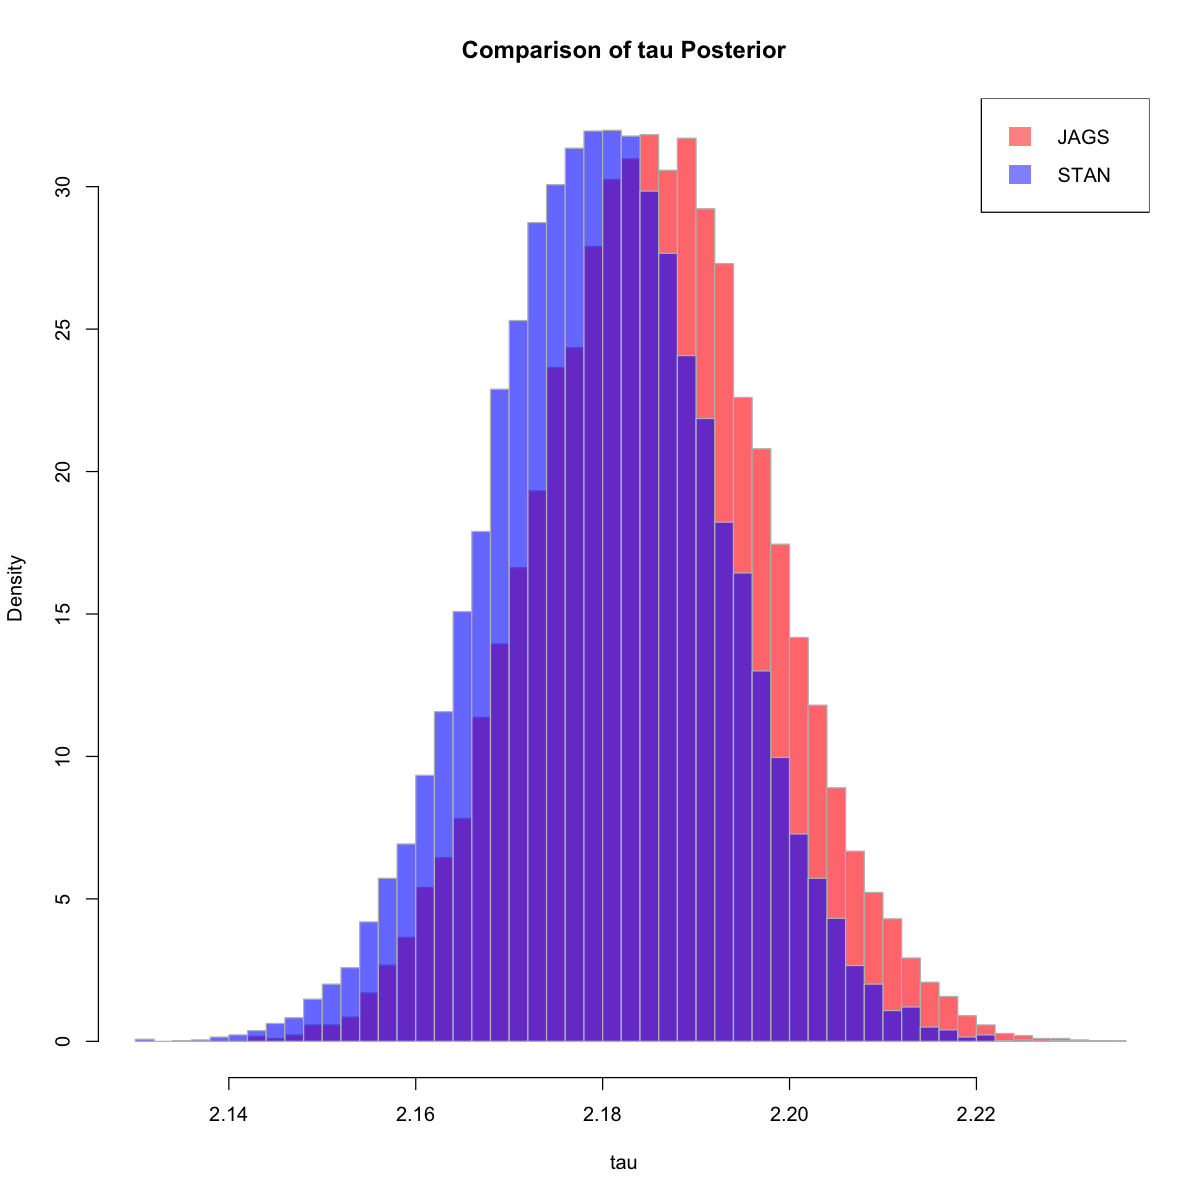

In [26]:
hist(JAGS_NoB_array.mcmc[, , 'tau'], 
     col = rgb(1, 0, 0, 0.6),  # red, 50% transparent
     border = "gray",
     xlim = range(c(JAGS_NoB_array.mcmc[, , 'tau'], STAN_NoB_array.mcmc[, , 'tau'])),
     breaks = 50,
     main = "Comparison of tau Posterior",
     xlab = "tau",
     freq = FALSE)

hist(STAN_NoB_array.mcmc[, , 'tau'], 
     col = rgb(0, 0, 1, 0.6),  # blue, 50% transparent
     border = "gray",
     add = TRUE,
     freq = FALSE,
     breaks = 50)
legend("topright", legend = c("JAGS", "STAN"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)),
       border = NA)

In [27]:
hist(JAGS_B_array.mcmc[, , 'g_mu'], 
     col = rgb(1, 0, 0, 0.6),  # red, 50% transparent
     border = "white",
     xlim = range(c(JAGS_B_array.mcmc[, , 'g_mu'], STAN_B_array.mcmc[, , 'g_mu'])),
     breaks = 50,
     main = "Comparison of g_mu Posterior",
     xlab = "g_mu",
     freq = FALSE)

hist(STAN_B_array.mcmc[, , 'g_mu'], 
     col = rgb(0, 0, 1, 0.6),  # blue, 50% transparent
     border = "white",
     add = TRUE,
     freq = FALSE,
     breaks = 50)
legend("topright", legend = c("JAGS", "STAN"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)),
       border = NA)

ERROR: Error in JAGS_B_array.mcmc[, , "g_mu"]: subscript out of bounds


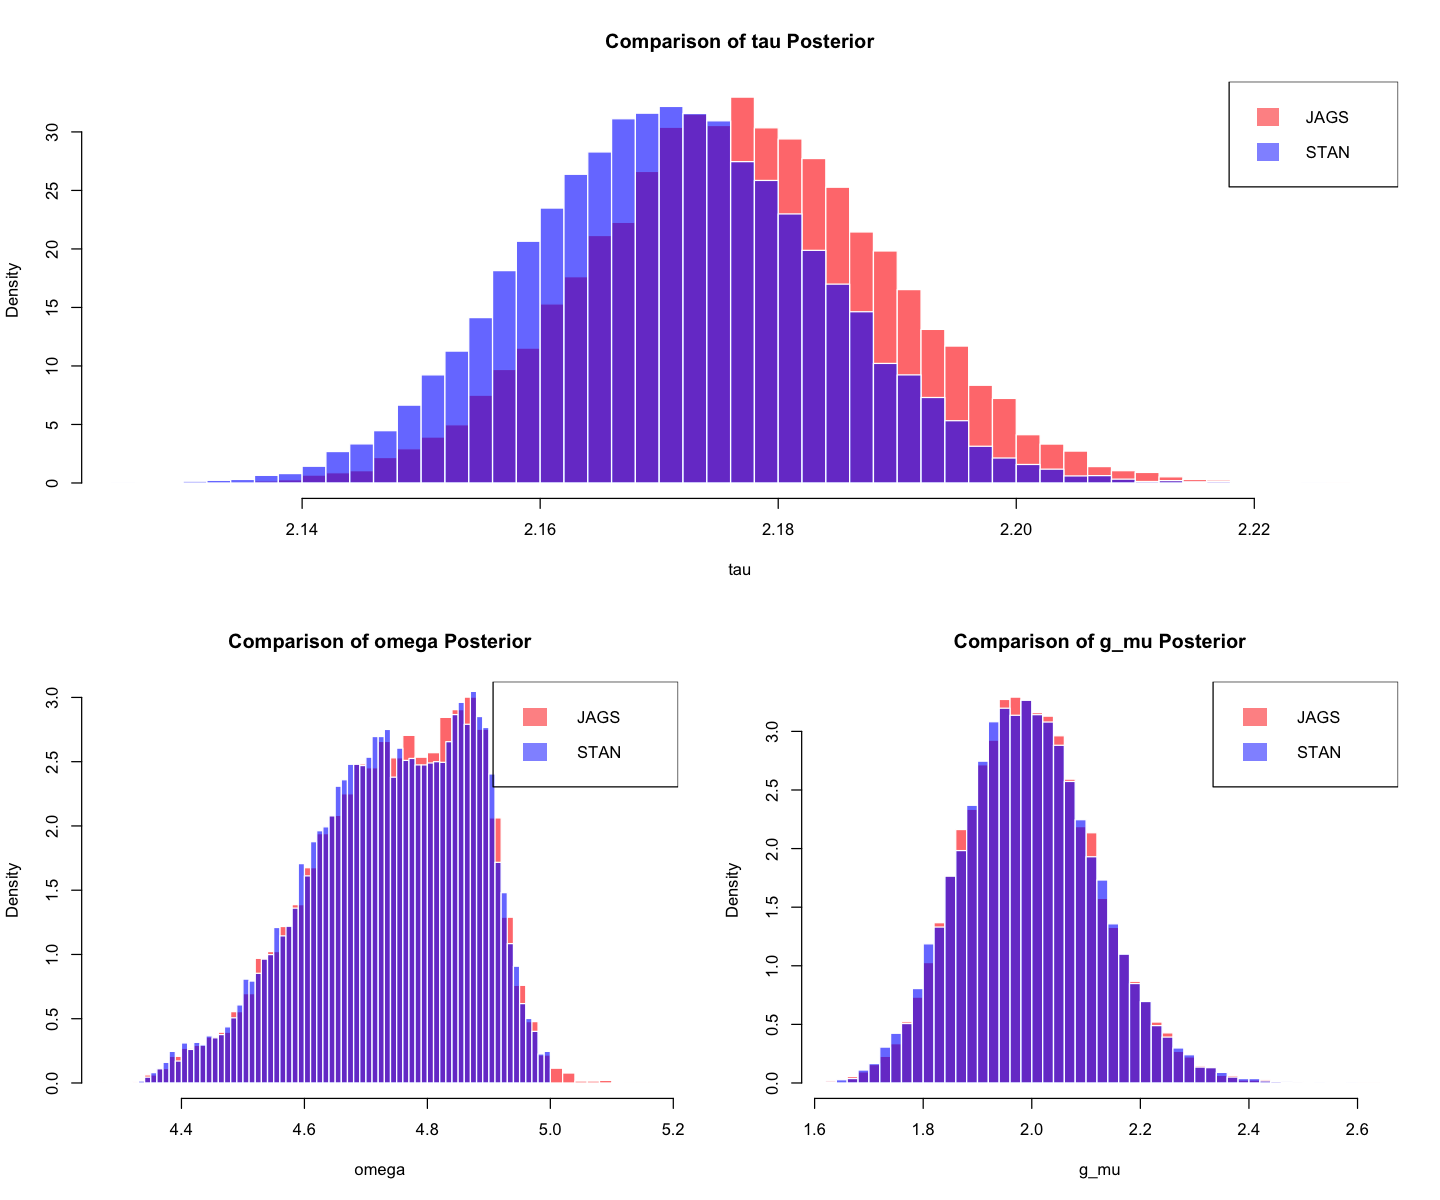

In [28]:
layout(matrix(c(1, 1, 2, 3), nrow = 2, byrow = TRUE))
options(repr.plot.width = 12, repr.plot.height = 10)


hist(JAGS_B_array.mcmc[, , 'tau'], 
     col = rgb(1, 0, 0, 0.6),  # red, 50% transparent
     border = "white",
     xlim = range(c(JAGS_B_array.mcmc[, , 'tau'], STAN_B_array.mcmc[, , 'tau'])),
     breaks = 50,
     main = "Comparison of tau Posterior",
     xlab = "tau",
     freq = FALSE)

hist(STAN_B_array.mcmc[, , 'tau'], 
     col = rgb(0, 0, 1, 0.6),  # blue, 50% transparent
     border = "white",
     add = TRUE,
     freq = FALSE,
     breaks = 50)
legend("topright", legend = c("JAGS", "STAN"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)),
       border = NA)


hist(JAGS_B_array.mcmc[, , 'omega'], 
     col = rgb(1, 0, 0, 0.6),  # red, 50% transparent
     border = "white",
     xlim = range(c(JAGS_B_array.mcmc[, , 'omega'], STAN_B_array.mcmc[, , 'omega'])),
     breaks = 50,
     main = "Comparison of omega Posterior",
     xlab = "omega",
     freq = FALSE)

hist(STAN_B_array.mcmc[, , 'omega'], 
     col = rgb(0, 0, 1, 0.6),  # blue, 50% transparent
     border = "white",
     add = TRUE,
     freq = FALSE,
     breaks = 50)
legend("topright", legend = c("JAGS", "STAN"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)),
       border = NA)


hist(JAGS_B_array.mcmc[, , 'gmu'], 
     col = rgb(1, 0, 0, 0.6),  # red, 50% transparent
     border = "white",
     xlim = range(c(JAGS_B_array.mcmc[, , 'gmu'], STAN_B_array.mcmc[, , 'gmu'])),
     breaks = 50,
     main = "Comparison of g_mu Posterior",
     xlab = "g_mu",
     freq = FALSE)

hist(STAN_B_array.mcmc[, , 'gmu'], 
     col = rgb(0, 0, 1, 0.6),  # blue, 50% transparent
     border = "white",
     add = TRUE,
     freq = FALSE,
     breaks = 50)
legend("topright", legend = c("JAGS", "STAN"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)),
       border = NA)

# FREQUENTIS APPROACH

## Maximum Likelihood Estimation

Given data points:

$$
\{(t_i, y_i, \sigma_i)\}_{i=1}^n
$$

We assume each observation is drawn from a Gaussian distribution:

$$
y_i \sim \mathcal{N}(N_i(\theta), \sigma_i^2)
$$

Where the model prediction $N_i(\theta)$ depends on the presence or not of a magnetic field:

- **Without magnetic field (B = 0):**

$$
N_i(\theta) = N_0 \, e^{-t_i / \tau}
$$

with parameters $\theta = \{N_0, \tau\}$.

- **With magnetic field (B ≠ 0):**

$$
N_i(\theta) = N_0 \, e^{-t_i / \tau} \left[ 1 + A \cos(\omega t_i + \phi) \right]
$$

with parameters $\theta = \{N_0, \tau, A, \omega, \phi\}$.

Then, the log-likelihood function to maximize is (computationally we minimize the negative log-likelihood):

$$
\log \mathcal{L}(\theta) = -\frac{1}{2} \sum_{i=1}^n \left[ \log(2\pi \sigma_i^2) + \frac{(y_i - N_i(\theta))^2}{\sigma_i^2} \right]
$$

The covariance matrix of the estimated parameters is approximated by the inverse of the Hessian of the negative log-likelihood:

$$
\text{Cov}(\hat{\theta}) \approx \left[ \nabla^2 (-\log \mathcal{L}(\theta)) \right]^{-1}_{\theta = \hat{\theta}}
$$

The uncertainty on each parameter $\theta_i$ is estimated by:

$$
\sigma_{\theta_i} \approx \sqrt{ \text{Cov}_{ii} }
$$

---

Finally, the muon $g$-factor is computed using the Larmor relation:

$$
g_\mu = \frac{2 m_\mu \omega}{e B}
$$

The uncertainty on $g_\mu$ is computed by standard error propagation:

$$
\sigma_{g_\mu} = \sqrt{
\left( \frac{\partial g_\mu}{\partial \omega} \cdot \sigma_\omega \right)^2 +
\left( \frac{\partial g_\mu}{\partial B} \cdot \sigma_B \right)^2
}
= \sqrt{
\left( \frac{2 m_\mu}{e B} \cdot \sigma_\omega \right)^2 +
\left( \frac{2 m_\mu \omega}{e B^2} \cdot \sigma_B \right)^2
}
= g_\mu \cdot \sqrt{
\left( \frac{\sigma_\omega}{\omega} \right)^2 +
\left( \frac{\sigma_B}{B} \right)^2
}
$$

=== Fit without magnetic field ===
tau = 2.192452 <U+00B1> 0.01263025 
Covariance matrix (no B):
            N0           tau
N0  49.8656800 -0.0667952986
tau -0.0667953  0.0001595232

=== Fit with magnetic field ===
tau   = 2.202936 <U+00B1> 0.012891 
omega = 4.655957 <U+00B1> 0.1931039 
g_mu  = 1.95485 <U+00B1> 0.1324407 
Covariance matrix (with B):
                N0           tau             A         omega          phi
N0    53.366040497 -7.164542e-02 -2.570127e-03 -2.157799e-01  0.970164628
tau   -0.071645420  1.661779e-04  4.562958e-06  2.316610e-04 -0.001214183
A     -0.002570127  4.562958e-06  4.315308e-05 -6.668561e-05  0.000245762
omega -0.215779929  2.316610e-04 -6.668561e-05  3.728910e-02 -0.071587725
phi    0.970164628 -1.214183e-03  2.457620e-04 -7.158773e-02  0.289321838


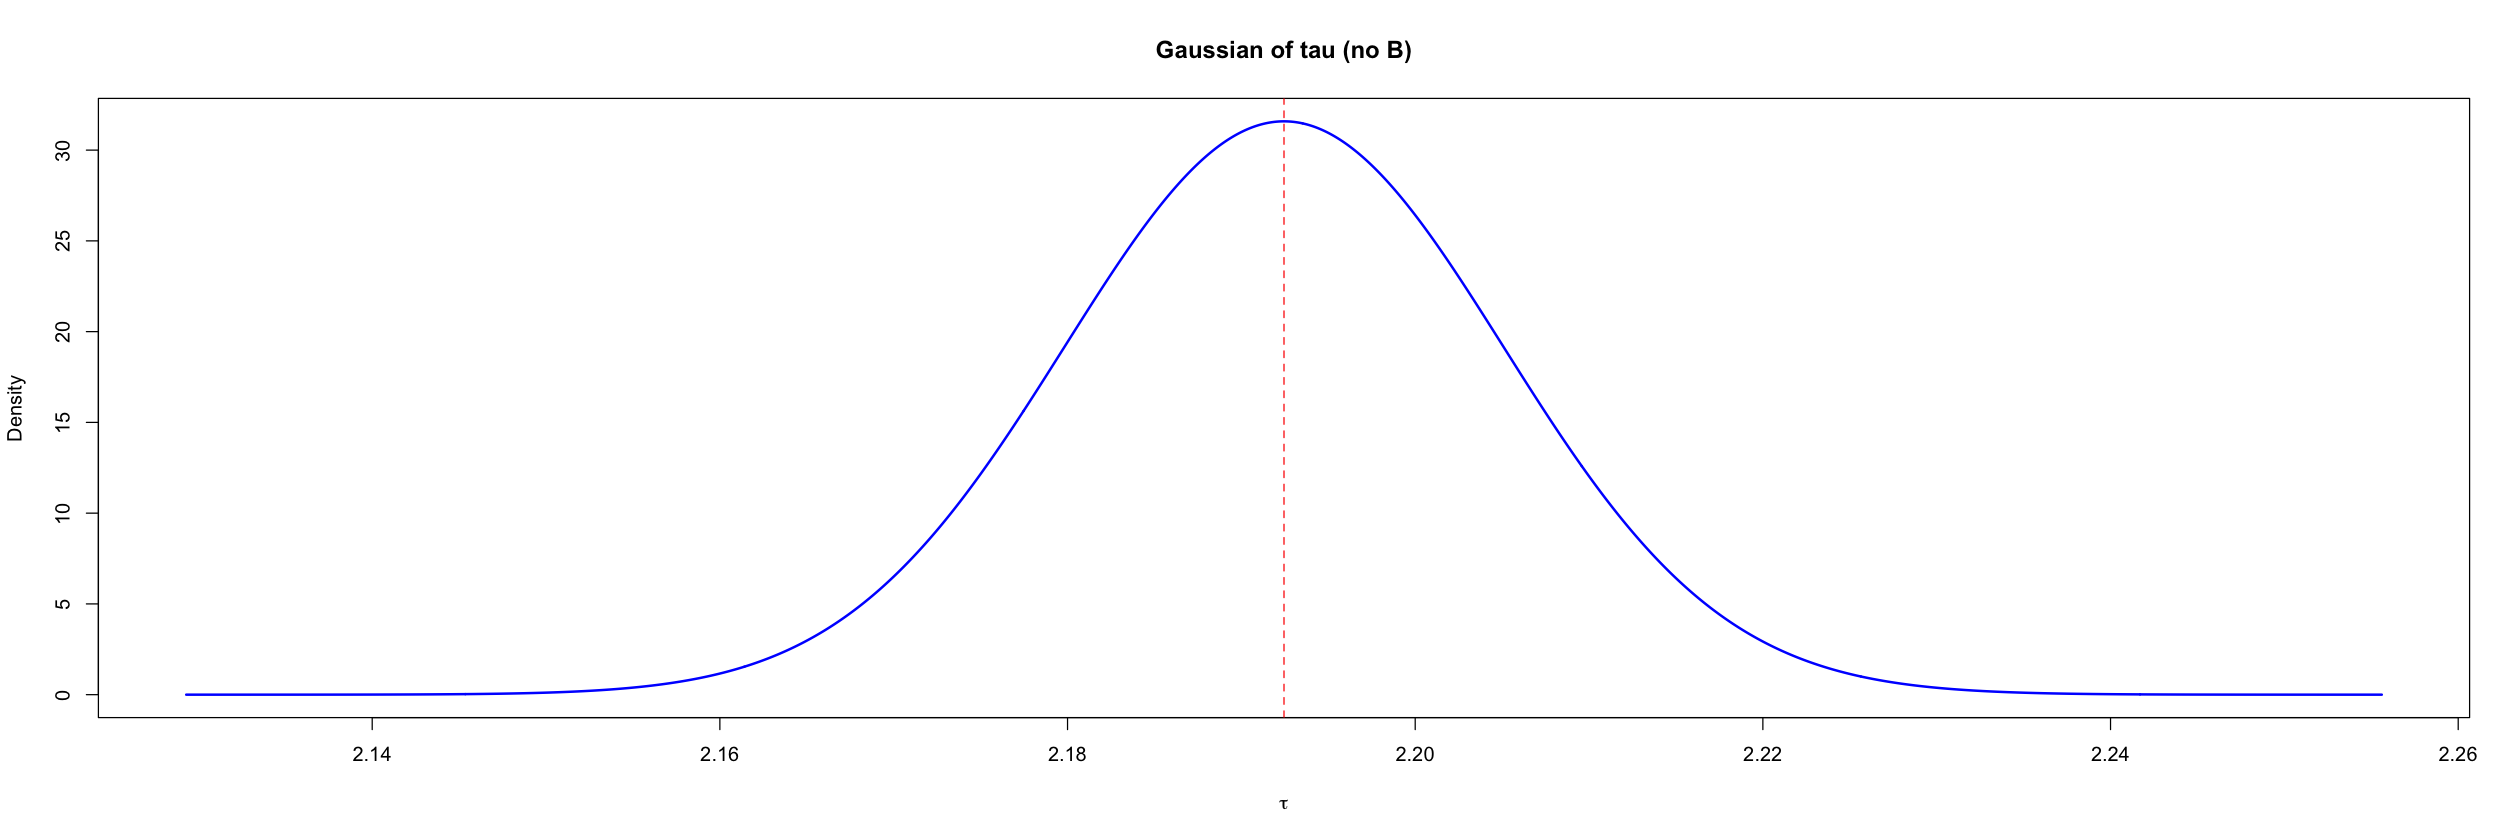

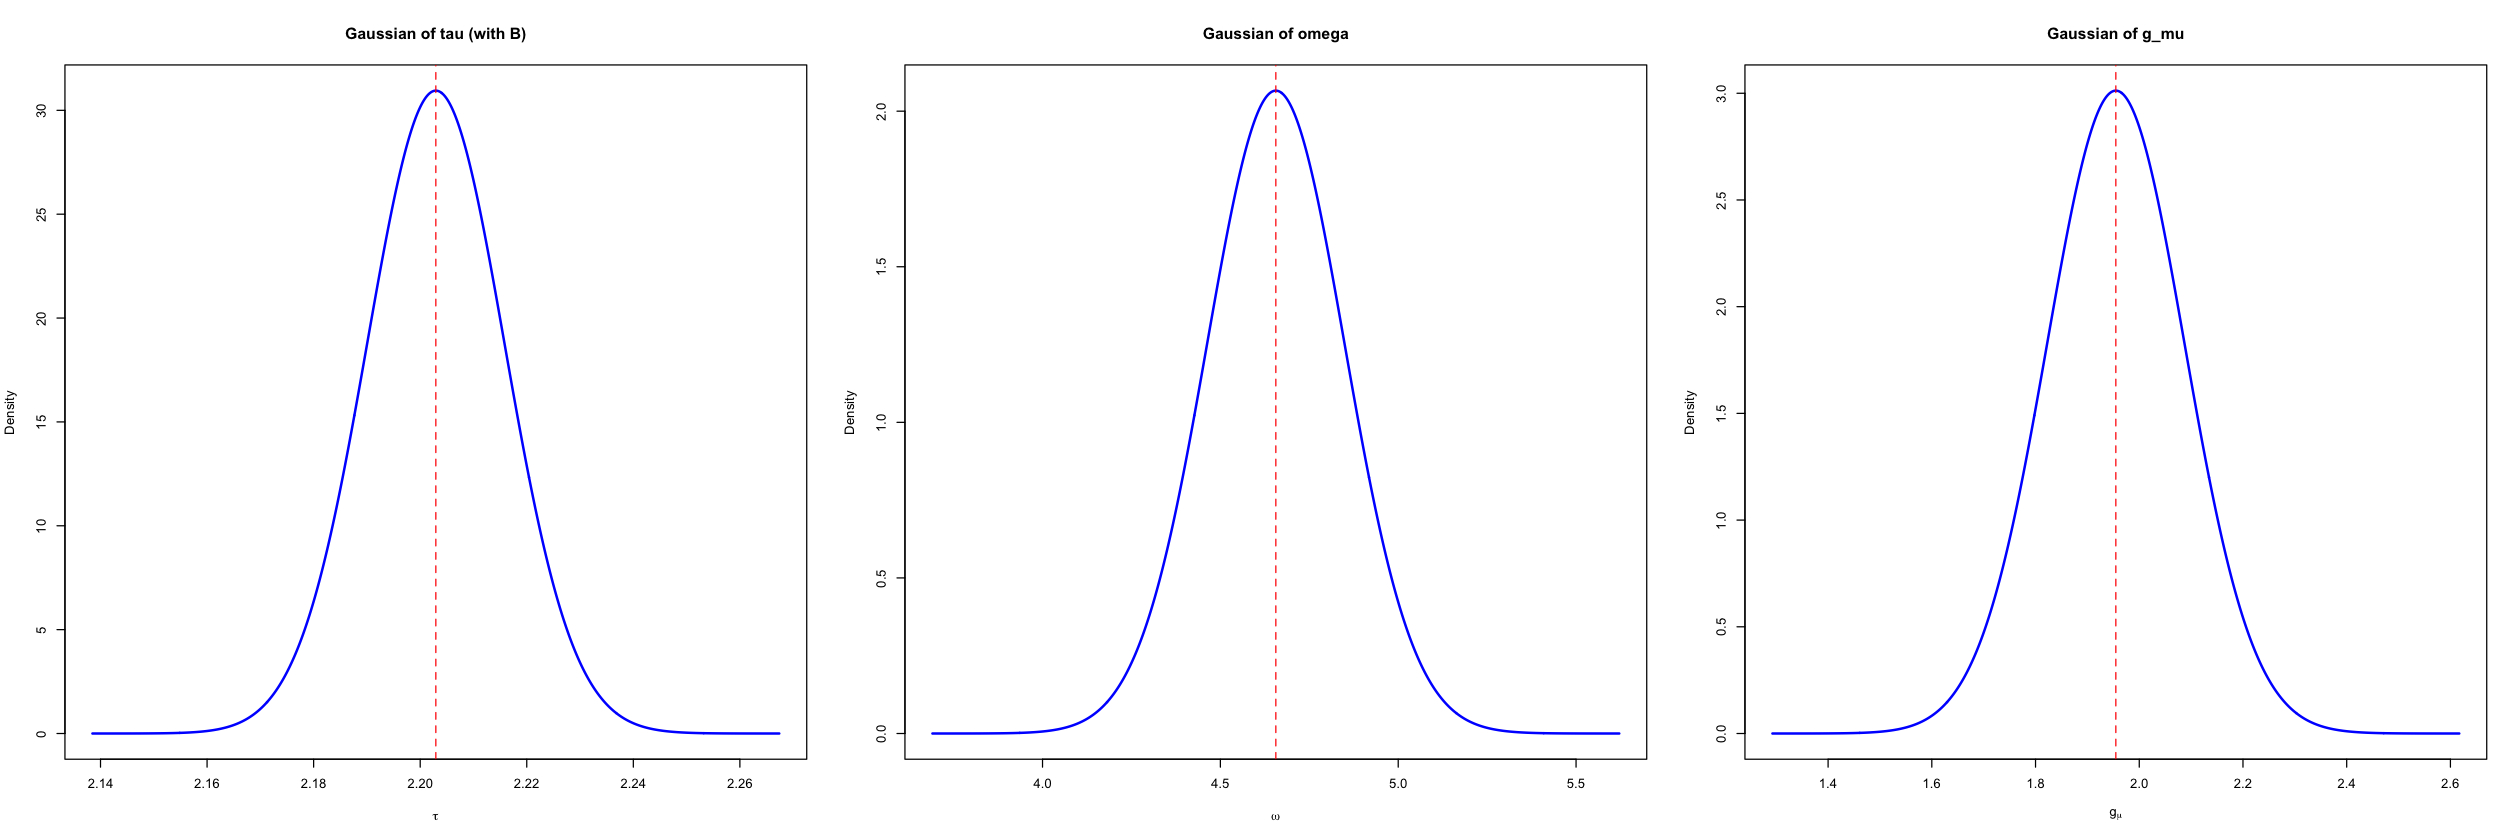

In [104]:
# ---------- NO MAGNETIC FIELD ----------
neglogL_noB <- function(par, t, y, s) {
  N0 <- par[1]; tau <- par[2]
  N <- N0 * exp(-t / tau)
  sum((y - N)^2 / s^2 + log(2 * pi * s^2)) / 2
}
options(repr.plot.width = 21, repr.plot.height = 7)


fit_noB <- optim(c(1000, 2), neglogL_noB, t = data.noB$t, y = data.noB$y, s = data.noB$s,
                 method = "L-BFGS-B", lower = c(1e-6, 1e-6), hessian = TRUE)

params_noB <- fit_noB$par
stderr_noB <- sqrt(diag(solve(fit_noB$hessian)))
cov_noB <- solve(fit_noB$hessian)
names(params_noB ) <- c("N0", "tau")
colnames(cov_noB) <- rownames(cov_noB) <- names(params_noB)


# ---------- WITH MAGNETIC FIELD ----------
neglogL_B <- function(par, t, y, s) {
  N0 <- par[1]; tau <- par[2]; A <- par[3]; omega <- par[4]; phi <- par[5]
  N <- N0 * exp(-t / tau) * (1 + A * cos(omega * t + phi))
  sum((y - N)^2 / s^2 + log(2 * pi * s^2)) / 2
}

start <- c(1000, 2, 0.2, 5, 0)
fit_B <- optim(start, neglogL_B, t = data.withB$t, y = data.withB$y, s = data.withB$s,
               method = "L-BFGS-B",
               lower = c(1e-6, 1e-6, -1, 4, -pi), upper = c(Inf, Inf, 1, 6, pi),
               hessian = TRUE)

params_B <- fit_B$par
stderr_B <- sqrt(diag(solve(fit_B$hessian)))
cov_B <- solve(fit_B$hessian)

names(params_B) <- c("N0", "tau", "A", "omega", "phi")
names(stderr_B) <- c("N0", "tau", "A", "omega", "phi")
colnames(cov_B) <- rownames(cov_B) <- names(params_B)

# ---------- g_mu computation ----------
omega <- params_B["omega"] * 1e6  # MHz to Hz
omega_err <- stderr_B["omega"] * 1e6

B_mean <- 5.6e-3  # Tesla
B_sigma <- 0.3e-3

g_mu <- (2 * MASS.kg * omega) / (e * B_mean)
# Propagation of uncertainty
g_mu_err <- g_mu*sqrt((omega_err/omega)^2 + (B_sigma/B_mean)^2)

# ---------- OUTPUT ----------
cat("=== Fit without magnetic field ===\n")
cat("tau =", params_noB[2], "±", stderr_noB[2], "\n")
cat("Covariance matrix (no B):\n")
print(cov_noB)

cat("\n=== Fit with magnetic field ===\n")
cat("tau   =", params_B["tau"], "±", stderr_B["tau"], "\n")
cat("omega =", params_B["omega"], "±", stderr_B["omega"], "\n")
cat("g_mu  =", g_mu, "±", g_mu_err, "\n")
cat("Covariance matrix (with B):\n")
print(cov_B)

# ---------- PLOTS ----------
plot_gaussian <- function(mu, sigma, label, xlab) {
  x <- seq(mu - 5*sigma, mu + 5*sigma, length.out = 1000)
  y <- dnorm(x, mean = mu, sd = sigma)
  plot(x, y, type = "l", col = "blue", lwd = 2, main = paste("Gaussian of", label),
       xlab = xlab, ylab = "Density")
  abline(v = mu, col = "red", lty = 2)
}

# Plot for no B: tau
plot_gaussian(params_noB[2], stderr_noB[2], "tau (no B)", expression(tau))


# Plot for B: tau, omega, g_mu
par(mfrow = c(1, 3))
plot_gaussian(params_B["tau"], stderr_B["tau"], "tau (with B)", expression(tau))
plot_gaussian(params_B["omega"], stderr_B["omega"], "omega", expression(omega))
plot_gaussian(g_mu, g_mu_err, "g_mu", expression(g[mu]))
par(mfrow = c(1,1))

# COMPARISON OF THE CREDIBILITY INTERVAL

In [105]:
NO_B_FreqTau <- c(params_noB['tau'], stderr_noB[2])
NO_B_StanTau <- c(mean(STAN_NoB_array.mcmc[, , 'tau']), quantile(STAN_NoB_array.mcmc[, , 'tau'], c(0.025, 0.975)))
NO_B_JagsTau <- c(mean(JAGS_NoB_array.mcmc[, , 'tau']), quantile(JAGS_NoB_array.mcmc[, , 'tau'], c(0.025, 0.975)))


B_FreqTau <- c(params_B['tau'], stderr_B[2])
B_StanTau <- c(mean(STAN_B_array.mcmc[, , 'tau']), quantile(STAN_B_array.mcmc[, , 'tau'], c(0.025, 0.975)))
B_JagsTau <- c(mean(JAGS_B_array.mcmc[, , 'tau']), quantile(JAGS_B_array.mcmc[, , 'tau'], c(0.025, 0.975)))


B_Freqomega <- c(params_B['omega'], stderr_B[2])
B_Stanomega <- c(mean(STAN_B_array.mcmc[, , 'omega']), quantile(STAN_B_array.mcmc[, , 'omega'], c(0.025, 0.975)))
B_Jagsomega <- c(mean(JAGS_B_array.mcmc[, , 'omega']), quantile(JAGS_B_array.mcmc[, , 'omega'], c(0.025, 0.975)))

B_Freqgmu <- c(g_mu, g_mu_err)
B_Stangmu <- c(mean(STAN_B_array.mcmc[, , 'gmu']), quantile(STAN_B_array.mcmc[, , 'gmu'], c(0.025, 0.975)))
B_Jagsgmu <- c(mean(JAGS_B_array.mcmc[, , 'gmu']), quantile(JAGS_B_array.mcmc[, , 'gmu'], c(0.025, 0.975)))

In [131]:
PlotComp <- function(Freq, STAN, JAGS, title, xlab, Omega = F){

      if (Omega){
            xlim <- c(STAN[2] - 0.02*STAN[2], STAN[3] + 0.02*STAN[3])
      }
      else{
            xlim <- c(Freq[1] - 1.96*Freq[2]*2.5, Freq[1] + 1.96*Freq[2]*2.5)
      }
      plot(Freq[1], 1, xlim = range(xlim),cex = 2,pch = 16,col = "red", ylab = '', xlab='', ylim=range(c(0.6, 1.6)))
      text(Freq[1], 1.05, labels = round(Freq[1], 3), cex = 1.3)
      arrows(Freq[1] - 1.96*Freq[2], 1, 
            Freq[1] + 1.96*Freq[2], 1, length = 0.05, angle = 90, code = 3, col = "red",lwd = 3)


      points(STAN[1], 1.2, cex = 2,pch = 17, col = "blue")
      text(STAN[1], 1.25, labels = round(STAN[1], 3), cex = 1.3)
      arrows(STAN[2], 1.2, STAN[3], 1.2,length = 0.05, angle = 90, code = 3, col = "blue",lwd = 3)


      points(JAGS[1], 0.8, cex = 2, pch = 18, col = "purple")
      text(JAGS[1], 0.85, labels = round(JAGS[1], 3), cex = 1.3)
      arrows(JAGS[2], 0.8, JAGS[3], 0.8,
            length = 0.05, angle = 90, code = 3, col = "purple", lwd = 3) 

      # Add labels and legend with bigger text
      title(main = title, cex.main = 1.5)
      mtext(xlab, side = 1, line = 2.5, cex = 1.3)

      legend("topright", 
            legend = c("Freq", "STAN", "JAGS"),  # Shorter names
            col = c("red", "blue", "purple"),
            pch = c(16, 17, 18), 
            pt.cex = 1,        # Smaller legend symbols
            cex = 1.4,         # Smaller legend text
            bty = "n",         # Remove legend box
            bg = "white",      # White background
            box.col = "white", 
            y.intersp = 0.5, 
            inset = c(-0.08, 0))
}

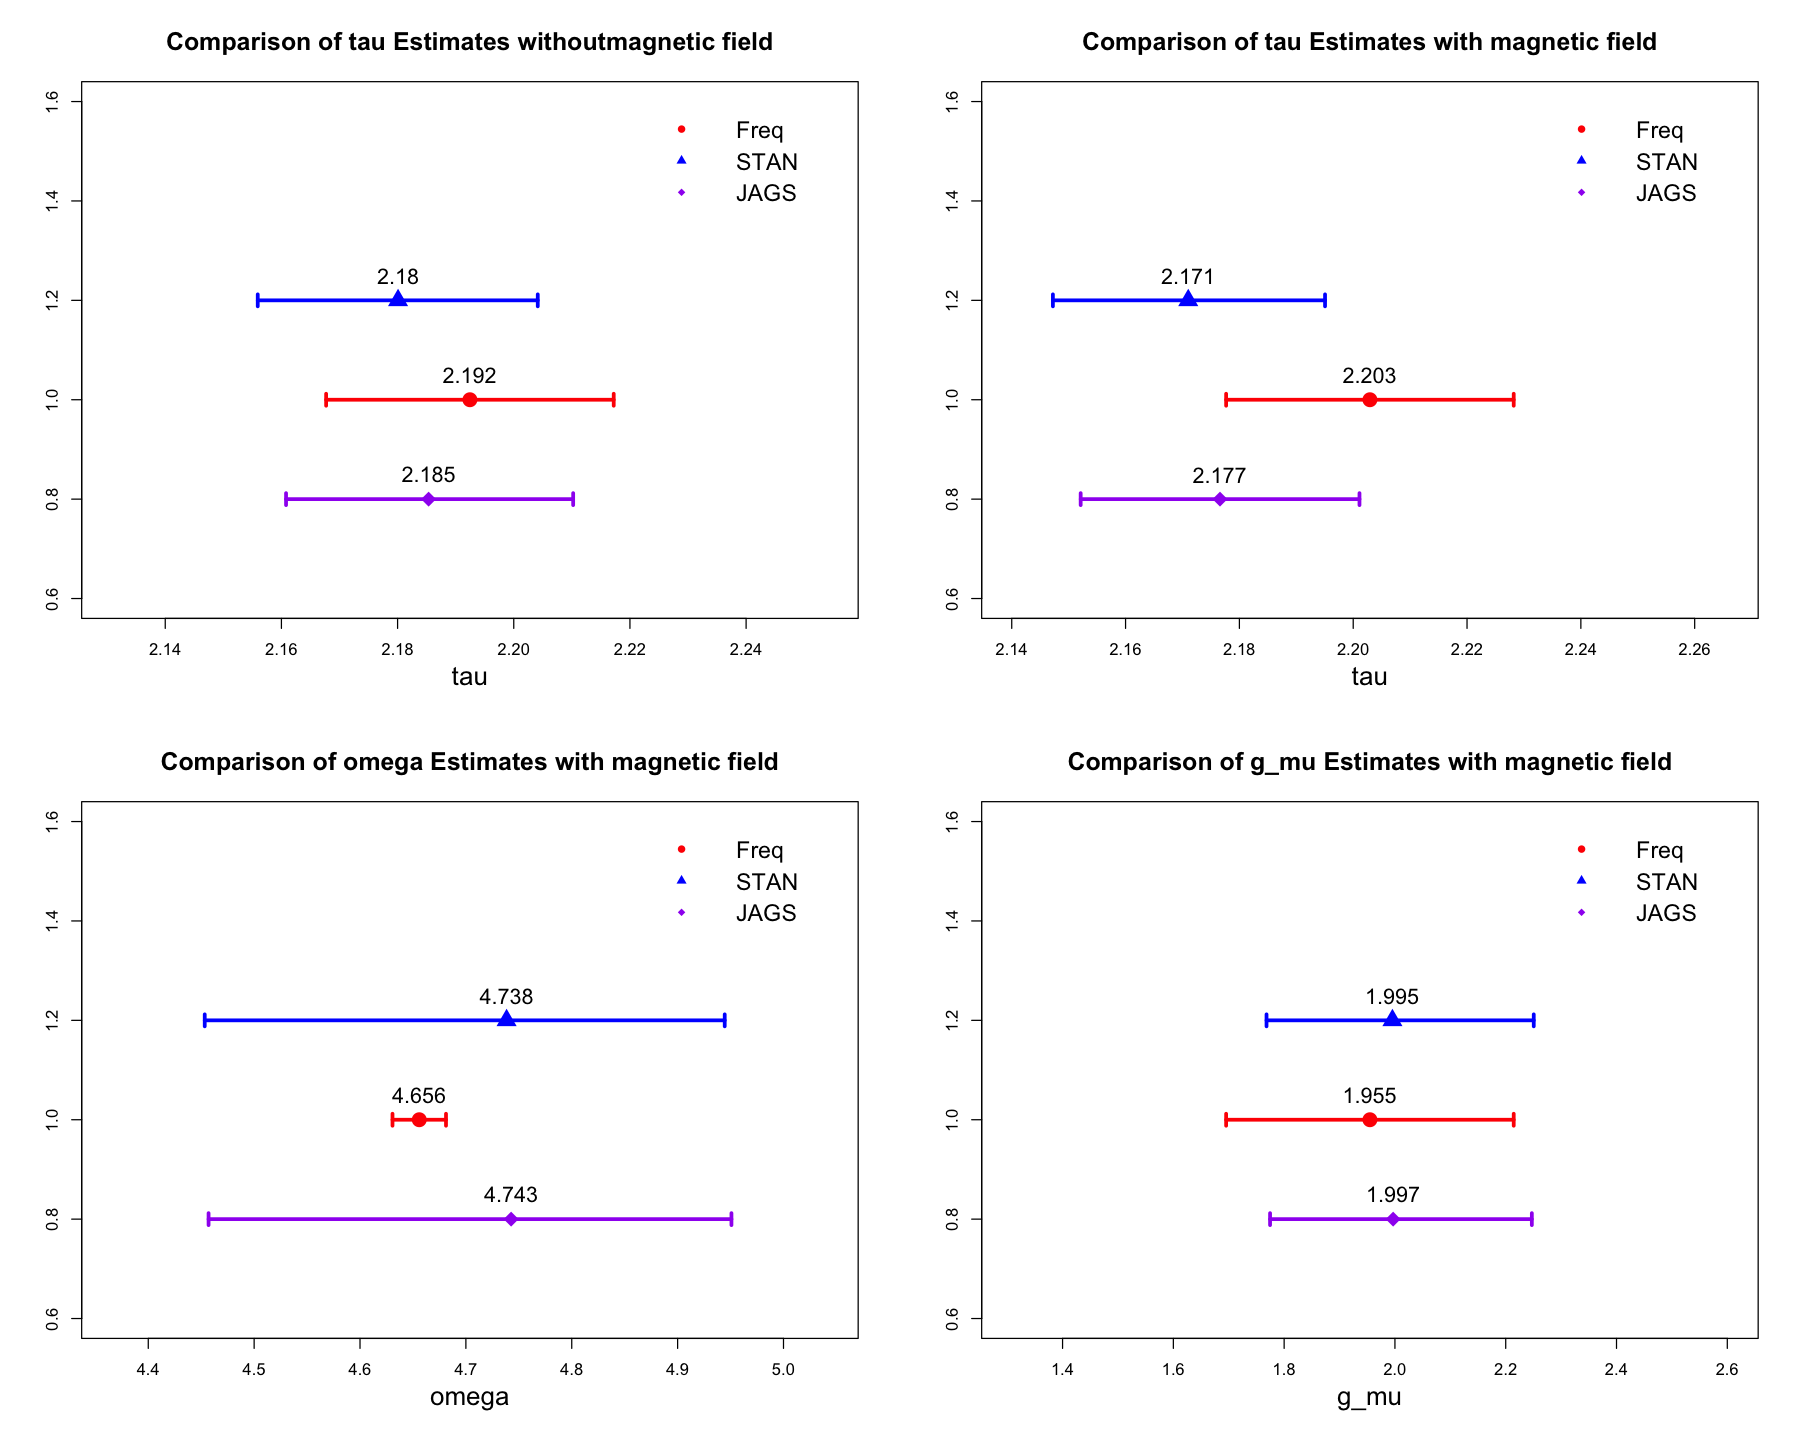

In [132]:
par(mfrow = c(2, 2))
options(repr.plot.width = 15, repr.plot.height = 12)


PlotComp(NO_B_FreqTau, NO_B_StanTau, NO_B_JagsTau, "Comparison of tau Estimates withoutmagnetic field", 'tau')
PlotComp(B_FreqTau, B_StanTau, B_JagsTau, "Comparison of tau Estimates with magnetic field", 'tau')
PlotComp(B_Freqomega, B_Stanomega, B_Jagsomega,  "Comparison of omega Estimates with magnetic field", 'omega', Omega=T)
PlotComp(B_Freqgmu, B_Stangmu, B_Jagsgmu,  "Comparison of g_mu Estimates with magnetic field", 'g_mu')

# COSA DA FARE

$** YOLO **$ poi il resto

FRANCESCO:

Mostrare una volta i risultati delle varie catene (uno solo esemplificativo)

MOSTRI GRAFICO VARIE POSTERIORI DI UN PARAMETRO PER STAN: Rifare tutto con prior dei parametri diverse (uniformi, jeffrey(beta(0.5,0.5)) in un range oppure normali informate)

MARCO:

plot con anche la linea di regressione con i parametri ottenuti nel plot dei dati

ALTRO:

Confronto, quindi histogrammi su stesso plot di colore di verso delle posterior di tau e omega-oppure gu- (con prior la stessa) di STAN, JAGS, FREQUENTISTA 